In [8]:
# General
import os
import glob

# Display
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm

# Data treatment
import xarray as xr
import numpy as np
# from scipy.interpolate import griddata
import pandas as pd 
from tqdm import tqdm
import ephem

# Default parameters
fontsize = 16
mpl.rcParams.update({'font.size': fontsize})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

Due to High power transmitter (HPT) characteristics, CPR observations are interrupted a few times a month.

EarthCARE Quick Look: https://www.eorc.jaxa.jp/EARTHCARE/index.html

EarthCARE Data products: https://earth.esa.int/eogateway/missions/earthcare/data

EarthCARE Orbit view: https://www.eorc.jaxa.jp/EARTHCARE/auth/orbit/rs/EC_orbit_view.html

EarthCARE Orbit search: https://www.eorc.jaxa.jp/EARTHCARE/auth/orbit/rs/EC_orbit_search.html

cloud_air_velocity_1km: 1 km refers to horizontal resolution (from what I understand). The vertical resolution is supposed to be 0.5 km. The horizontal grid spacing is 1 km and the vertical grid spacing is 0.1 km. 

### Shanshan 2024

25 August: very close to TC center (but SAR is cropped)
/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_08_25/ECA_JXAA_ACM_CLP_2B_20240825T050934Z_20240825T111411Z_01373D/ECA_JXAA_ACM_CLP_2B_20240825T050934Z_20240825T111411Z_01373D.h5

26 August: Nothing

27 August: Quite far from TC center (see ESA news)
/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_08_27/ECA_JXAA_ACM_CLP_2B_20240827T165608Z_20240828T001056Z_01412B/ECA_JXAA_ACM_CLP_2B_20240827T165608Z_20240828T001056Z_01412B.h5

28 August: Nothing

Check the other dates

### Ernesto 2024

14: Too far from TC center: 
/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_08_14/ECA_JXAA_ACM_CLP_2B_20240814T061809Z_20240814T122152Z_01203A/ECA_JXAA_ACM_CLP_2B_20240814T061809Z_20240814T122152Z_01203A.h5

15: Too far from TC center:
/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_08_15/ECA_JXAA_ACM_CLP_2B_20240815T182207Z_20240815T232748Z_01226D/ECA_JXAA_ACM_CLP_2B_20240815T182207Z_20240815T232748Z_01226D.h5

16: A bit far from TC center:
/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_08_16/ECA_JXAA_ACM_CLP_2B_20240816T061955Z_20240817T093717Z_01234B/ECA_JXAA_ACM_CLP_2B_20240816T061955Z_20240817T093717Z_01234B.h5

17: Quite close to TC center:
/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_08_15/ECA_JXAA_ACM_CLP_2B_20240815T182207Z_20240815T232748Z_01226D/ECA_JXAA_ACM_CLP_2B_20240815T182207Z_20240815T232748Z_01226D.h5

18: Nothing

### Leslie 2024:

5 October: Nothing

6 October: Nothing

7 October: Quite close to TC center
/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_10_07/ECA_JXAA_ACM_CLP_2B_20241007T042746Z_20241010T052102Z_02042A/ECA_JXAA_ACM_CLP_2B_20241007T042746Z_20241010T052102Z_02042A.h5

8 October: Nothing

9 October: Nothing

10 October: Perfectly in the TC center (even though not very axisymmetric according to SAR)
/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_10_10/ECA_JXAA_ACM_CLP_2B_20241010T050822Z_20241010T124805Z_02089B/ECA_JXAA_ACM_CLP_2B_20241010T050822Z_20241010T124805Z_02089B.h5

In [190]:
# Open SAR
dsg_sar = xr.open_dataset('/home/arthur/results/sar_extended/05_addPRIMED/dsg.nc')

In [9]:
# # Level-1 products
# p   = '/home/arthur/Téléchargements/ECA_JXBA_CPR_NOM_1B_20241110T025059Z_20241111T033223Z_02570A/ECA_JXBA_CPR_NOM_1B_20241110T025059Z_20241111T033223Z_02570A.h5'
# ds  = xr.open_dataset(p, group='/ScienceData/Data')

In [10]:
# plt.pcolormesh(ds.dopplerVelocity)
# plt.colorbar()

### Leslie 2024

#### Cloud air motion

In [174]:
p   = '/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_10_10/ECA_JXAA_ACM_CLP_2B_20241010T050822Z_20241010T124805Z_02089B/ECA_JXAA_ACM_CLP_2B_20241010T050822Z_20241010T124805Z_02089B.h5'
ds  = xr.open_dataset(p, group='/ScienceData/Data')
dsg = xr.open_dataset(p, group='/ScienceData/Geo')

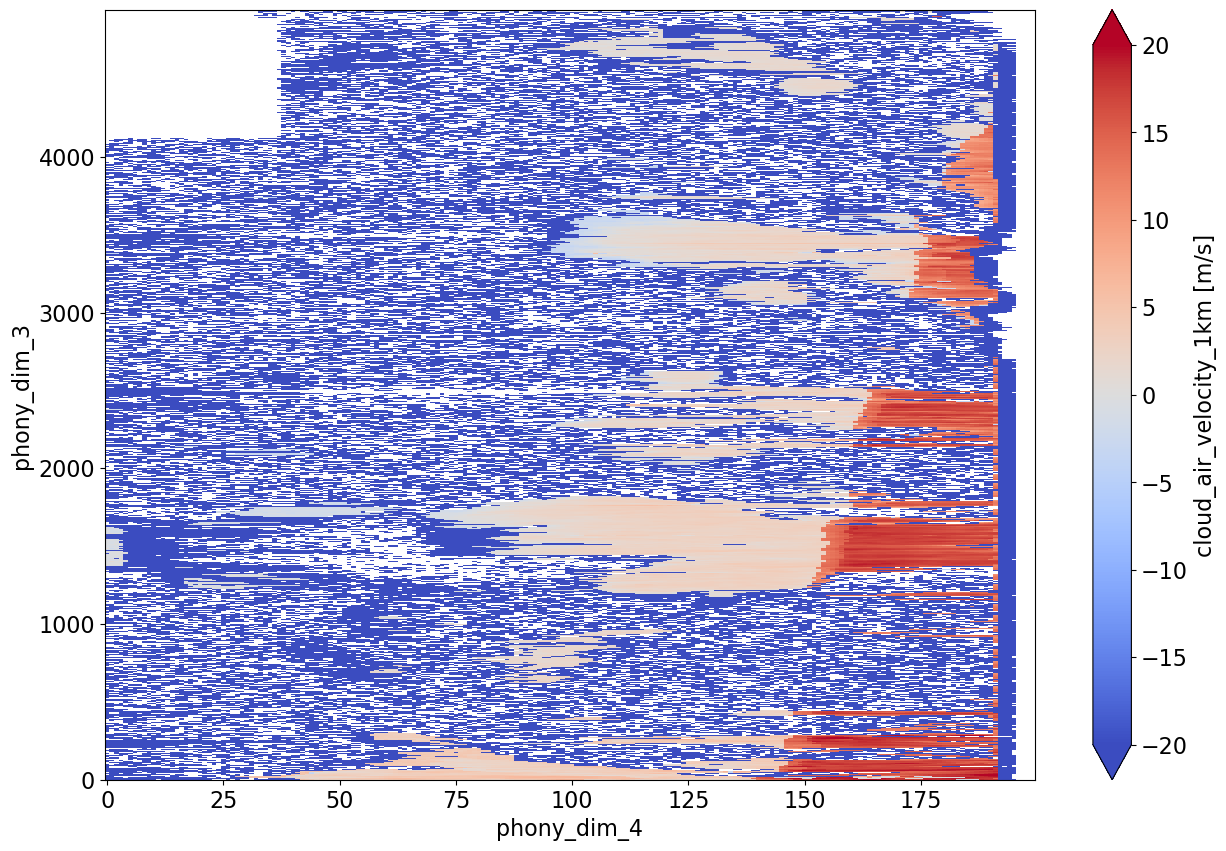

In [126]:
ds.cloud_air_velocity_1km.plot(vmin=-20, vmax=20, cmap='coolwarm')

In [139]:
w       = ds.cloud_air_velocity_1km.isel(phony_dim_4=185)
w_valid = w.where(w > -21)

2024-10-10T05:14:15.582780740


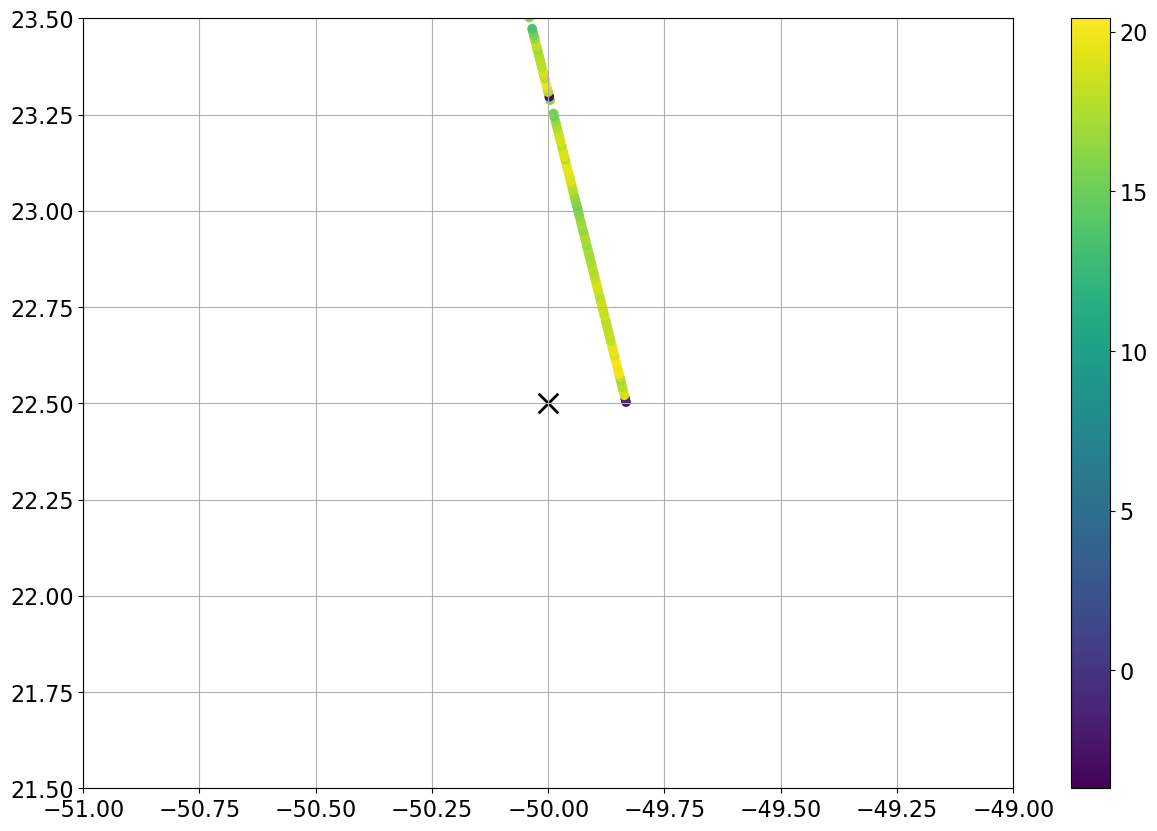

In [194]:
print(dsg.time.mean().data)
plt.scatter(-50, 22.5, c='k', marker='x', s=200, linewidth=2)
plt.scatter(dsg.longitude, dsg.latitude, c=w_valid)
plt.colorbar()
plt.xlim(-51, -49)
plt.ylim(21.5, 23.5)
plt.grid()

In [189]:
print('R+ = {:.0f} km'.format(dsg_sar.where(dsg_sar.name == 'LESLIE', drop=True).isel(time=-1).rmx / 1000))
print('R+ = {:.0f} km'.format(dsg_sar.where(dsg_sar.name == 'LESLIE', drop=True).isel(time=-1).rps / 1000))

R+ = 20 km
R+ = 52 km


#### Rain rate

In [199]:
p = '/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T050822Z_20241010T104924Z_02089B/ECA_EXAA_ACM_CAP_2B_20241010T050822Z_20241010T104924Z_02089B.h5'
ds  = xr.open_dataset(p, group='/ScienceData')

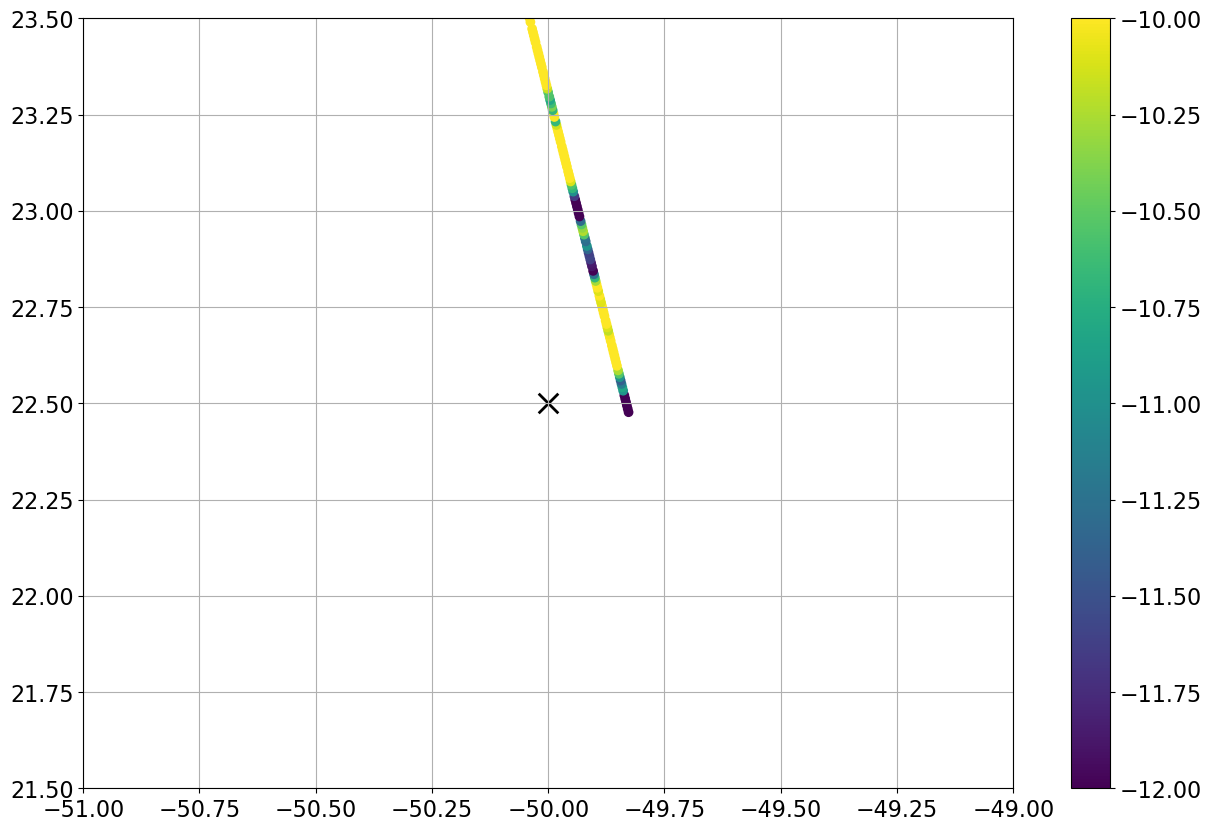

In [247]:
plt.scatter(-50, 22.5, c='k', marker='x', s=200, linewidth=2)
plt.scatter(ds.longitude, ds.latitude, c=np.log(ds.isel(JSG_height=227).rain_rate), vmin=-12, vmax=-10)
plt.colorbar()
plt.xlim(-51, -49)
plt.ylim(21.5, 23.5)
plt.grid()

In [238]:
np.log(ds.isel(JSG_height=227).rain_rate).max(skipna=True)

/home/arthur/anaconda3/envs/dataBasics/lib/python3.13/site-packages/xarray/core/computation.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


<xarray.DataArray 'rain_rate' ()> Size: 8B
array(-5.67694569)

### Check if a case has EarthCARE data

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T000720Z_20241010T013918Z_02085H/ECA_EXAA_ACM_CAP_2B_20241010T000720Z_20241010T013918Z_02085H.h5


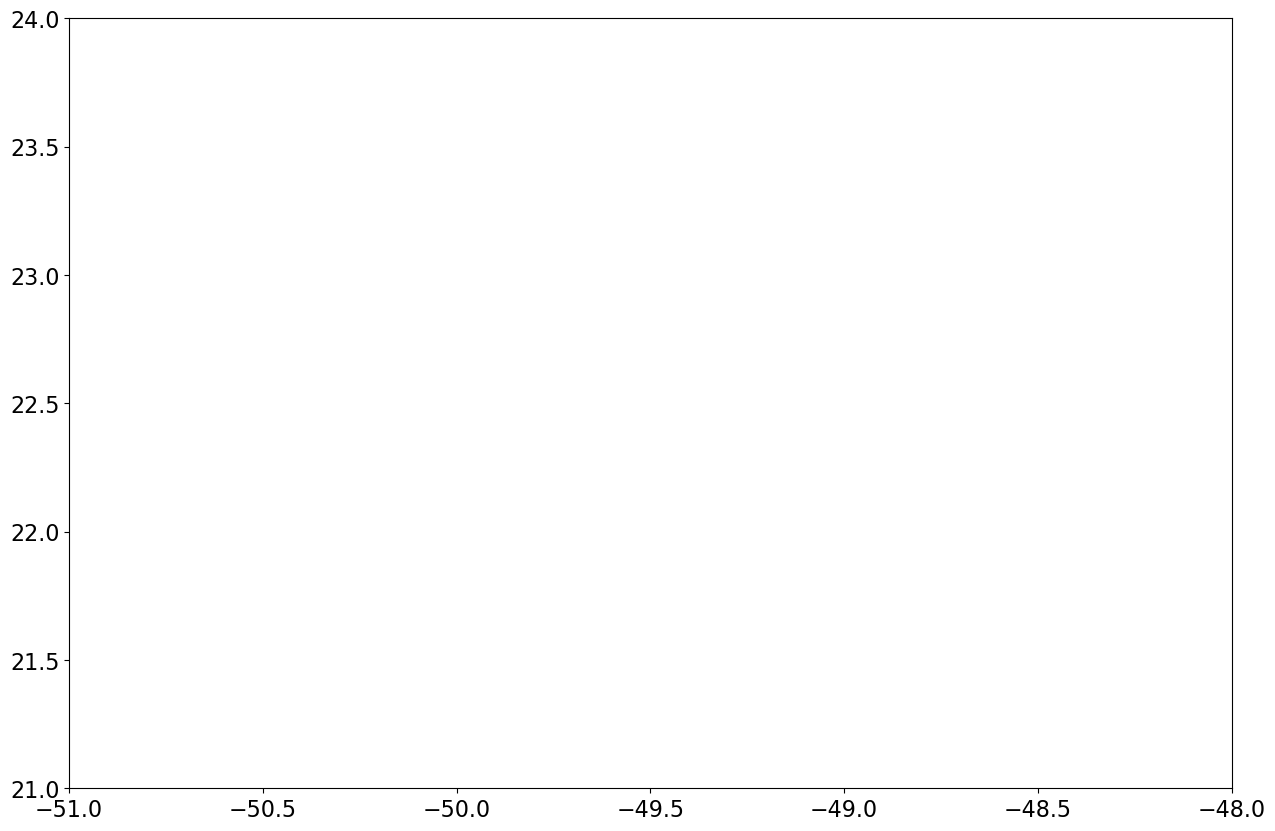

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T003044Z_20241010T013919Z_02086B/ECA_EXAA_ACM_CAP_2B_20241010T003044Z_20241010T013919Z_02086B.h5


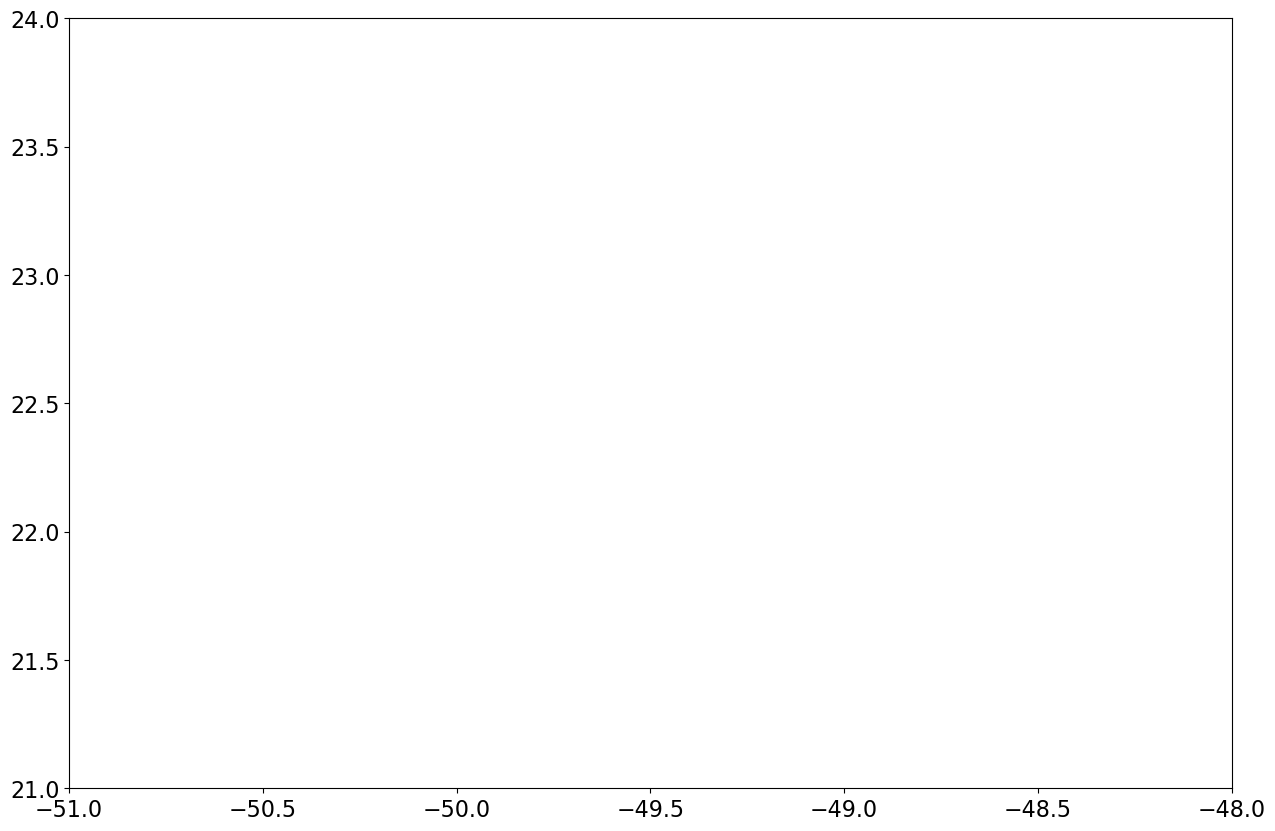

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T004230Z_20241010T024725Z_02086C/ECA_EXAA_ACM_CAP_2B_20241010T004230Z_20241010T024725Z_02086C.h5


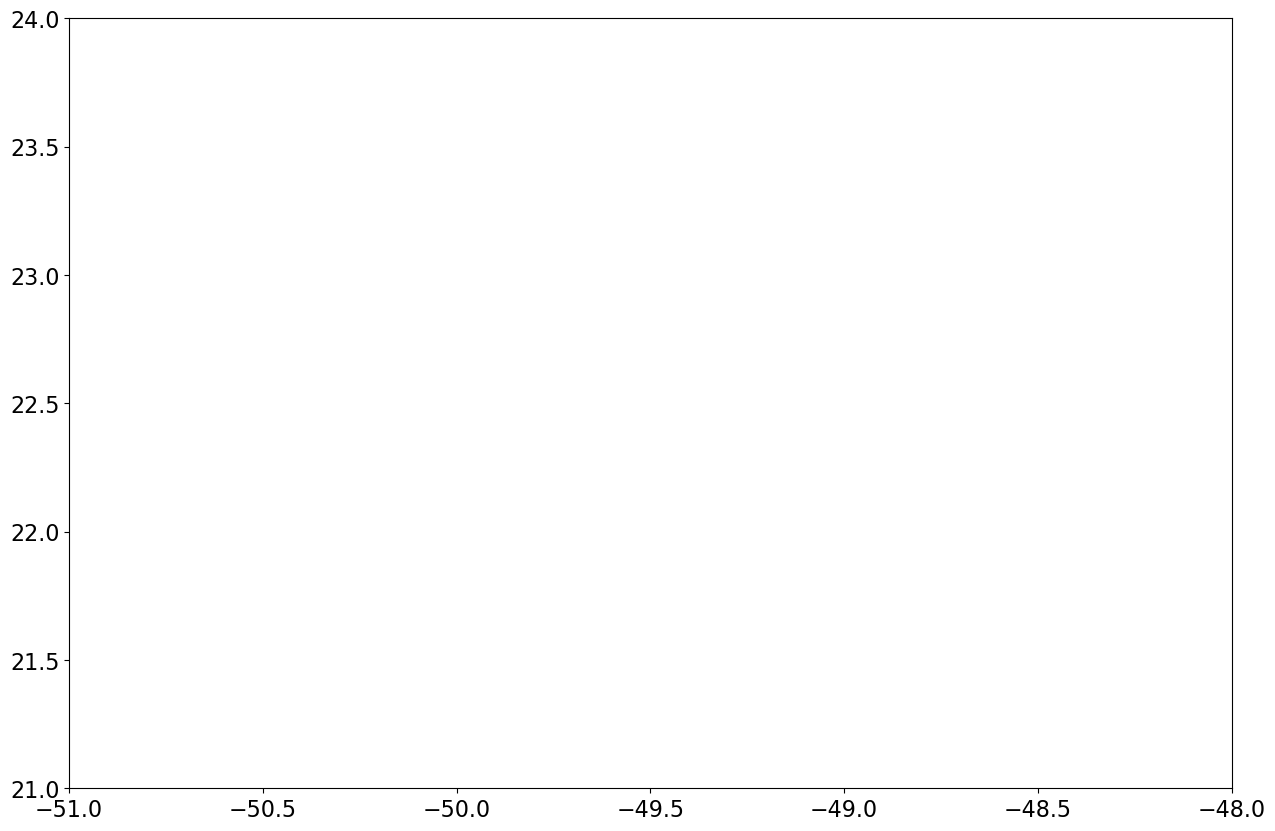

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T005334Z_20241010T025725Z_02086D/ECA_EXAA_ACM_CAP_2B_20241010T005334Z_20241010T025725Z_02086D.h5


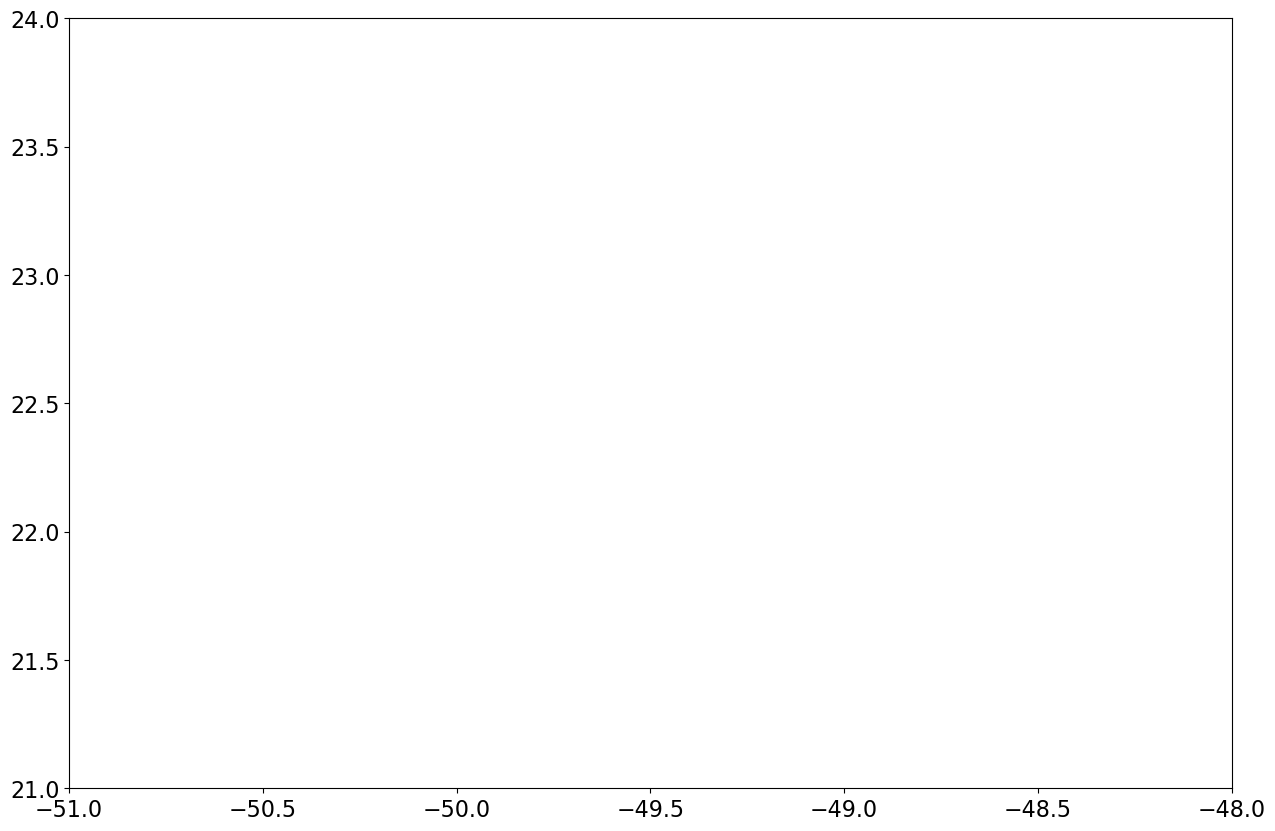

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T010521Z_20241010T025625Z_02086E/ECA_EXAA_ACM_CAP_2B_20241010T010521Z_20241010T025625Z_02086E.h5


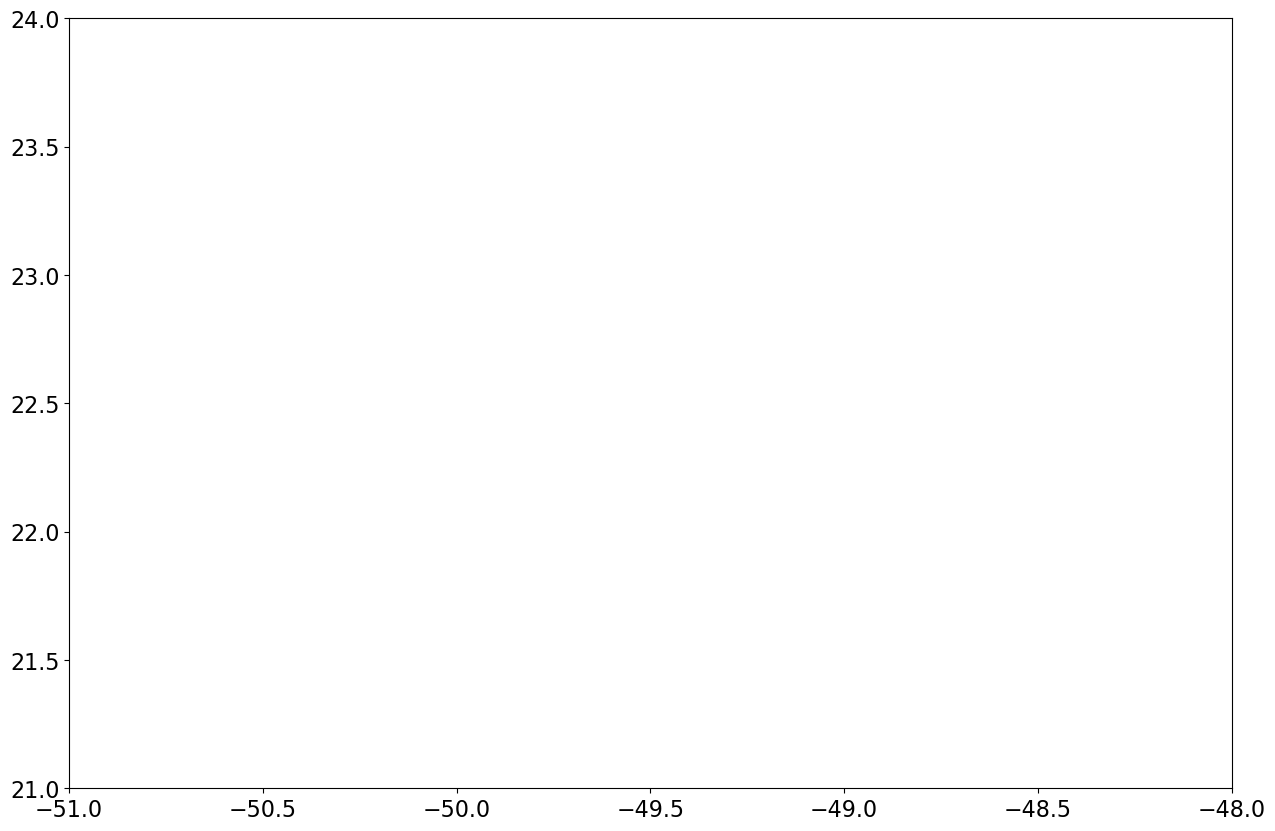

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T011656Z_20241010T025926Z_02086F/ECA_EXAA_ACM_CAP_2B_20241010T011656Z_20241010T025926Z_02086F.h5


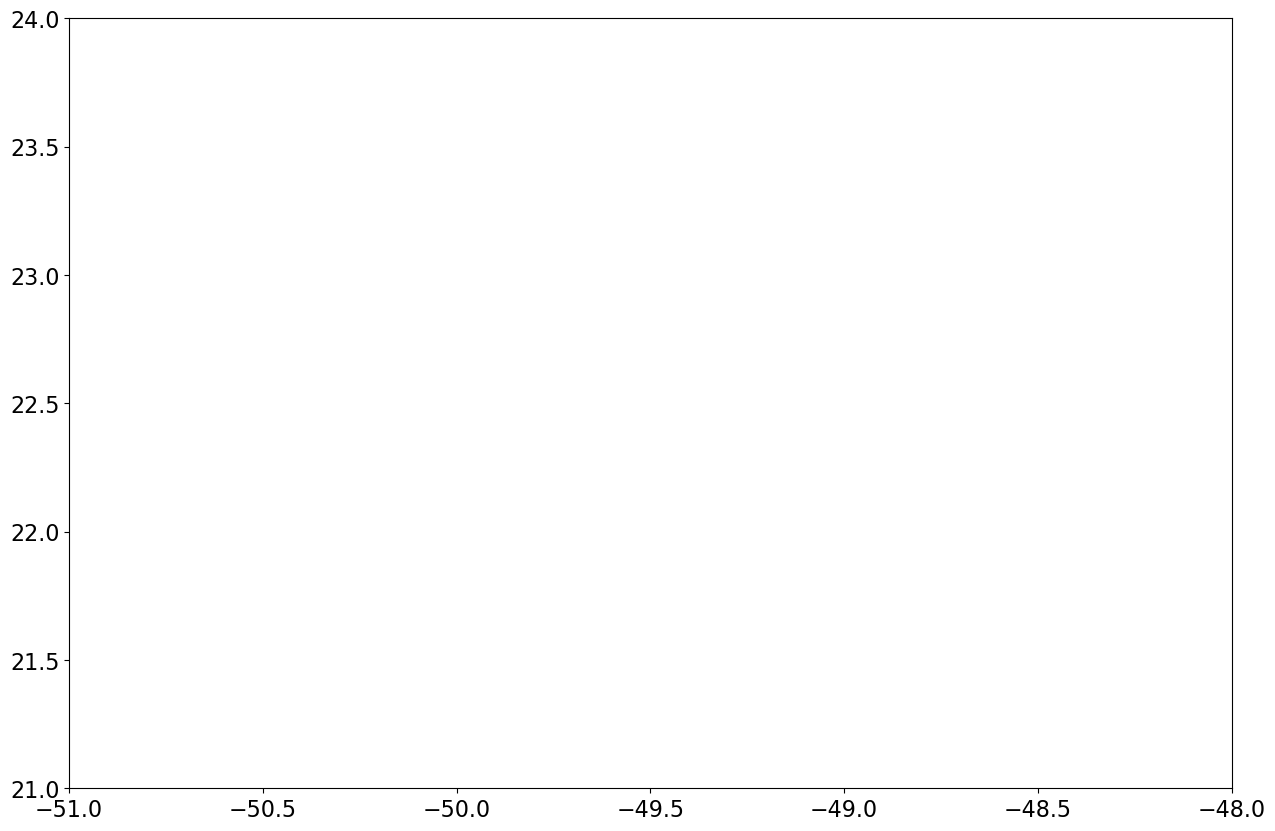

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T012845Z_20241010T025526Z_02086G/ECA_EXAA_ACM_CAP_2B_20241010T012845Z_20241010T025526Z_02086G.h5


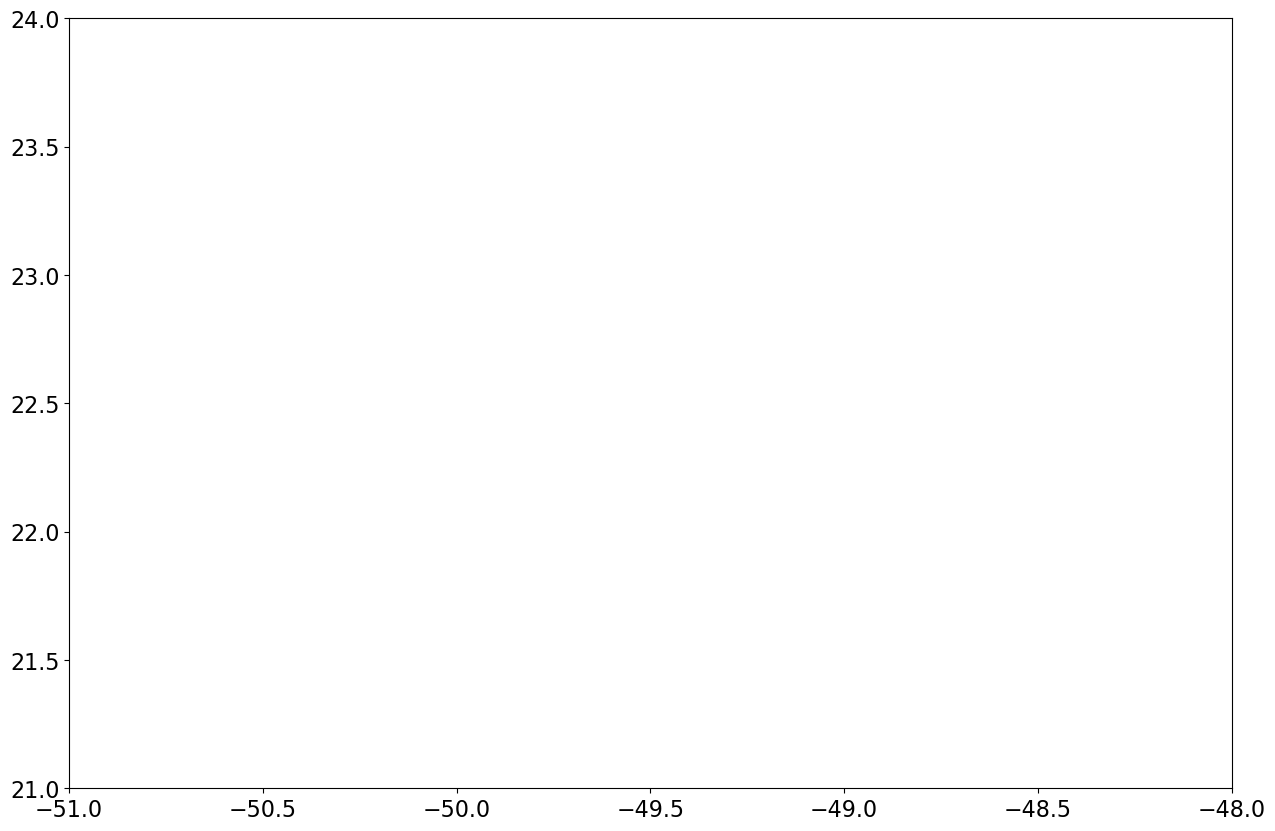

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T013952Z_20241010T025825Z_02086H/ECA_EXAA_ACM_CAP_2B_20241010T013952Z_20241010T025825Z_02086H.h5


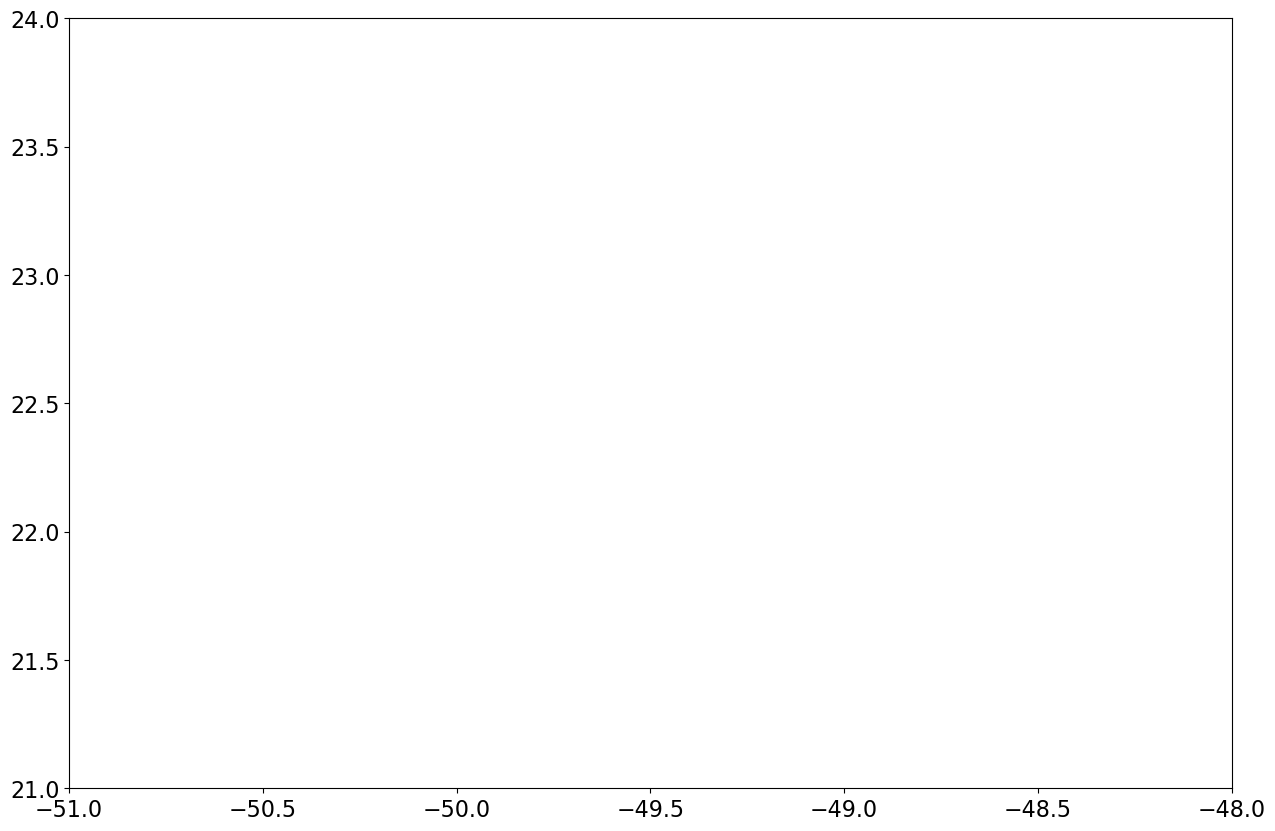

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T015141Z_20241010T025725Z_02087A/ECA_EXAA_ACM_CAP_2B_20241010T015141Z_20241010T025725Z_02087A.h5


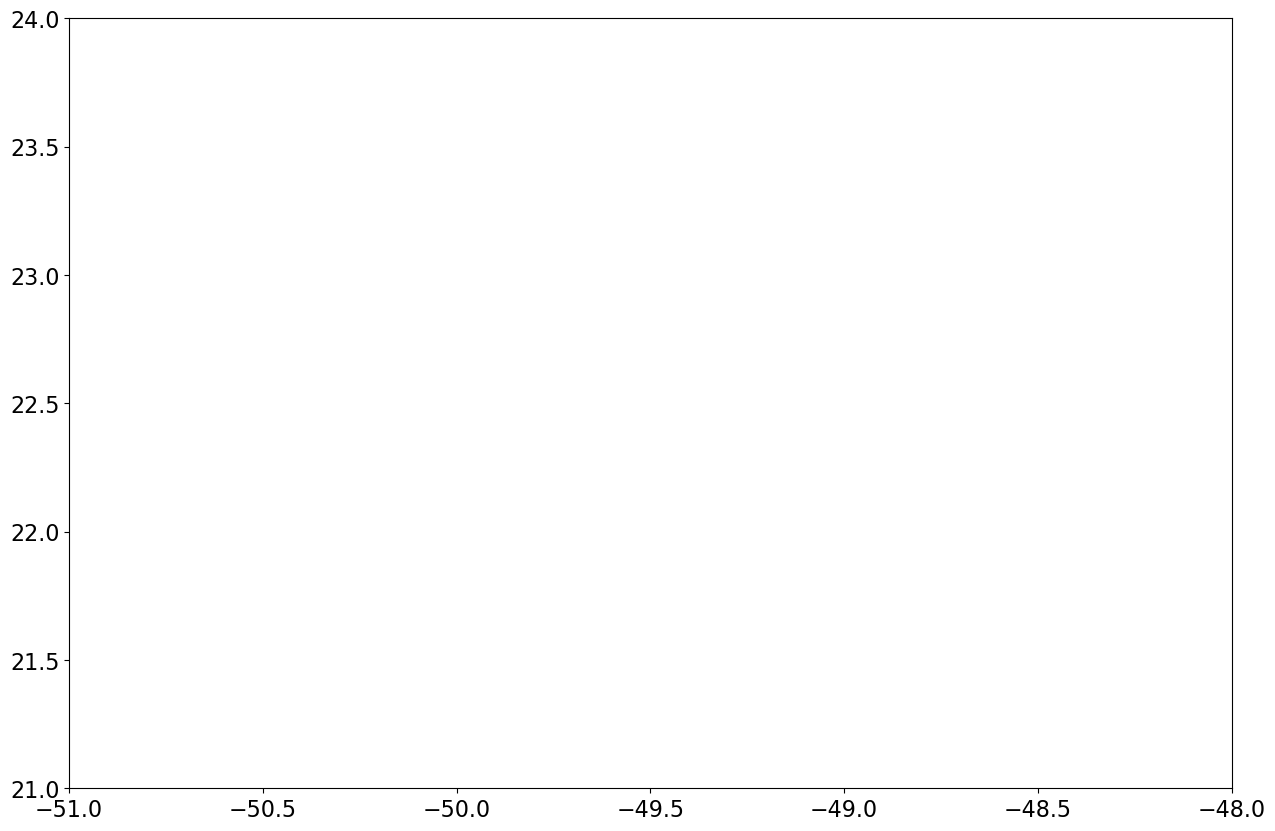

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T020317Z_20241010T025625Z_02087B/ECA_EXAA_ACM_CAP_2B_20241010T020317Z_20241010T025625Z_02087B.h5


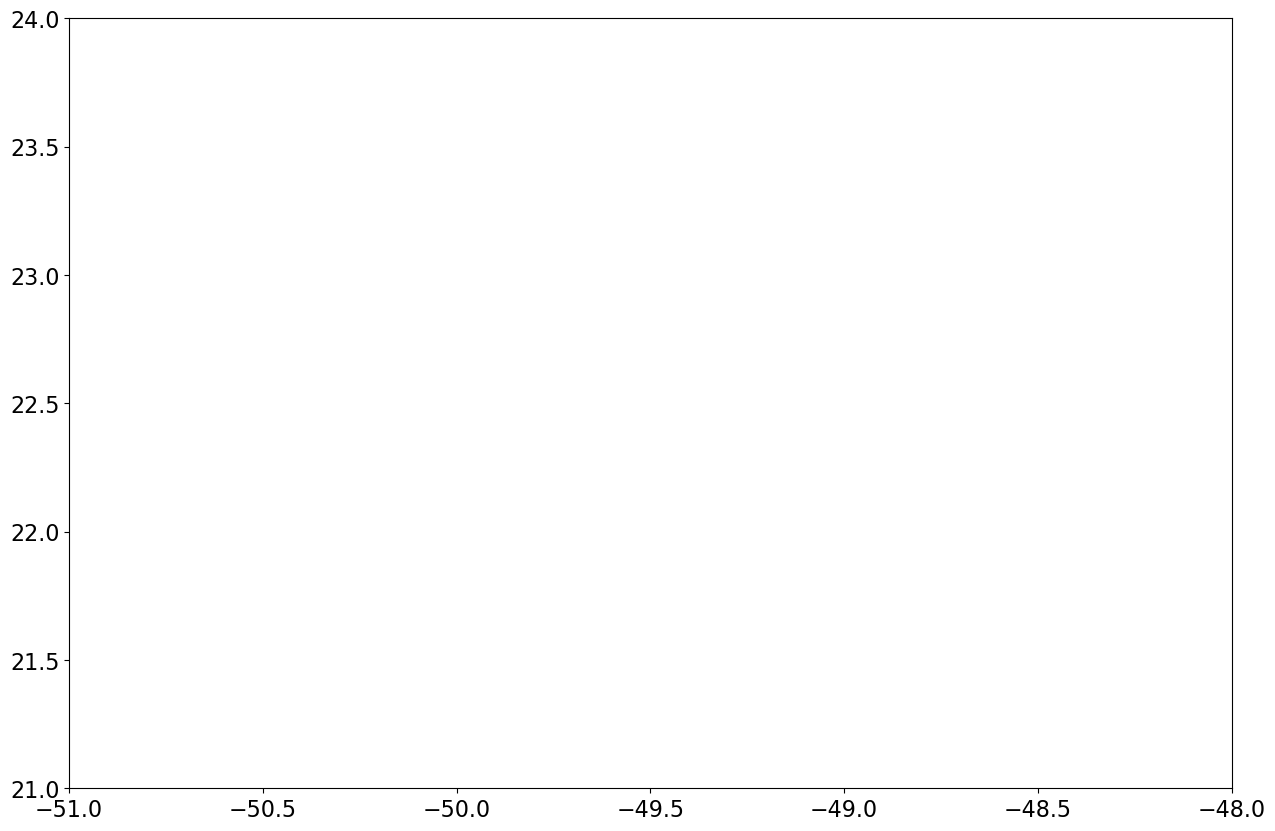

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T021503Z_20241010T105133Z_02087C/ECA_EXAA_ACM_CAP_2B_20241010T021503Z_20241010T105133Z_02087C.h5


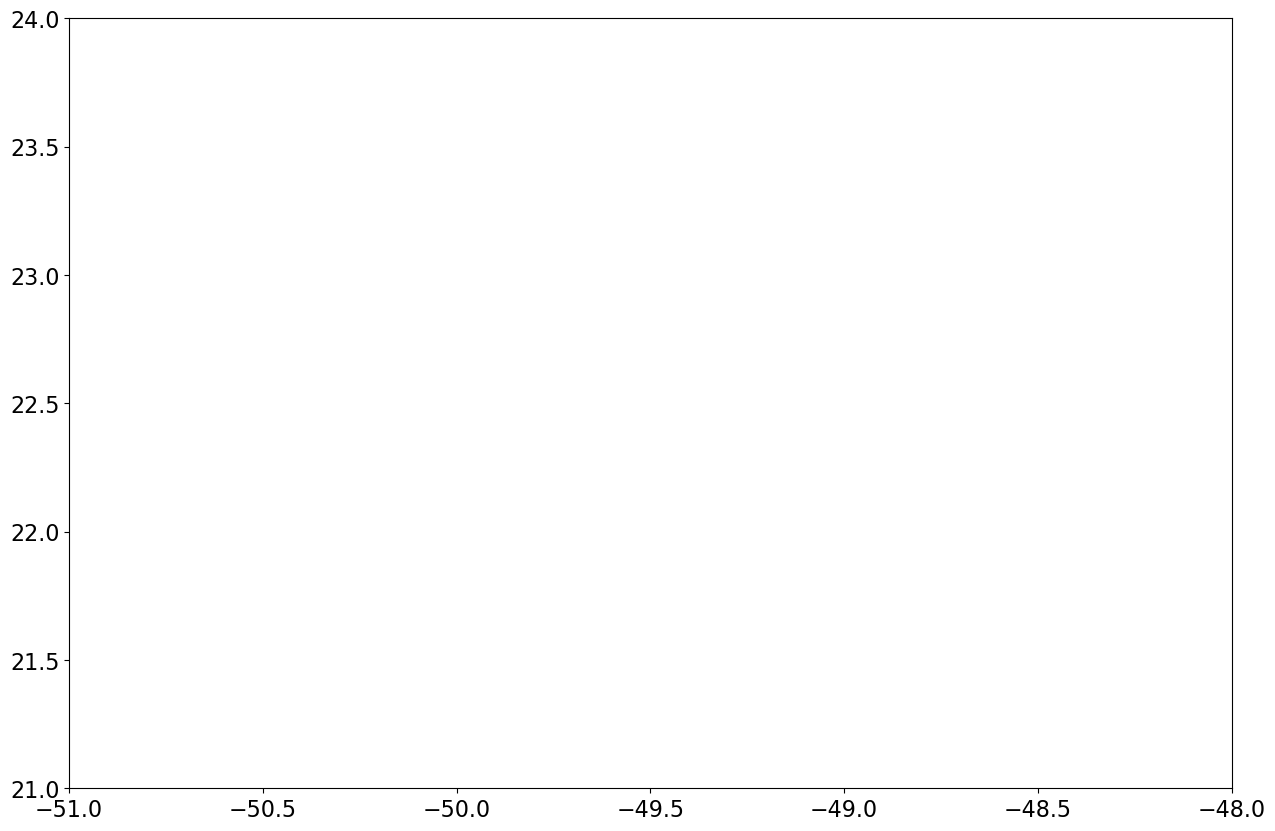

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T022607Z_20241010T105947Z_02087D/ECA_EXAA_ACM_CAP_2B_20241010T022607Z_20241010T105947Z_02087D.h5


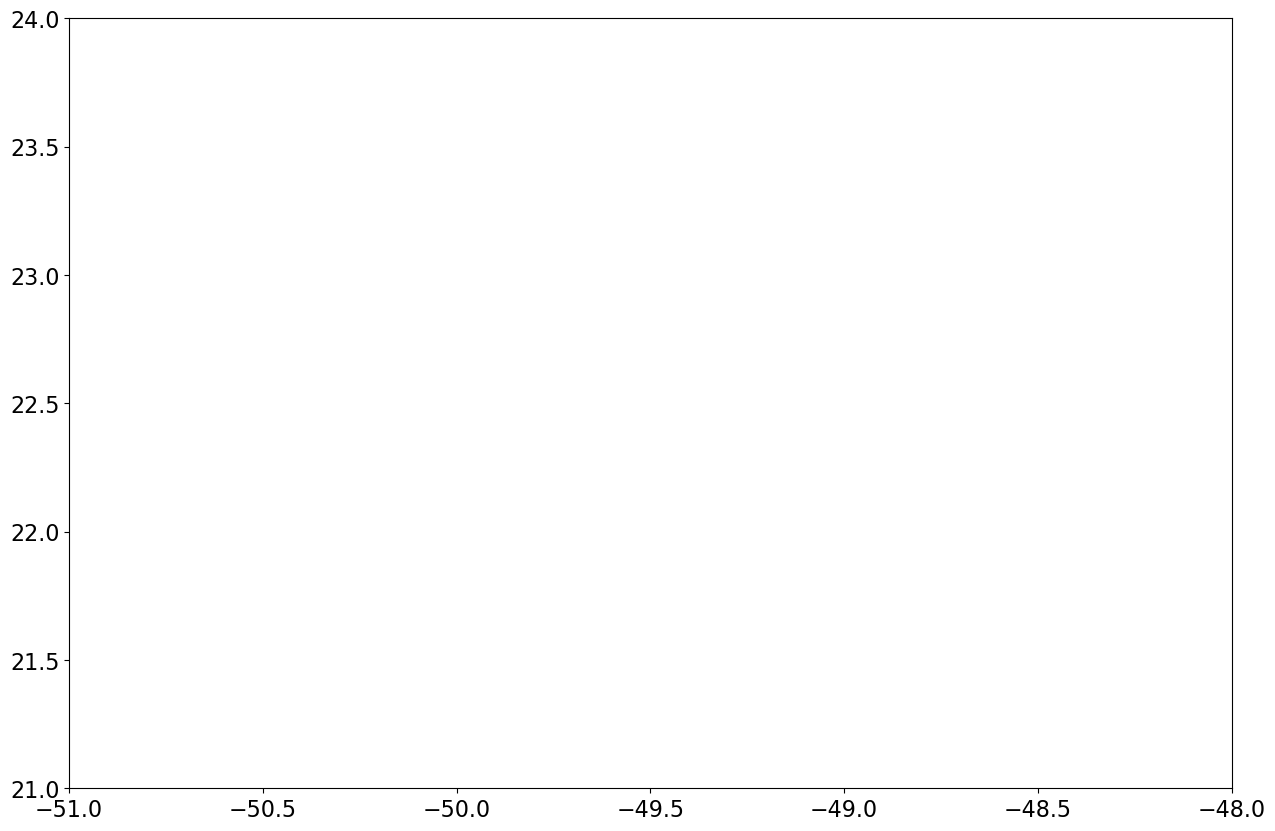

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T023753Z_20241010T110149Z_02087E/ECA_EXAA_ACM_CAP_2B_20241010T023753Z_20241010T110149Z_02087E.h5


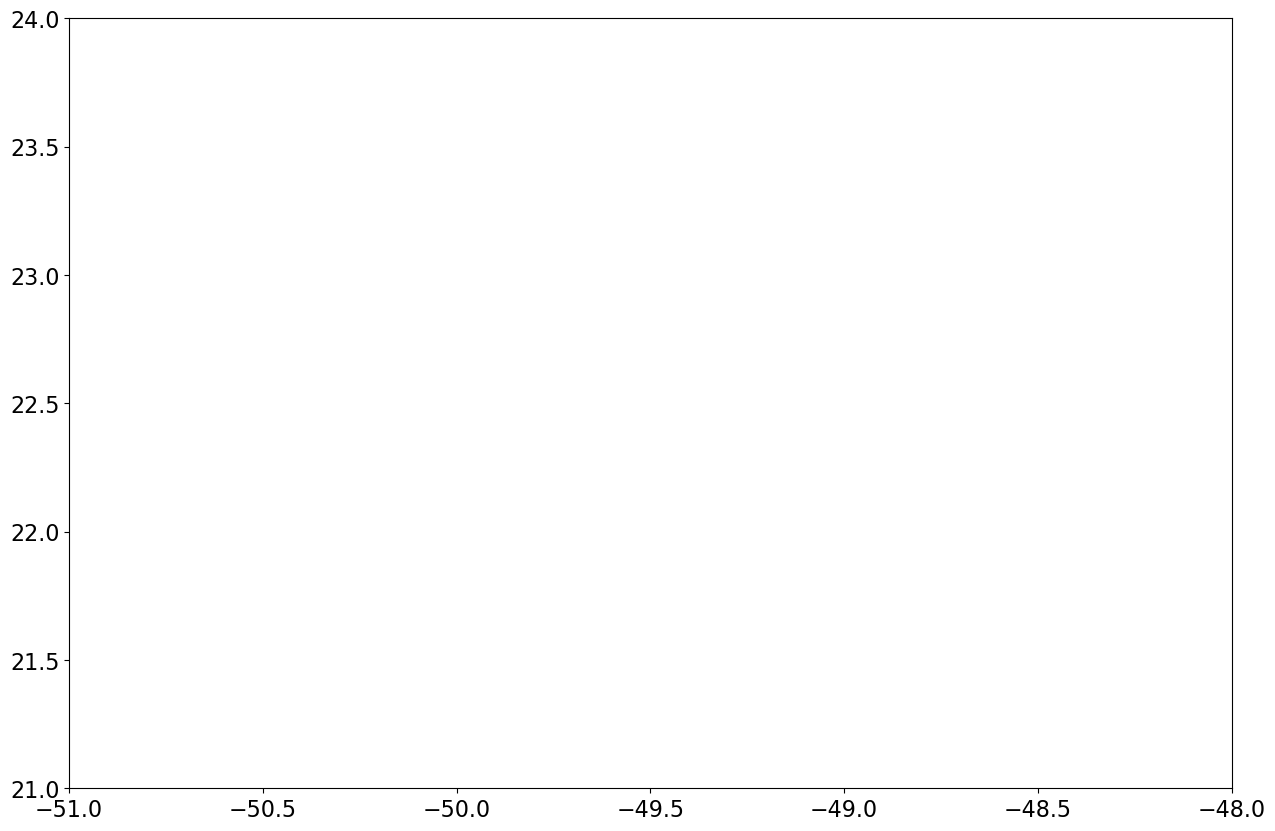

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T024929Z_20241010T110137Z_02087F/ECA_EXAA_ACM_CAP_2B_20241010T024929Z_20241010T110137Z_02087F.h5


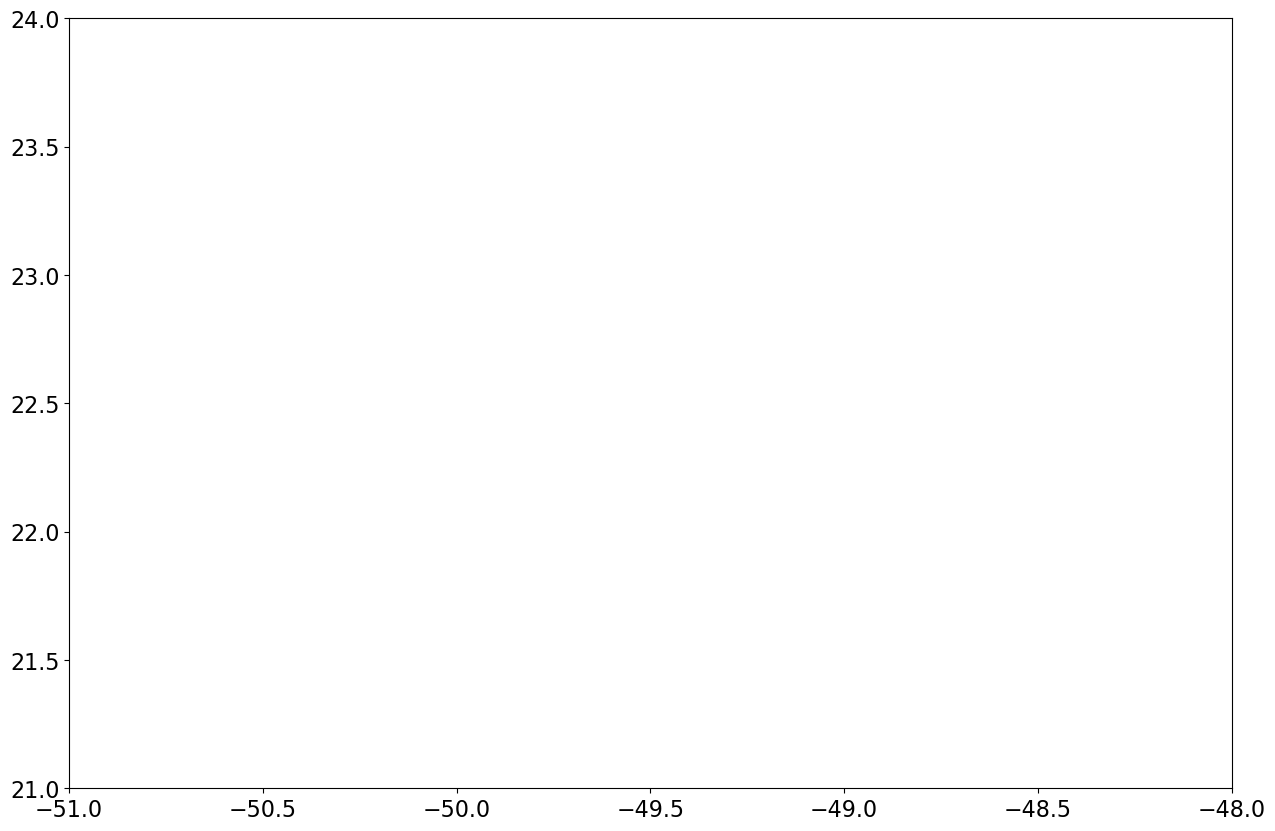

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T030118Z_20241010T105651Z_02087G/ECA_EXAA_ACM_CAP_2B_20241010T030118Z_20241010T105651Z_02087G.h5


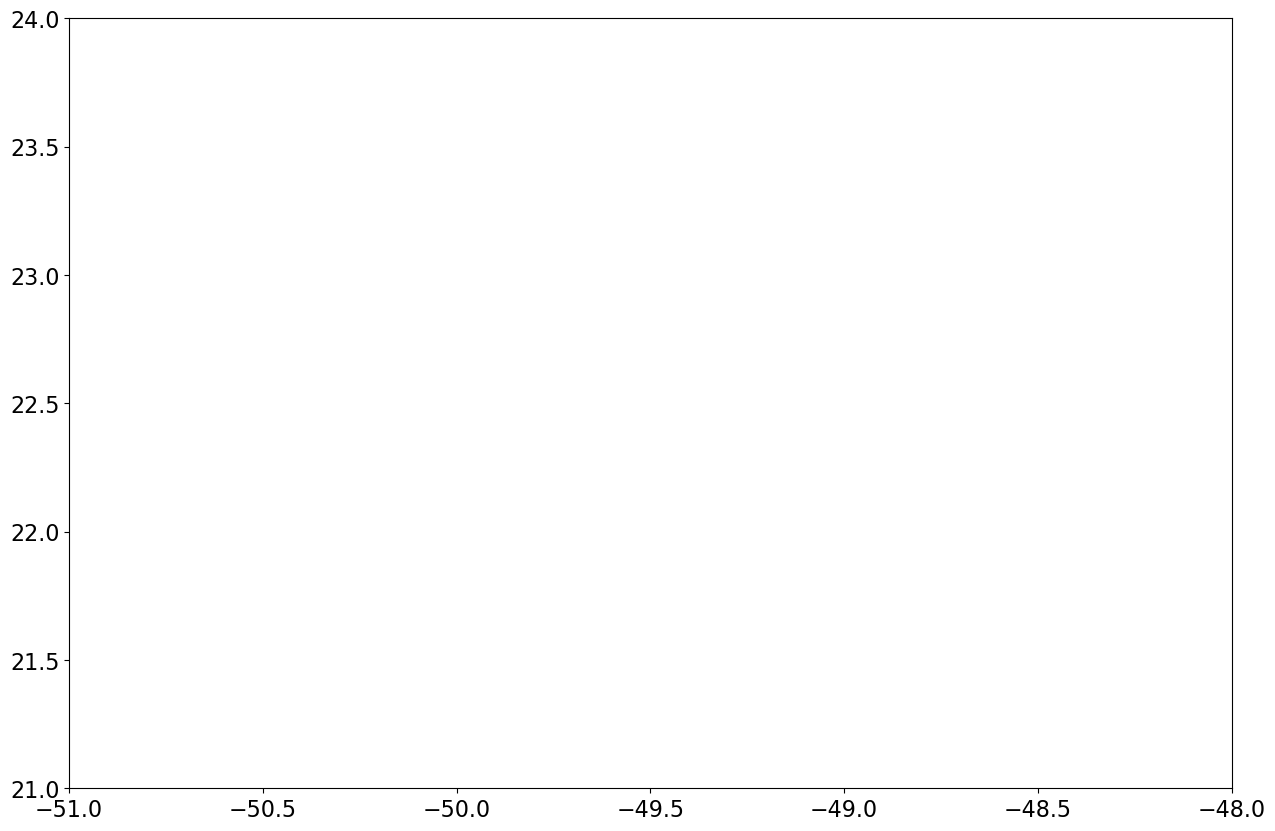

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T031225Z_20241010T105337Z_02087H/ECA_EXAA_ACM_CAP_2B_20241010T031225Z_20241010T105337Z_02087H.h5


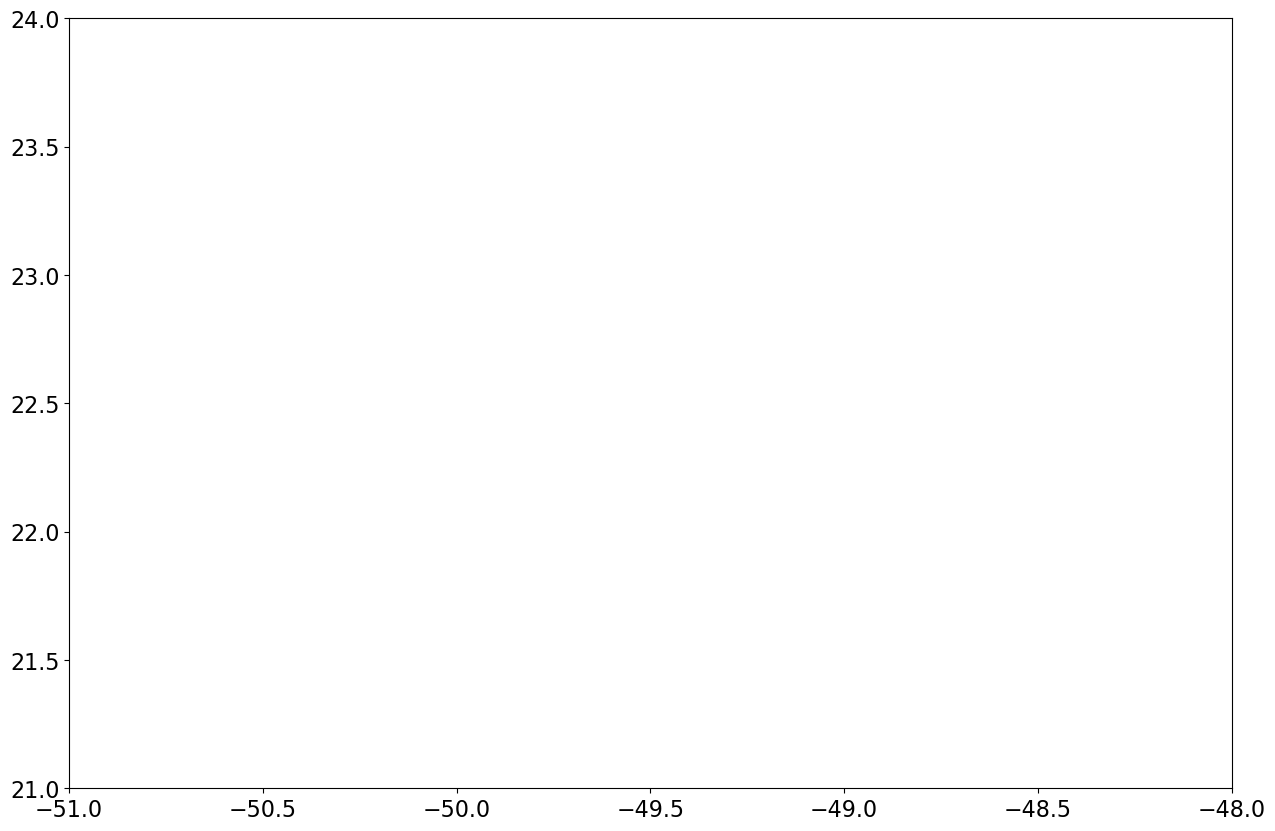

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T032414Z_20241010T104925Z_02088A/ECA_EXAA_ACM_CAP_2B_20241010T032414Z_20241010T104925Z_02088A.h5


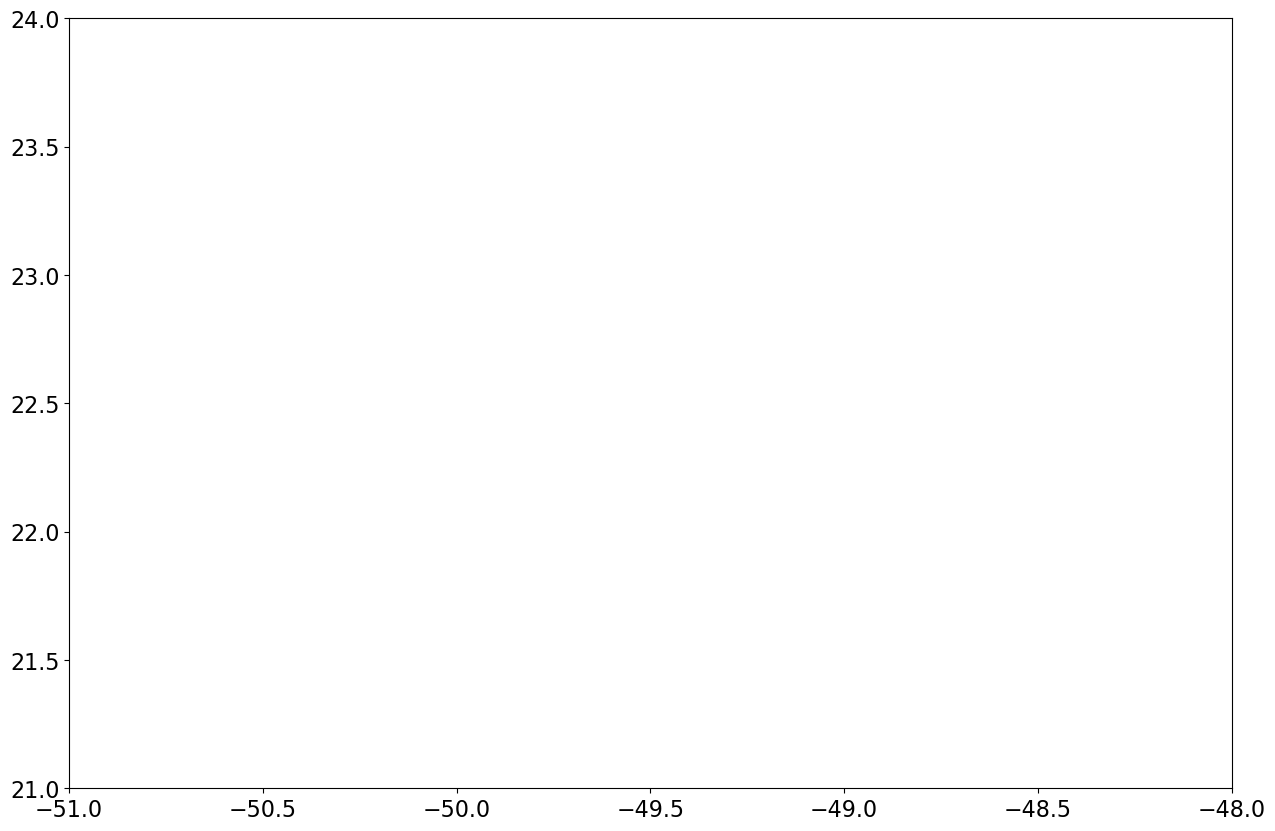

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T033550Z_20241010T105819Z_02088B/ECA_EXAA_ACM_CAP_2B_20241010T033550Z_20241010T105819Z_02088B.h5


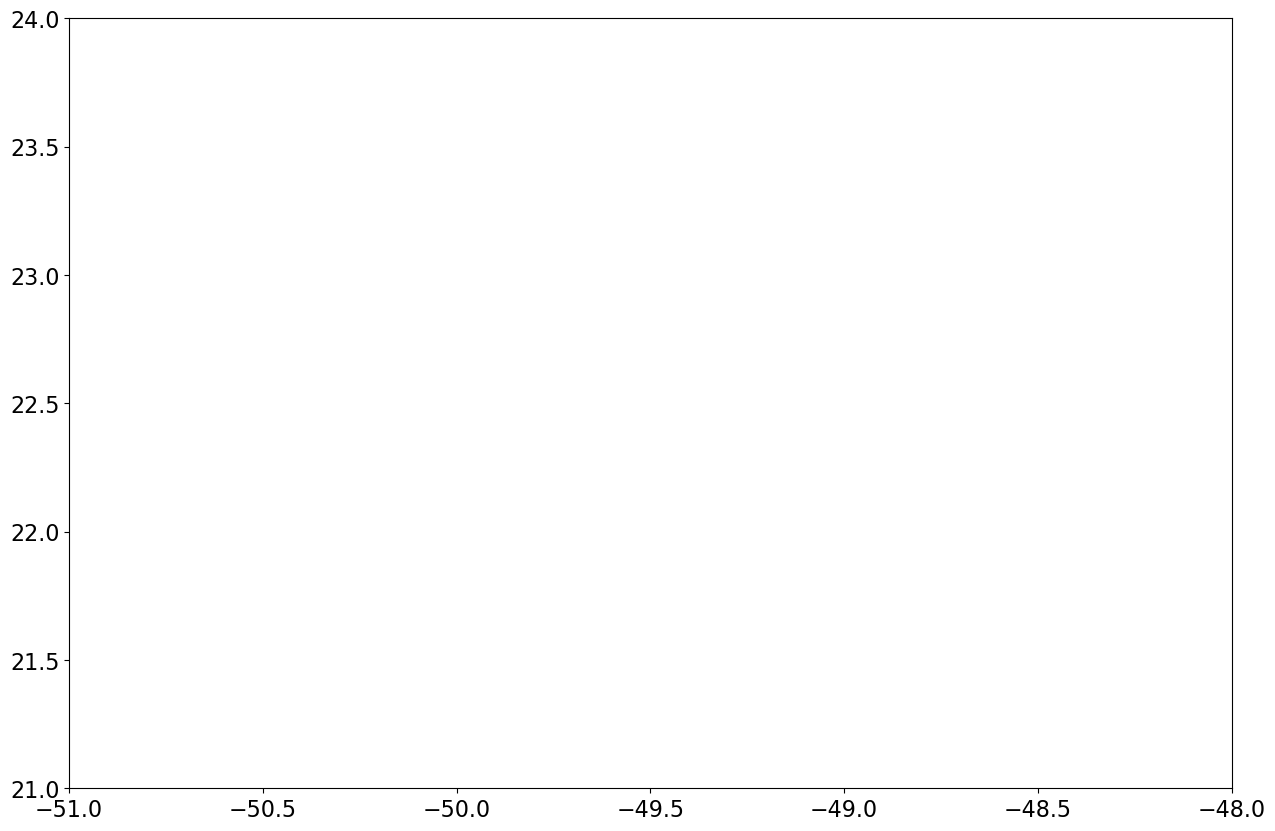

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T034736Z_20241010T104859Z_02088C/ECA_EXAA_ACM_CAP_2B_20241010T034736Z_20241010T104859Z_02088C.h5


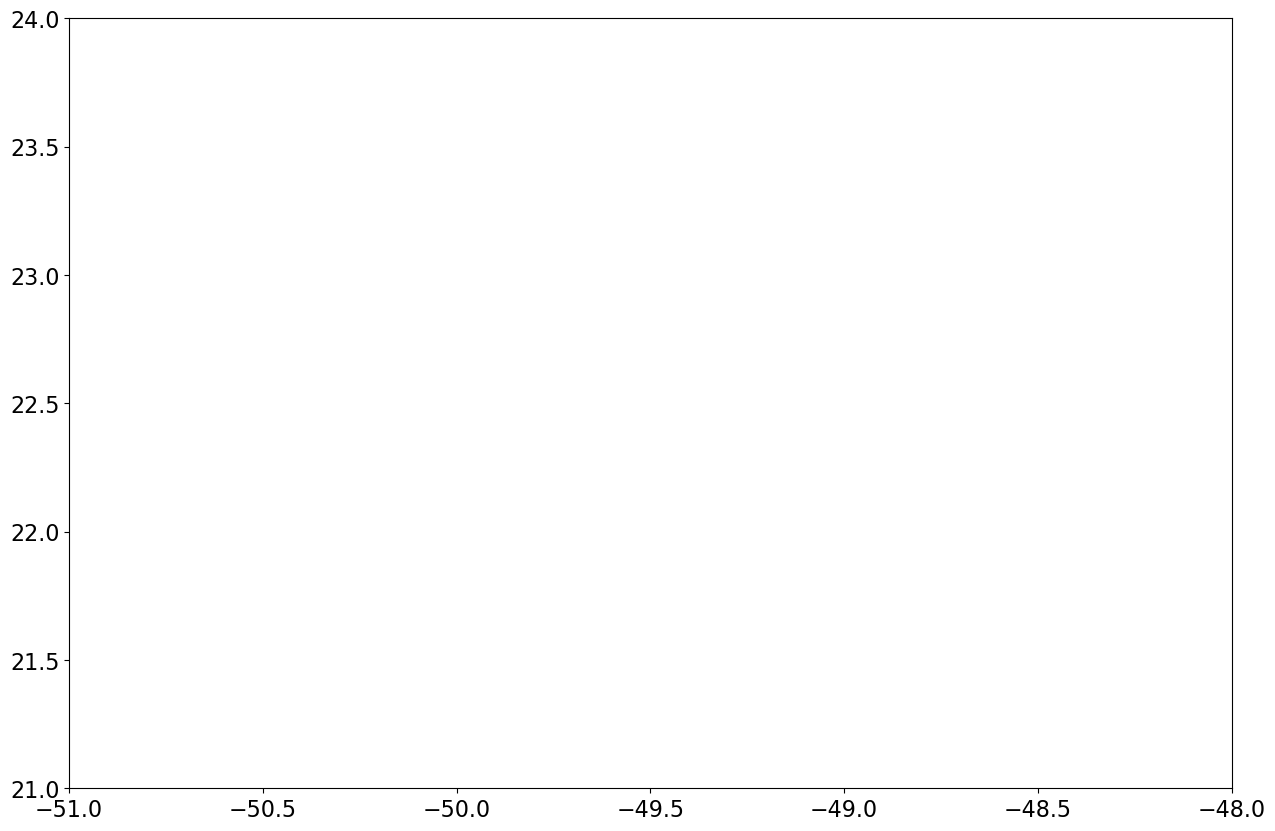

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T035840Z_20241010T104950Z_02088D/ECA_EXAA_ACM_CAP_2B_20241010T035840Z_20241010T104950Z_02088D.h5


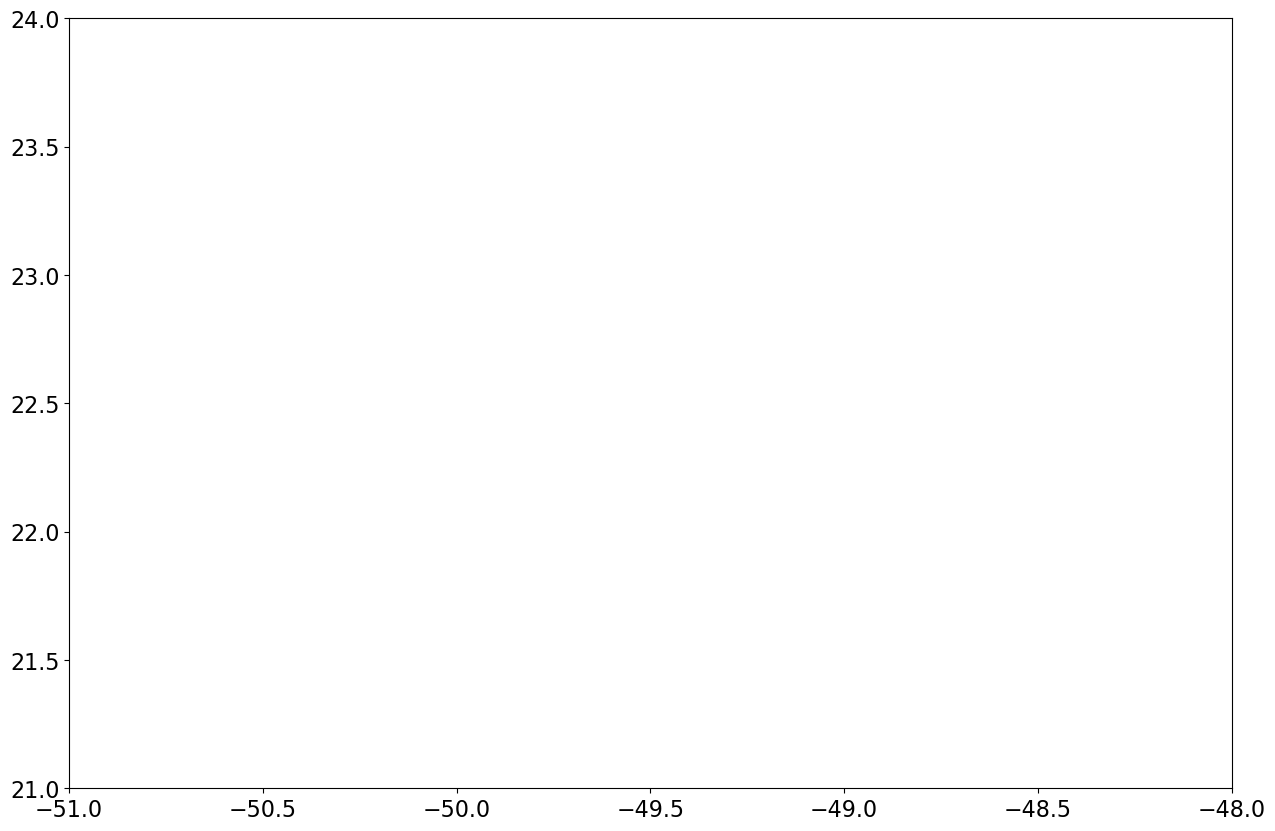

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T041026Z_20241010T104957Z_02088E/ECA_EXAA_ACM_CAP_2B_20241010T041026Z_20241010T104957Z_02088E.h5


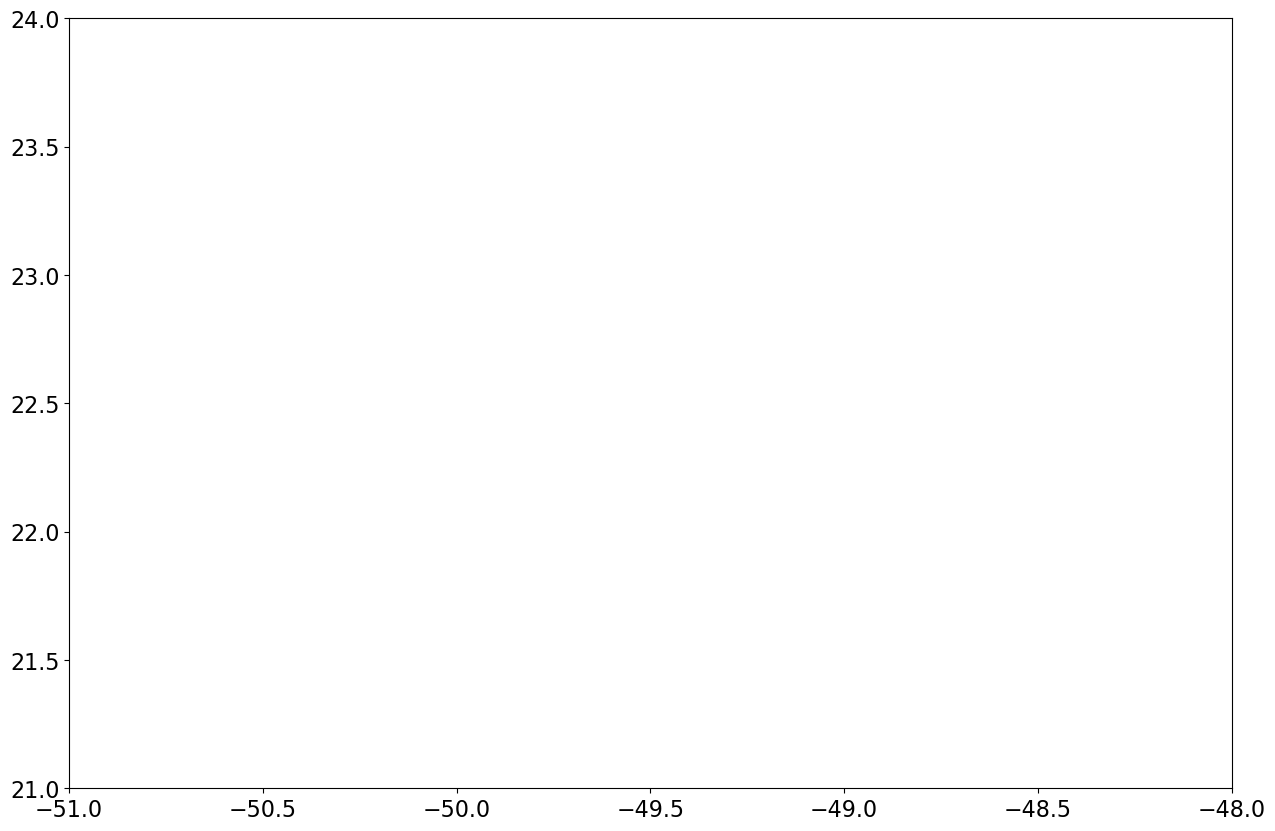

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T042202Z_20241010T104855Z_02088F/ECA_EXAA_ACM_CAP_2B_20241010T042202Z_20241010T104855Z_02088F.h5


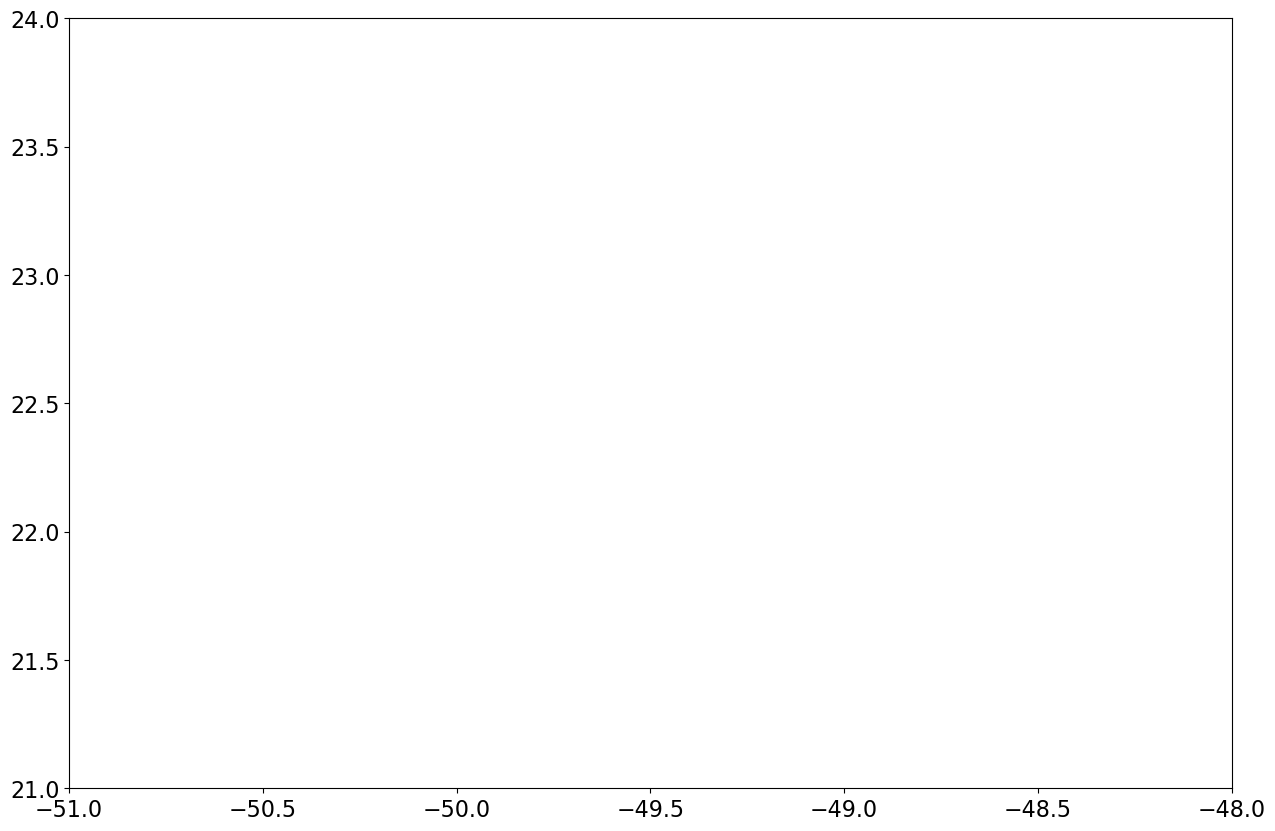

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T043351Z_20241010T104910Z_02088G/ECA_EXAA_ACM_CAP_2B_20241010T043351Z_20241010T104910Z_02088G.h5


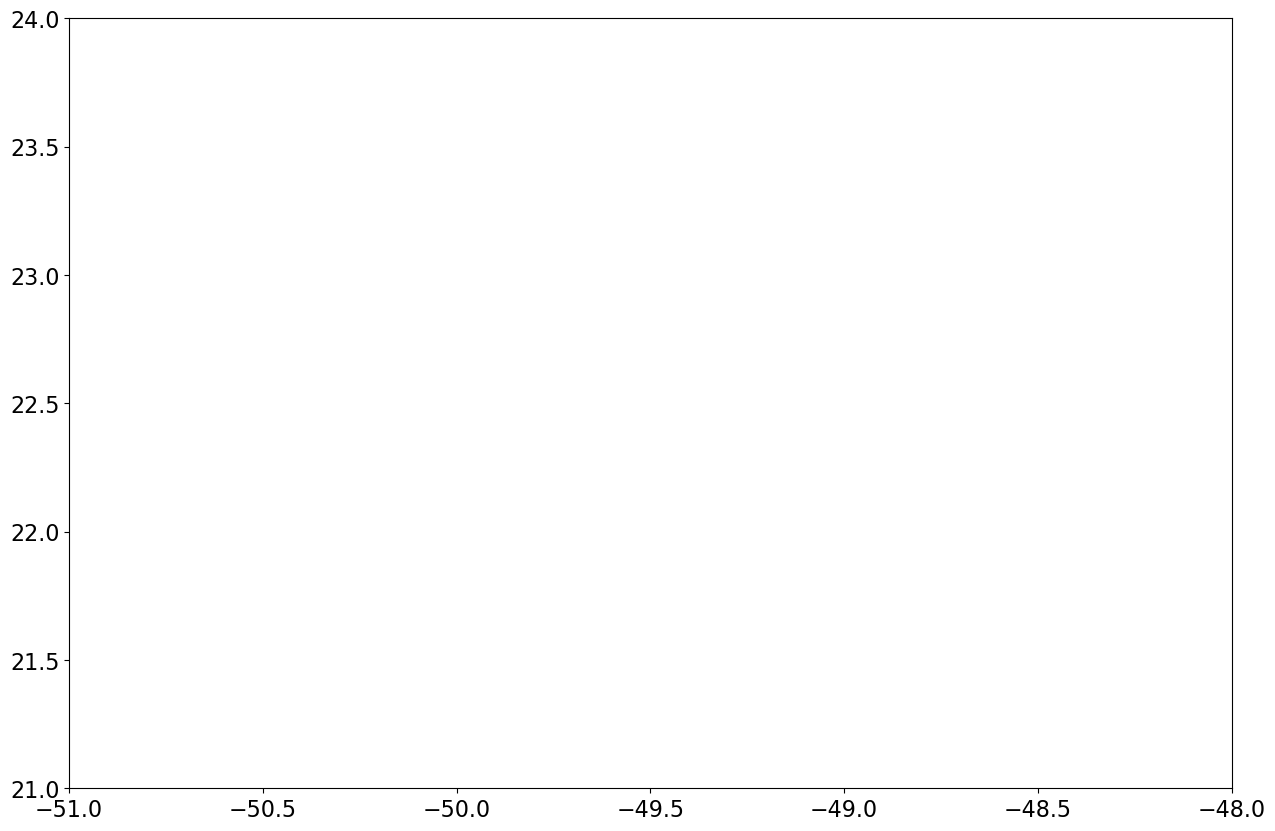

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T044458Z_20241010T104925Z_02088H/ECA_EXAA_ACM_CAP_2B_20241010T044458Z_20241010T104925Z_02088H.h5


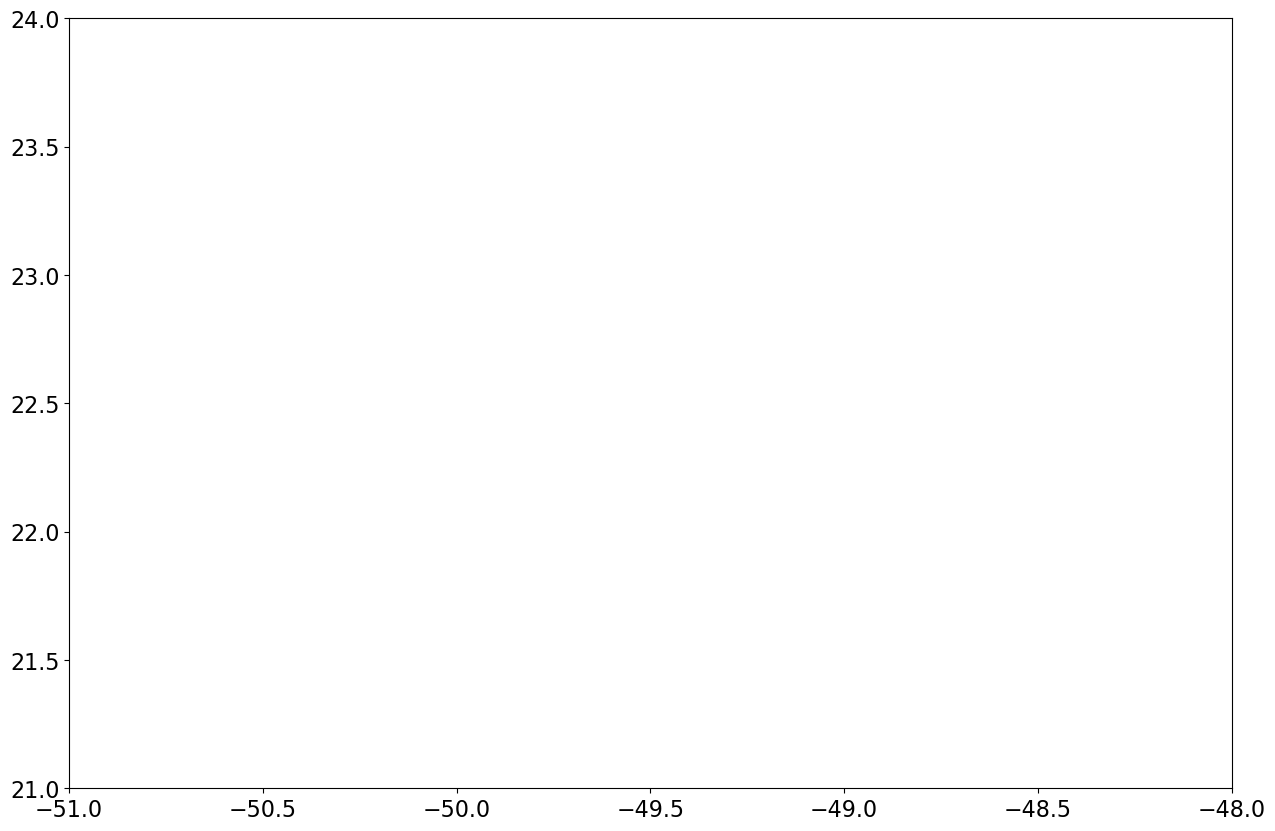

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T045647Z_20241010T105000Z_02089A/ECA_EXAA_ACM_CAP_2B_20241010T045647Z_20241010T105000Z_02089A.h5


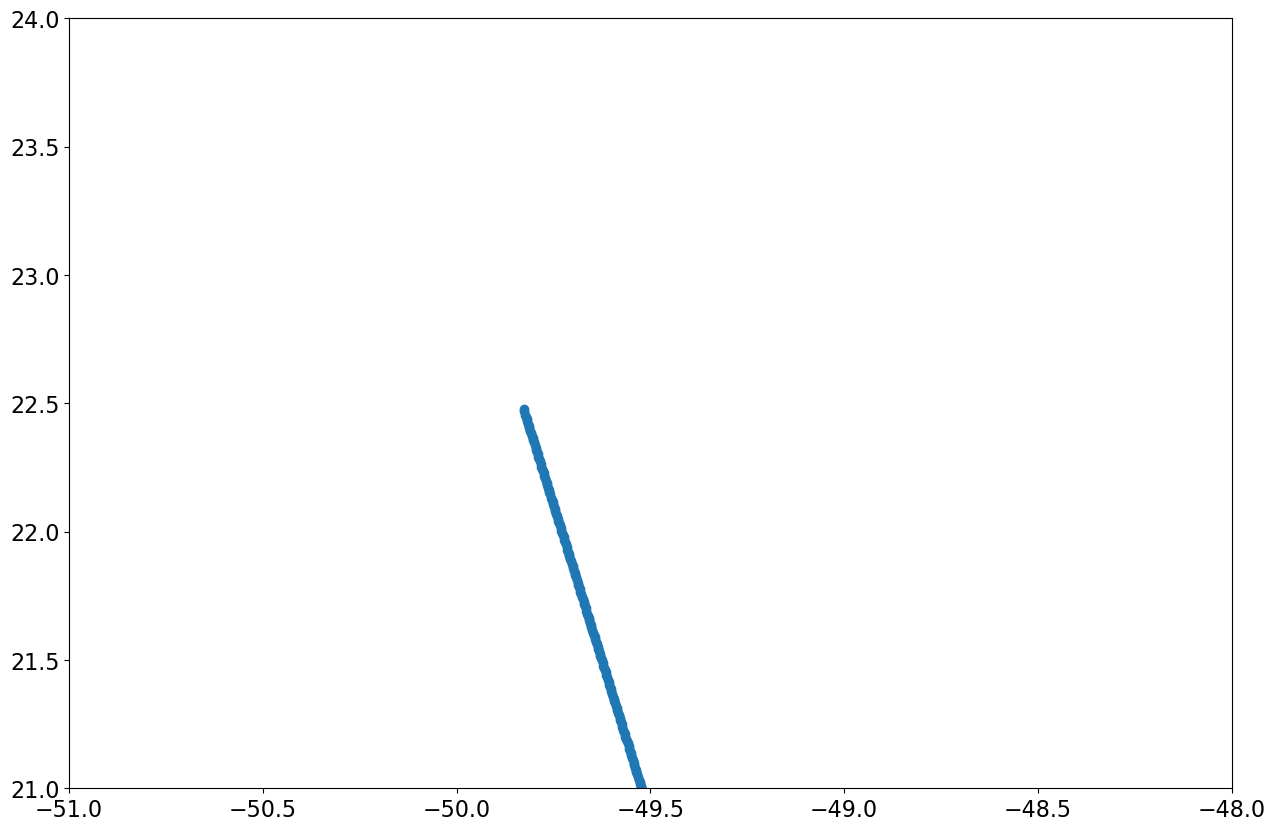

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T050822Z_20241010T104924Z_02089B/ECA_EXAA_ACM_CAP_2B_20241010T050822Z_20241010T104924Z_02089B.h5


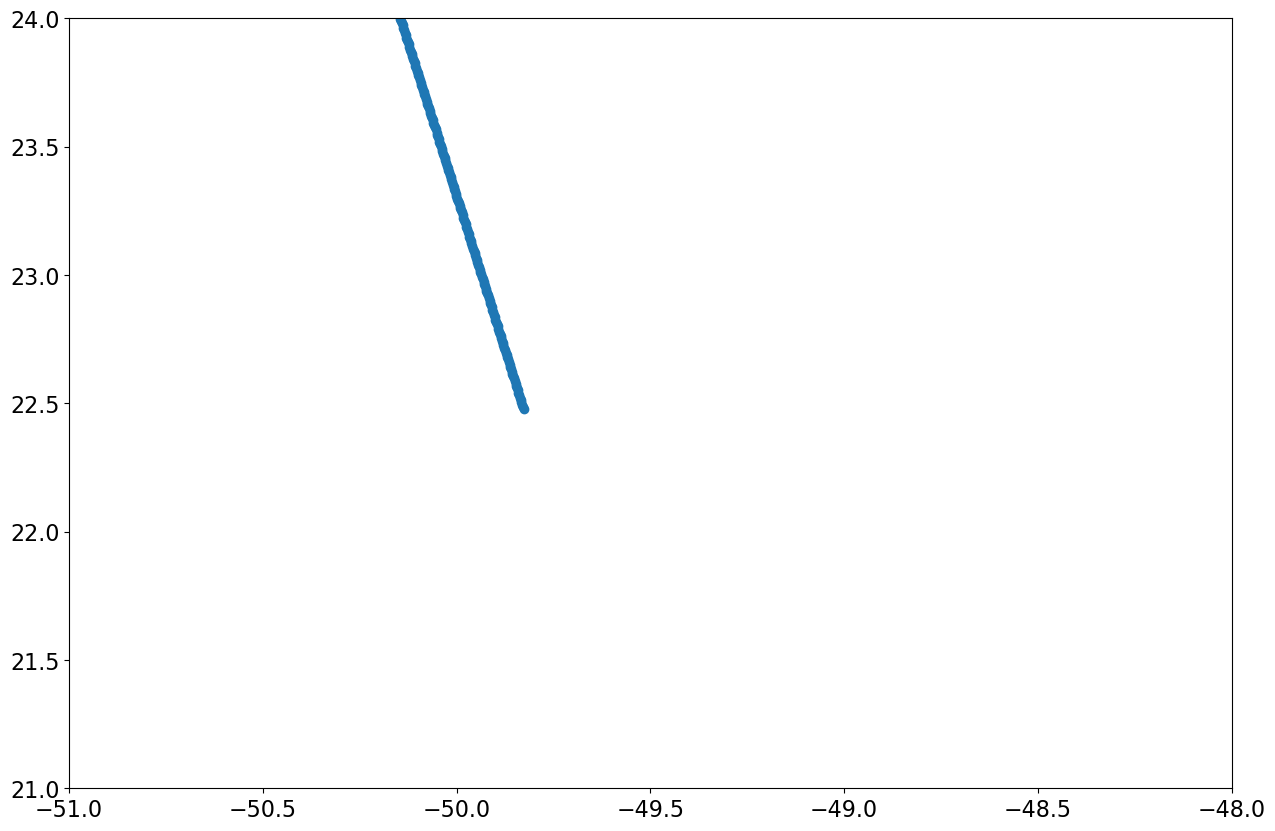

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T052009Z_20241010T104902Z_02089C/ECA_EXAA_ACM_CAP_2B_20241010T052009Z_20241010T104902Z_02089C.h5


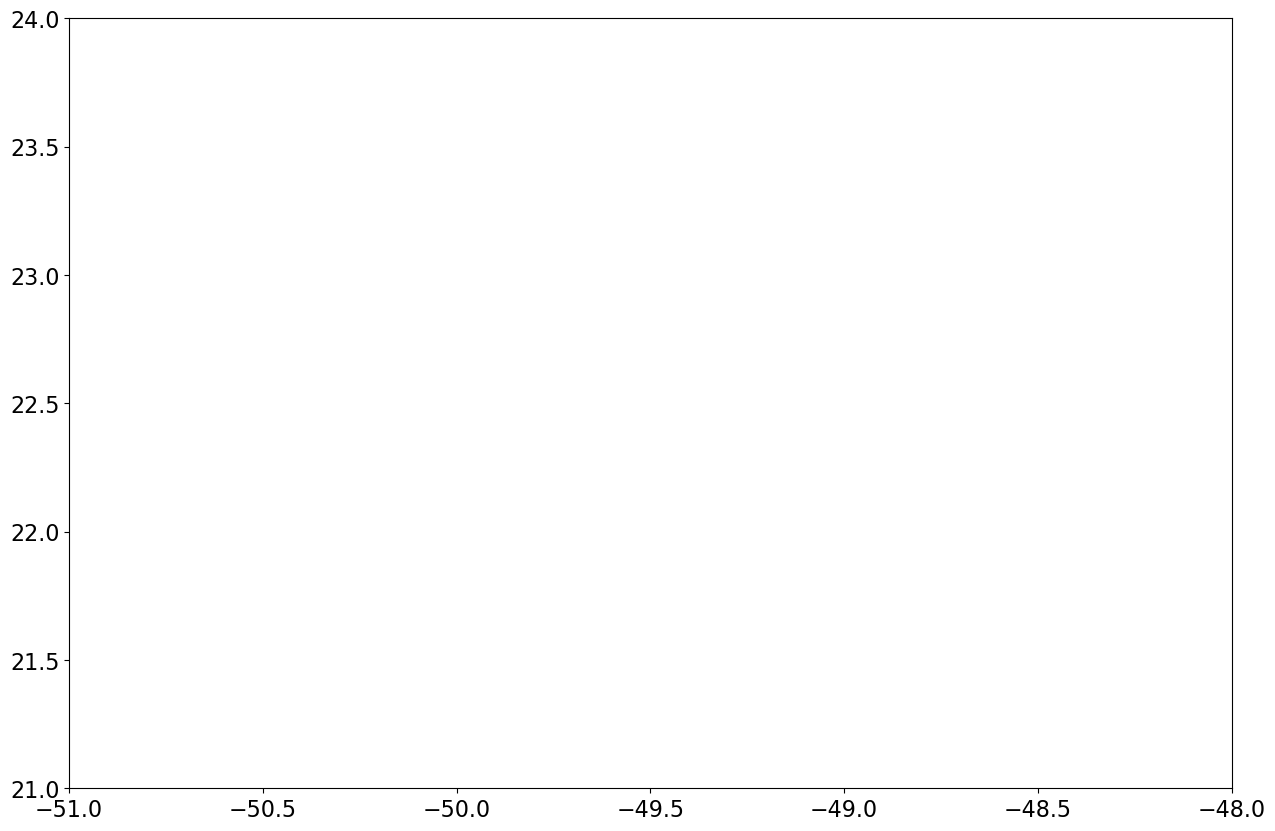

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T053113Z_20241010T105043Z_02089D/ECA_EXAA_ACM_CAP_2B_20241010T053113Z_20241010T105043Z_02089D.h5


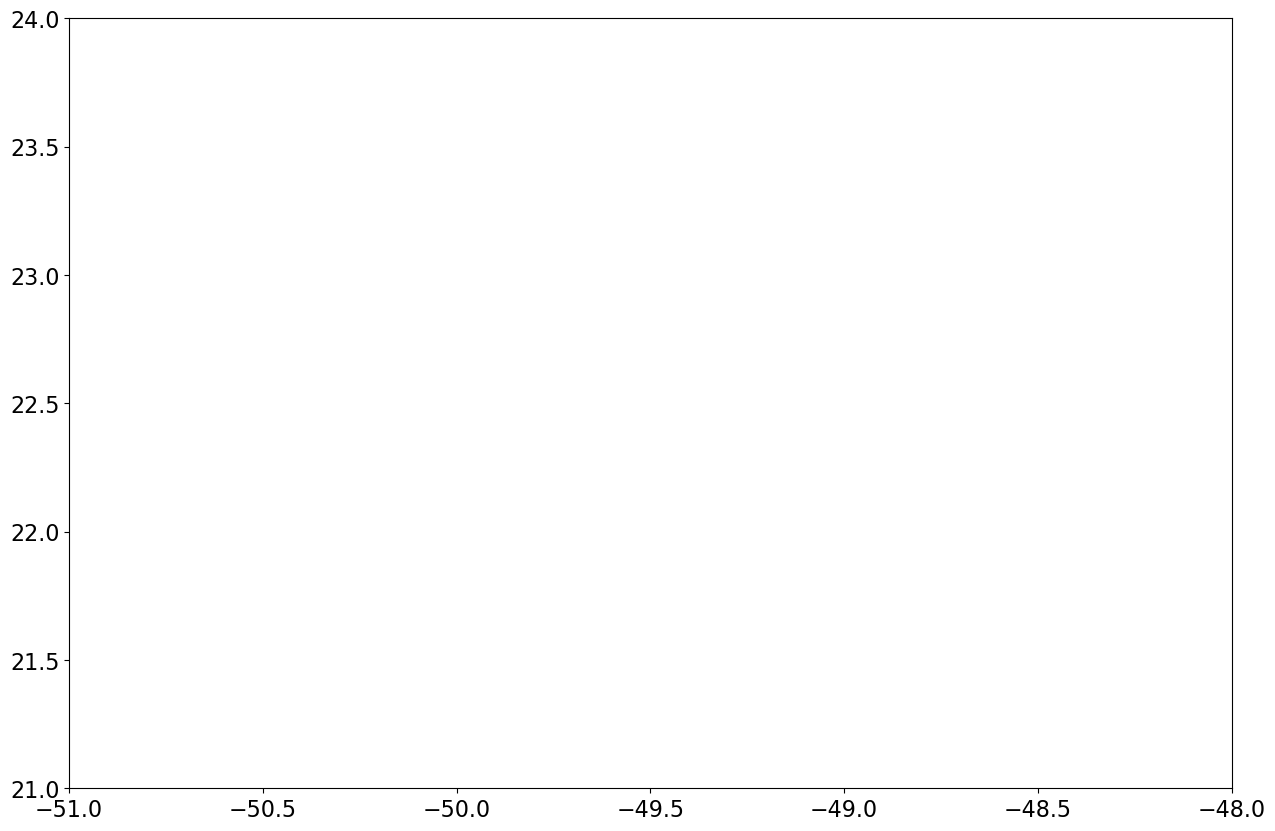

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T054259Z_20241010T104925Z_02089E/ECA_EXAA_ACM_CAP_2B_20241010T054259Z_20241010T104925Z_02089E.h5


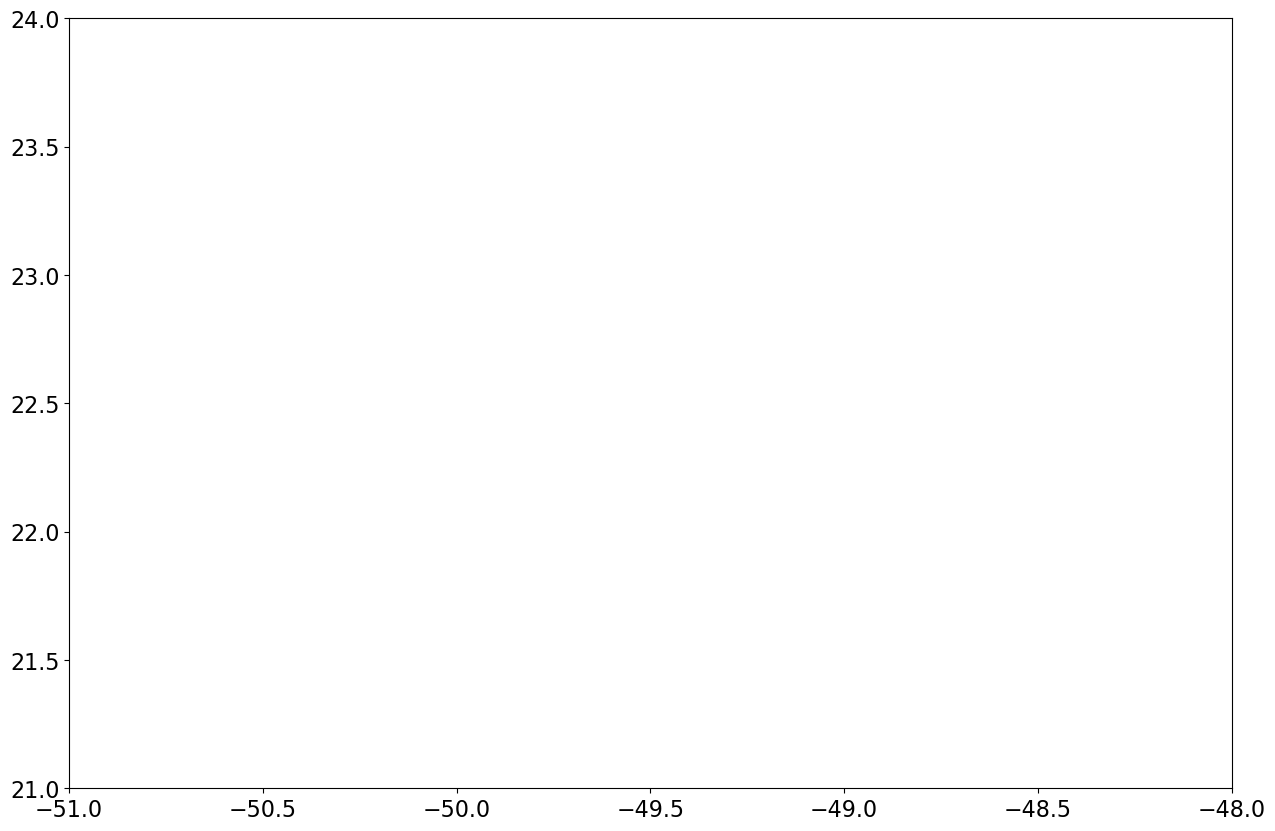

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T055435Z_20241010T104905Z_02089F/ECA_EXAA_ACM_CAP_2B_20241010T055435Z_20241010T104905Z_02089F.h5


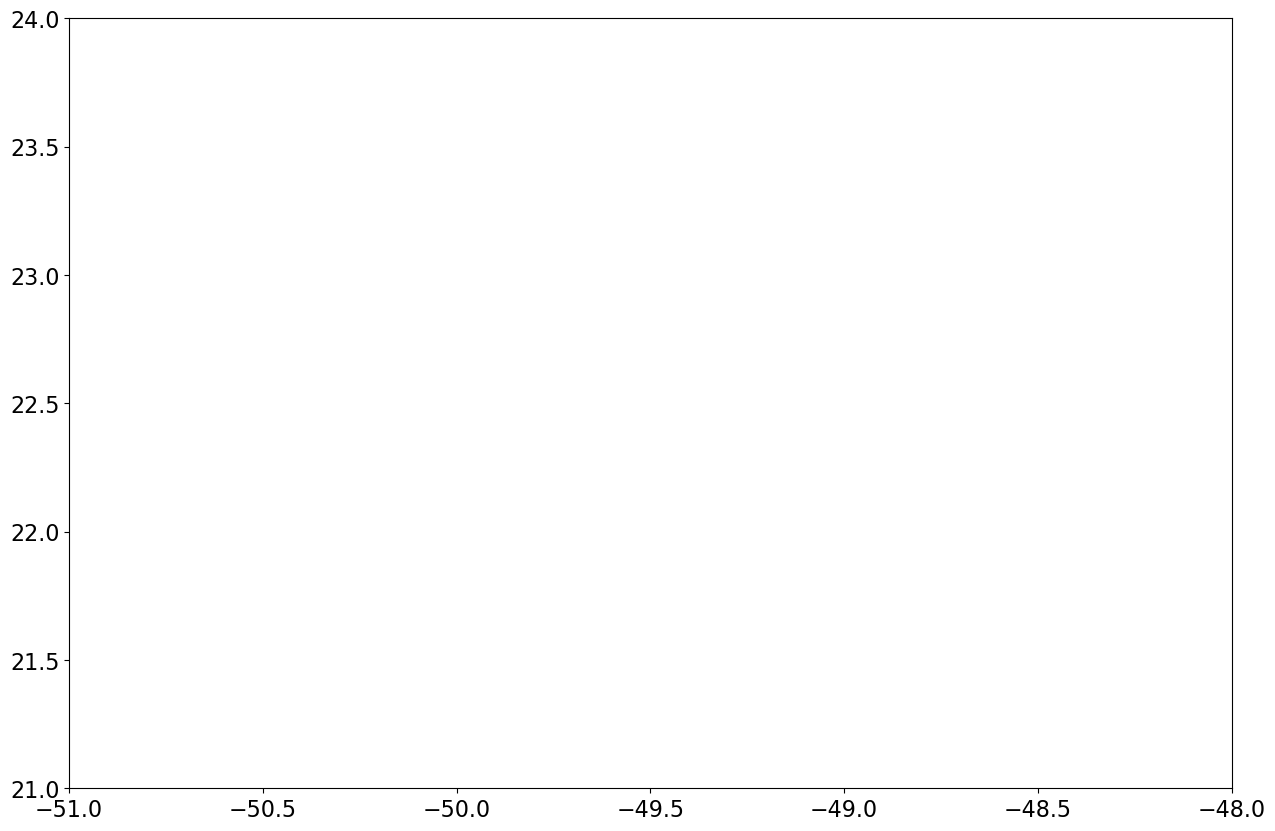

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T060624Z_20241010T104923Z_02089G/ECA_EXAA_ACM_CAP_2B_20241010T060624Z_20241010T104923Z_02089G.h5


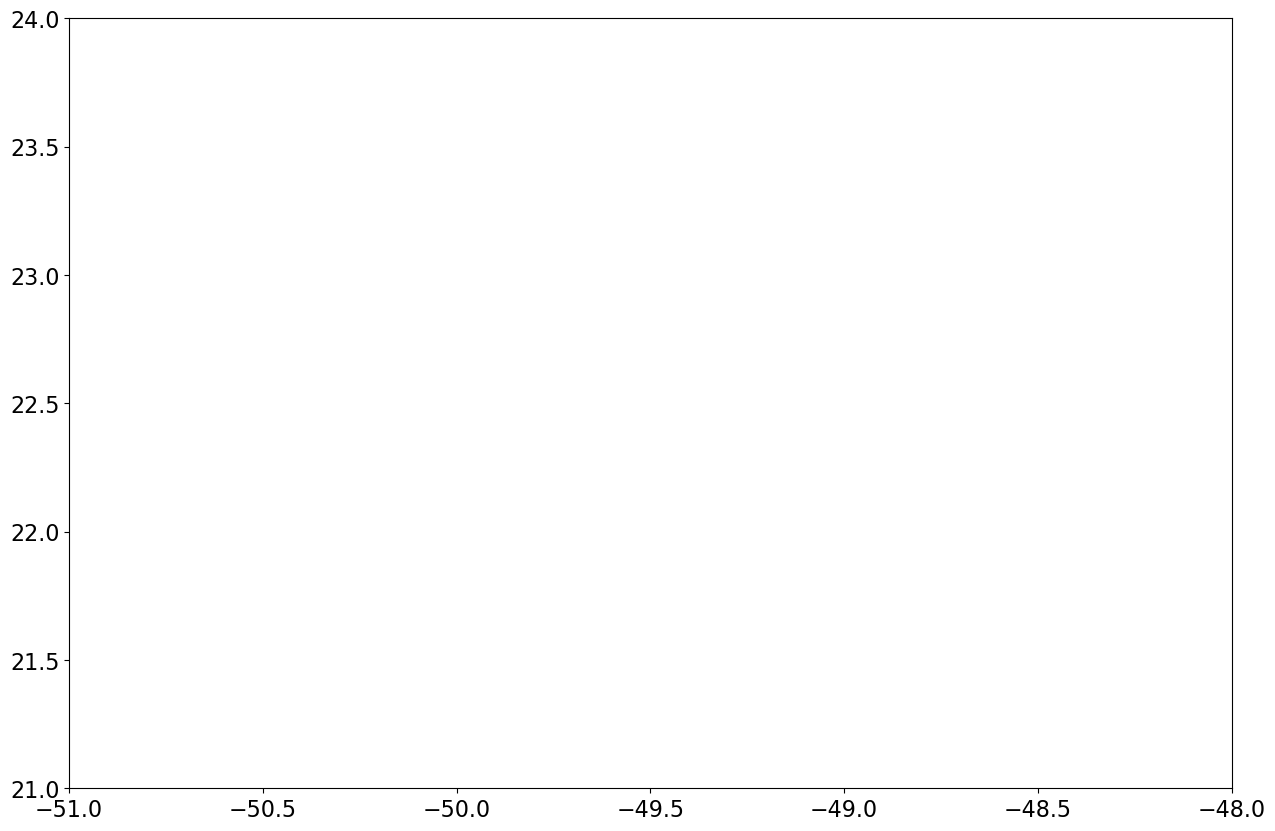

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T061731Z_20241010T105005Z_02089H/ECA_EXAA_ACM_CAP_2B_20241010T061731Z_20241010T105005Z_02089H.h5


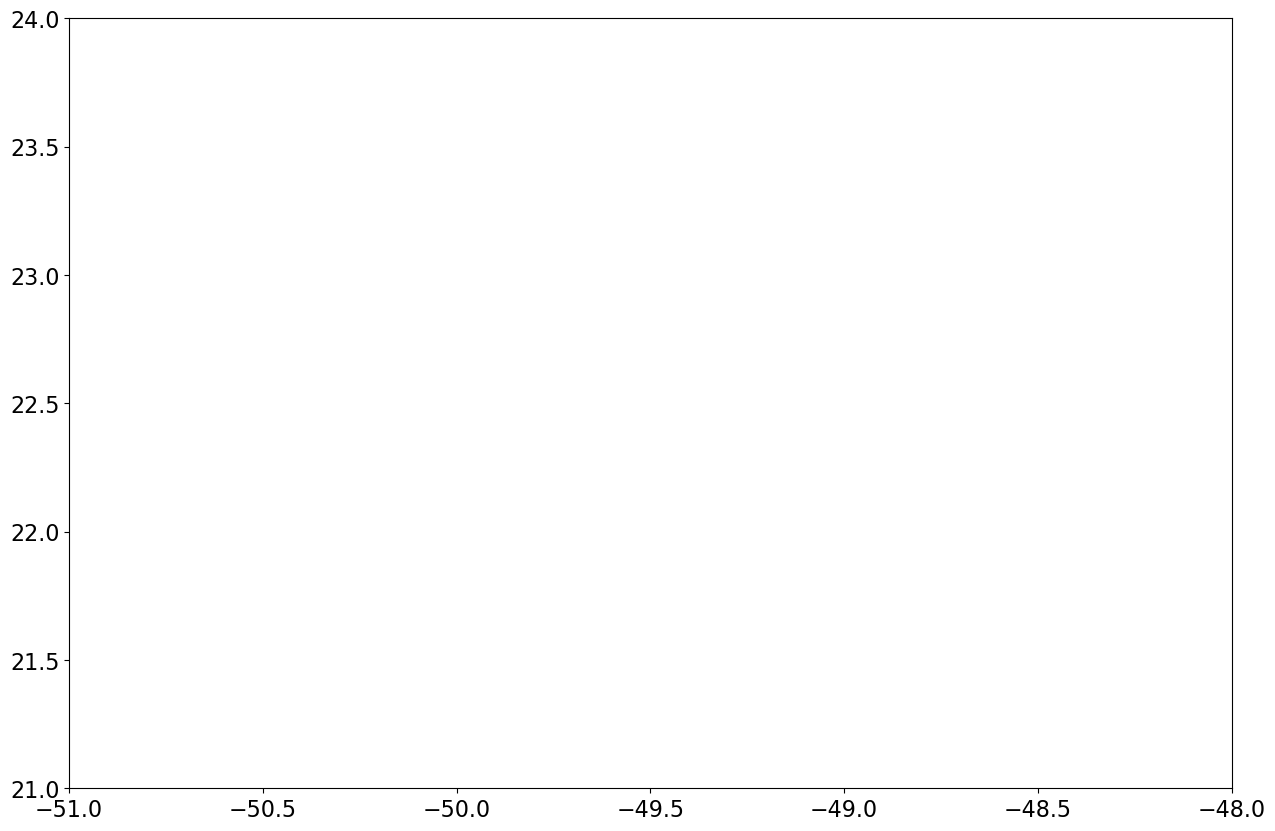

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T062920Z_20241010T105000Z_02090A/ECA_EXAA_ACM_CAP_2B_20241010T062920Z_20241010T105000Z_02090A.h5


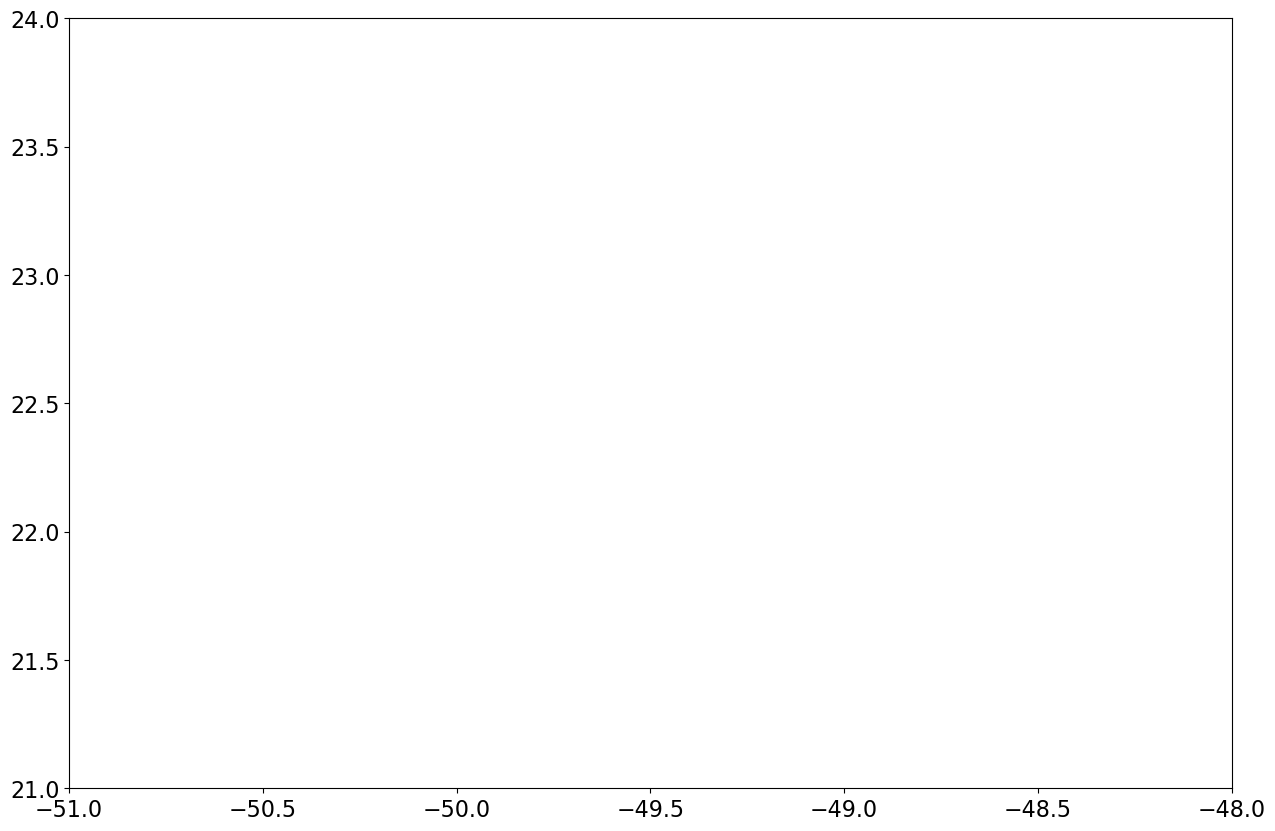

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T064055Z_20241010T104904Z_02090B/ECA_EXAA_ACM_CAP_2B_20241010T064055Z_20241010T104904Z_02090B.h5


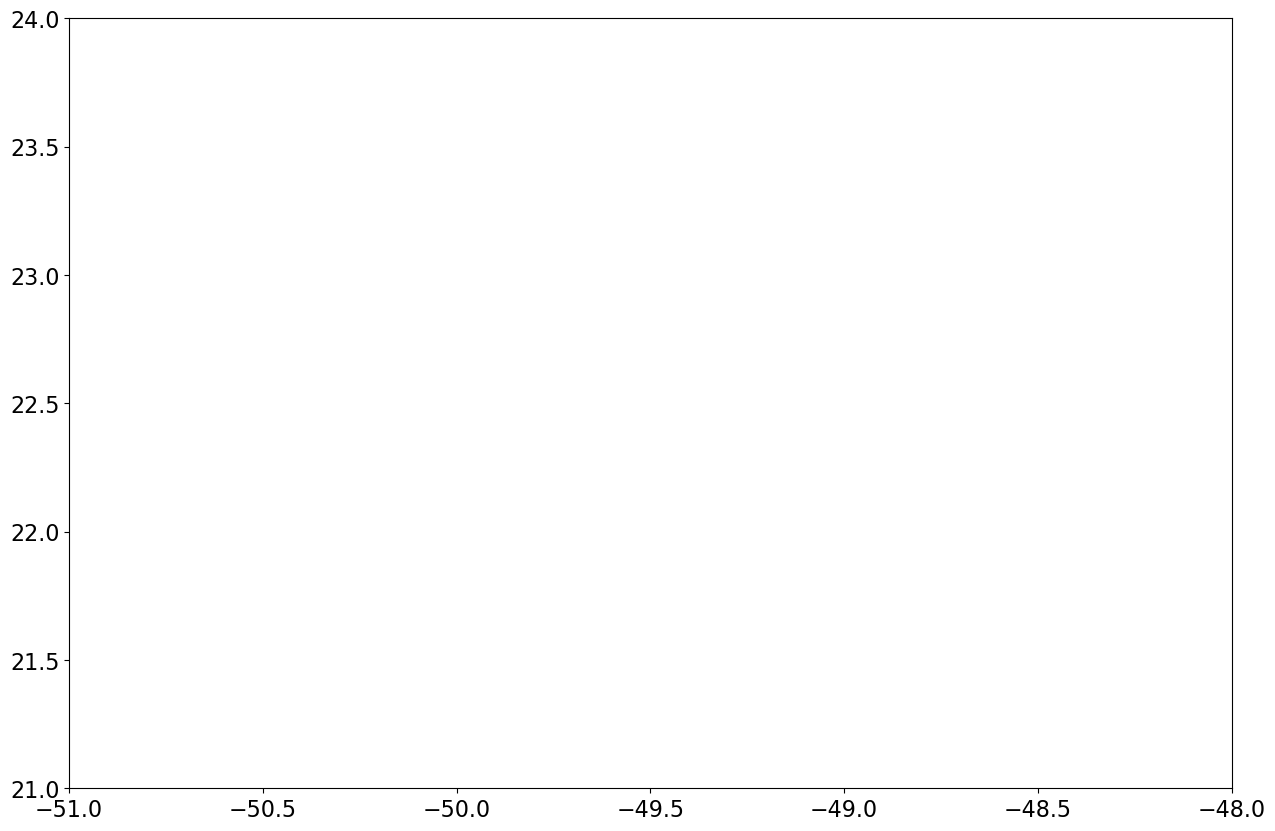

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T065242Z_20241010T105130Z_02090C/ECA_EXAA_ACM_CAP_2B_20241010T065242Z_20241010T105130Z_02090C.h5


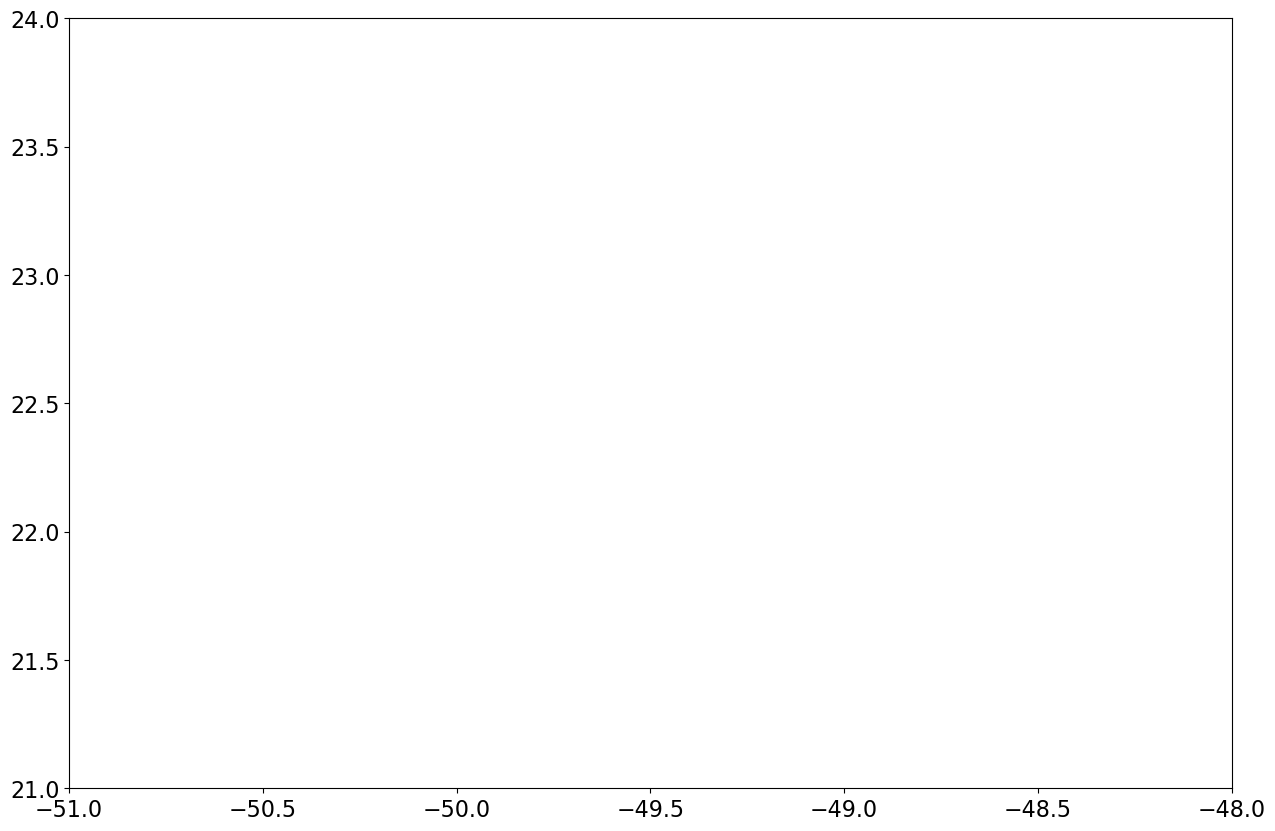

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T070346Z_20241010T105927Z_02090D/ECA_EXAA_ACM_CAP_2B_20241010T070346Z_20241010T105927Z_02090D.h5


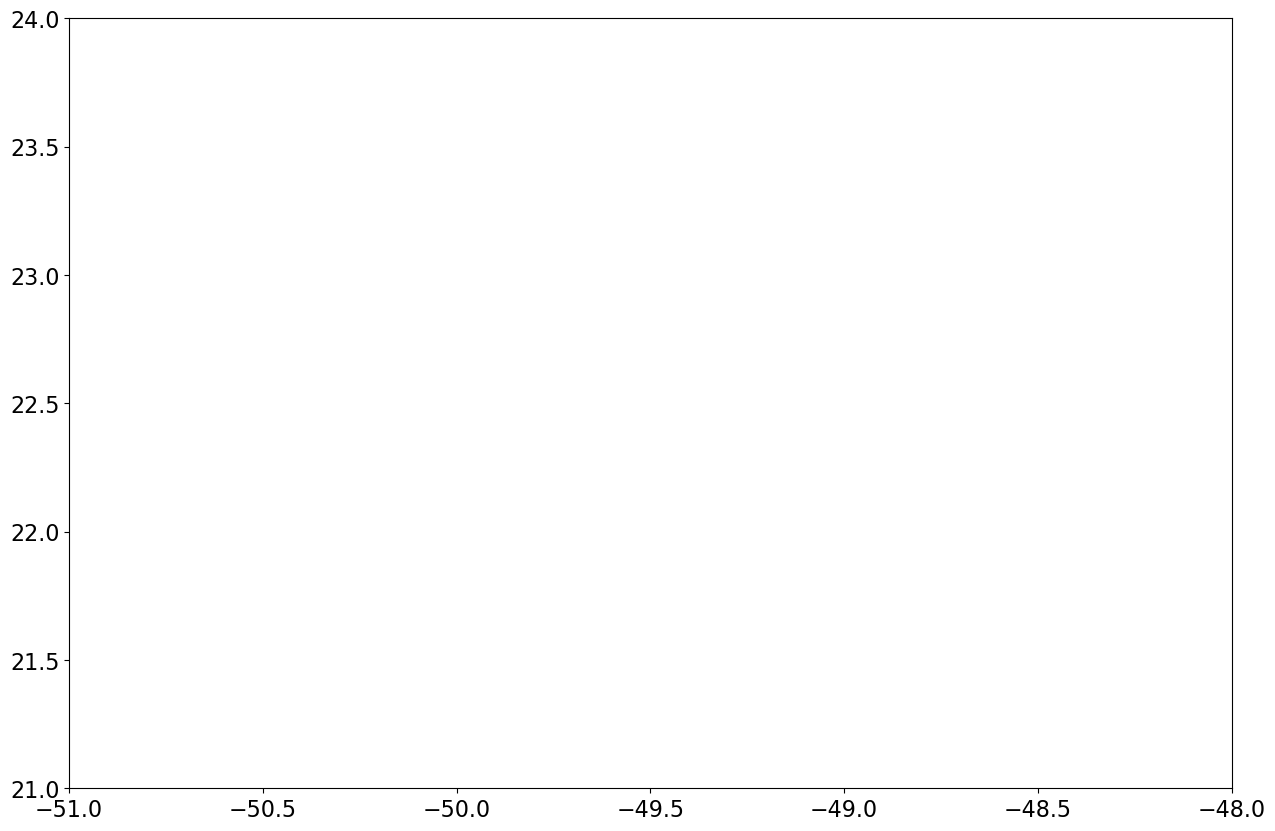

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T071532Z_20241010T105724Z_02090E/ECA_EXAA_ACM_CAP_2B_20241010T071532Z_20241010T105724Z_02090E.h5


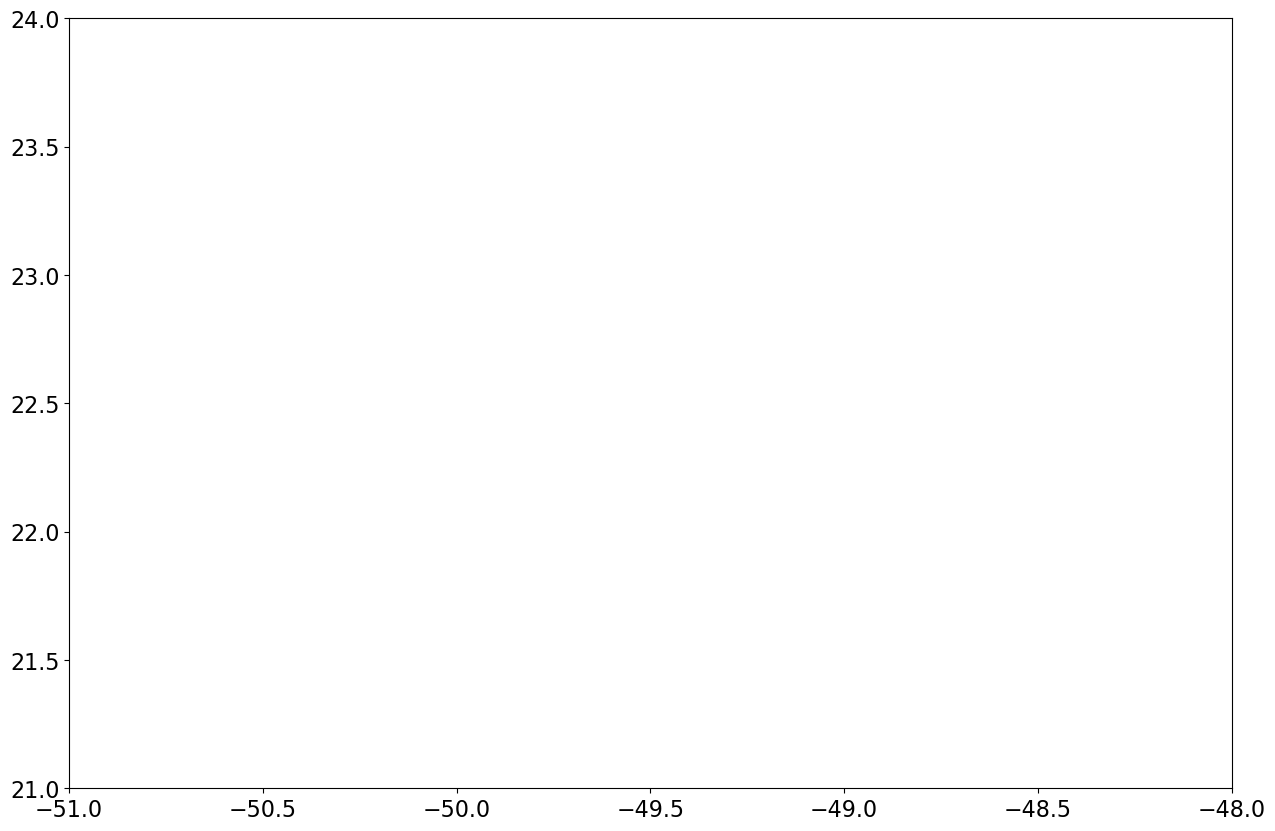

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T072708Z_20241010T110057Z_02090F/ECA_EXAA_ACM_CAP_2B_20241010T072708Z_20241010T110057Z_02090F.h5


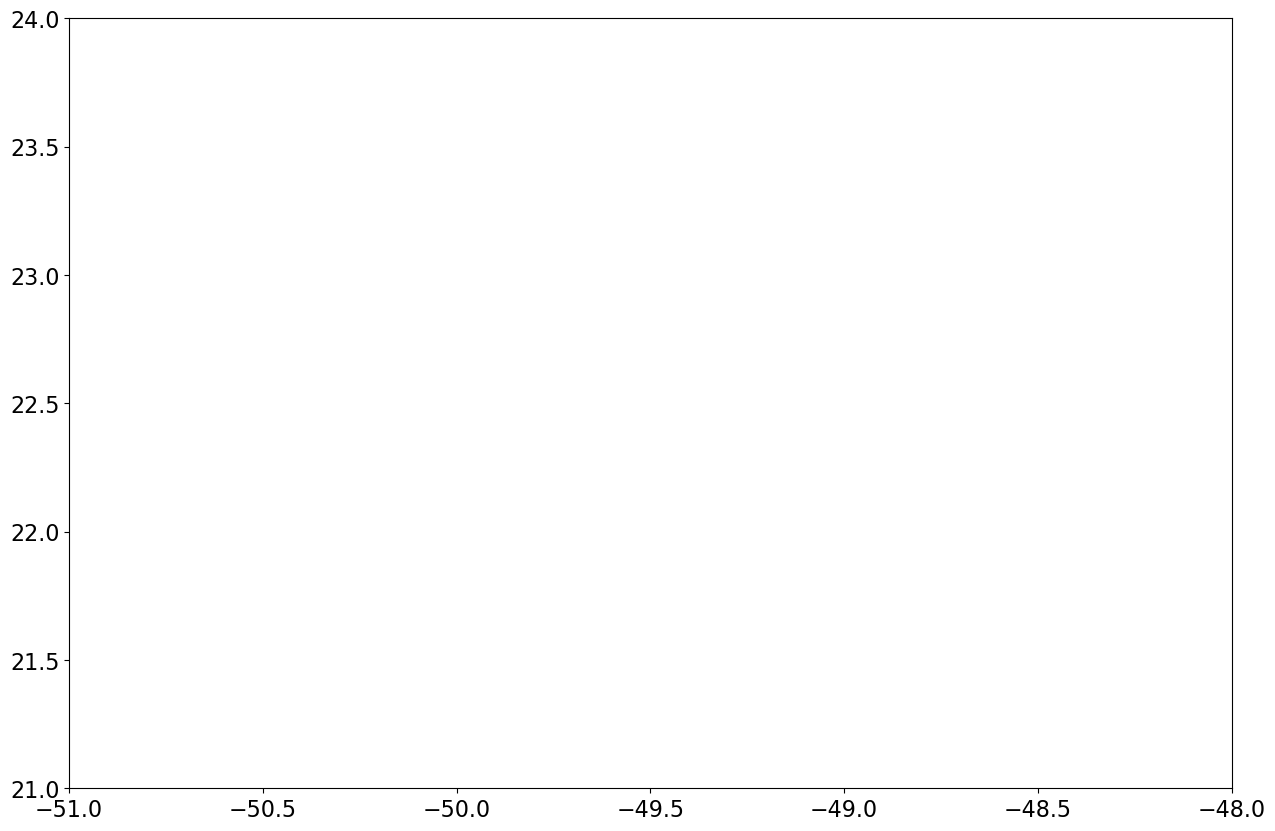

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T073857Z_20241010T105947Z_02090G/ECA_EXAA_ACM_CAP_2B_20241010T073857Z_20241010T105947Z_02090G.h5


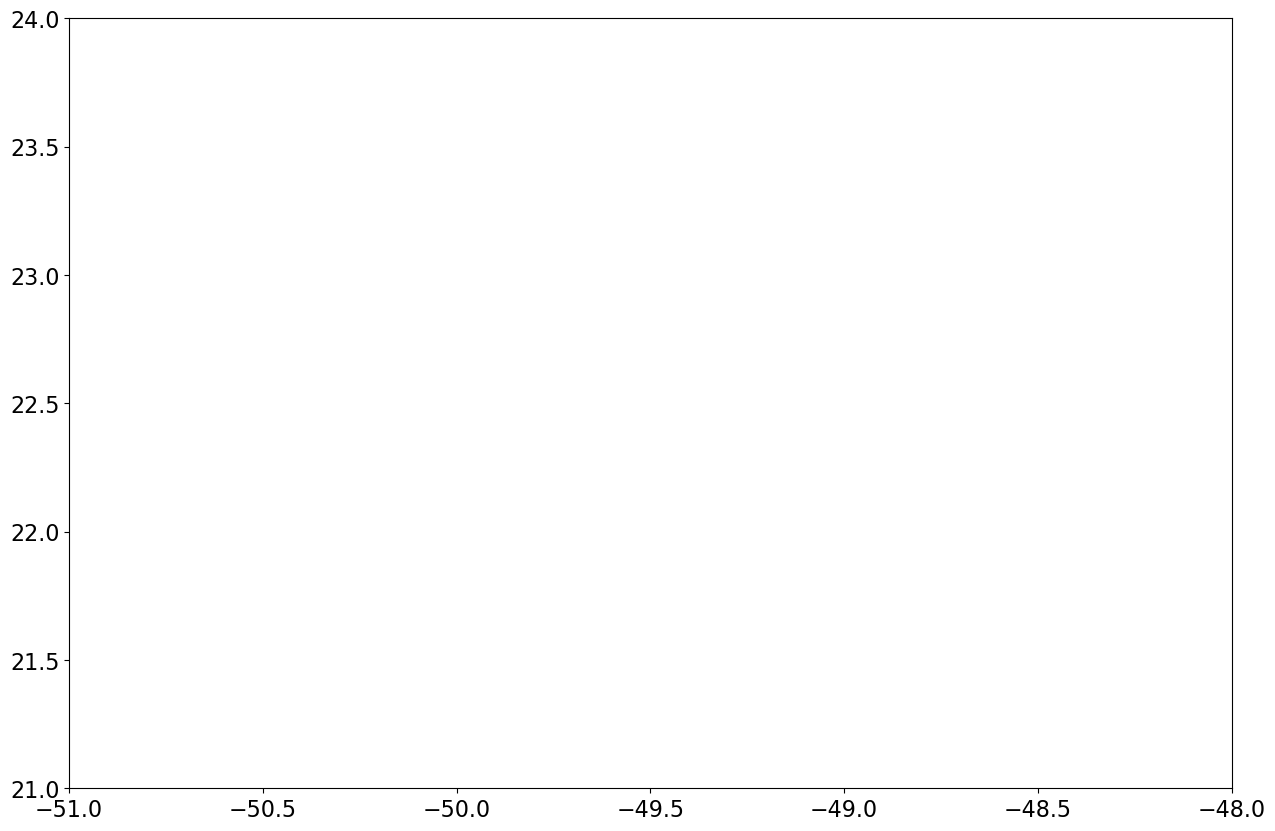

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T075004Z_20241010T104925Z_02090H/ECA_EXAA_ACM_CAP_2B_20241010T075004Z_20241010T104925Z_02090H.h5


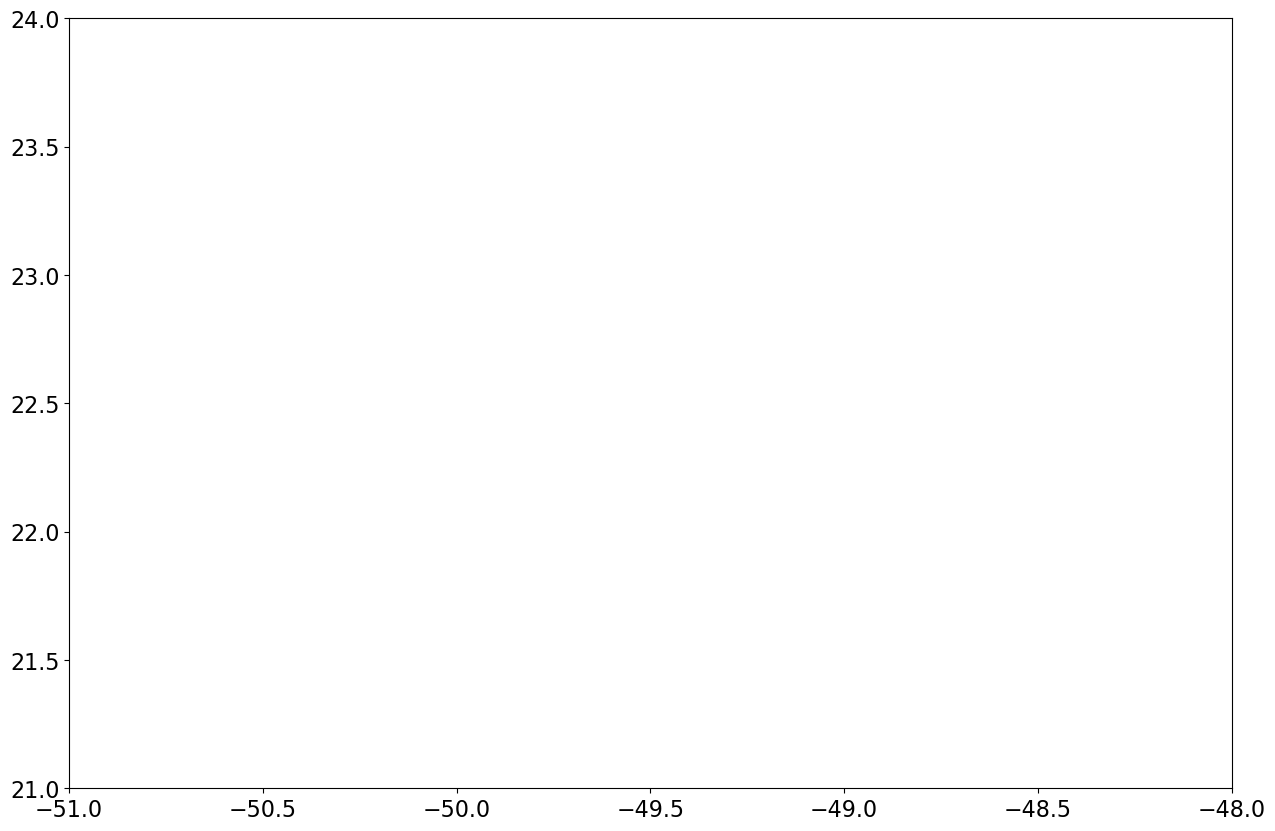

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T080153Z_20241010T105605Z_02091A/ECA_EXAA_ACM_CAP_2B_20241010T080153Z_20241010T105605Z_02091A.h5


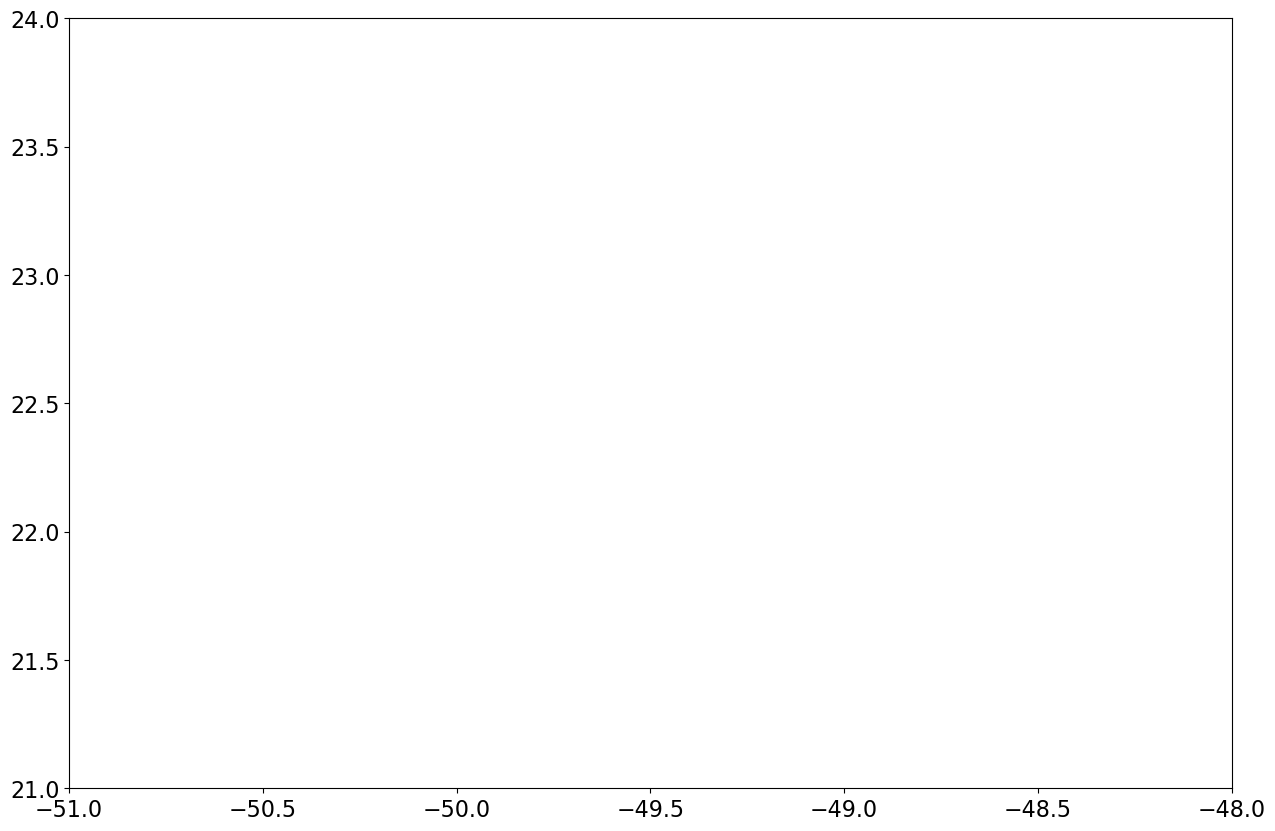

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T081328Z_20241011T005419Z_02091B/ECA_EXAA_ACM_CAP_2B_20241010T081328Z_20241011T005419Z_02091B.h5


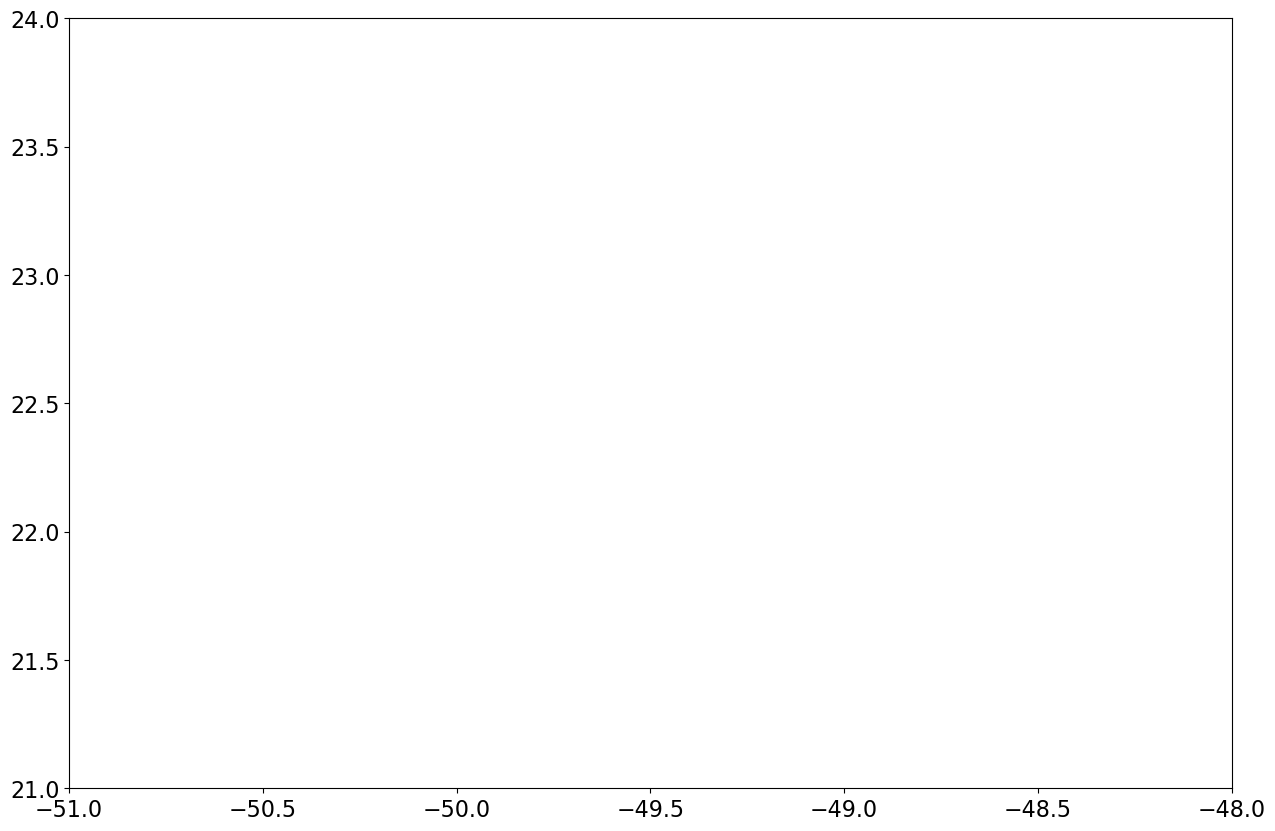

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T082514Z_20241011T010219Z_02091C/ECA_EXAA_ACM_CAP_2B_20241010T082514Z_20241011T010219Z_02091C.h5


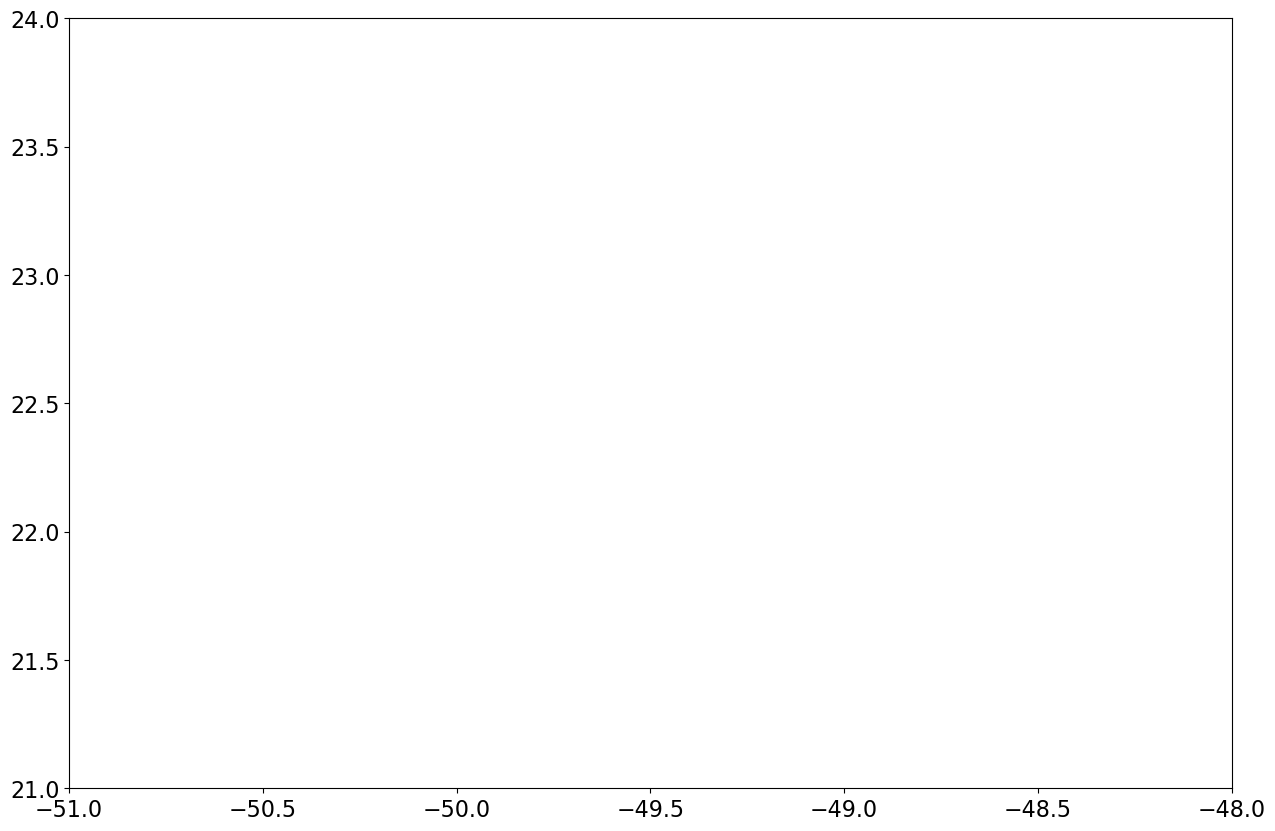

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T083618Z_20241011T005925Z_02091D/ECA_EXAA_ACM_CAP_2B_20241010T083618Z_20241011T005925Z_02091D.h5


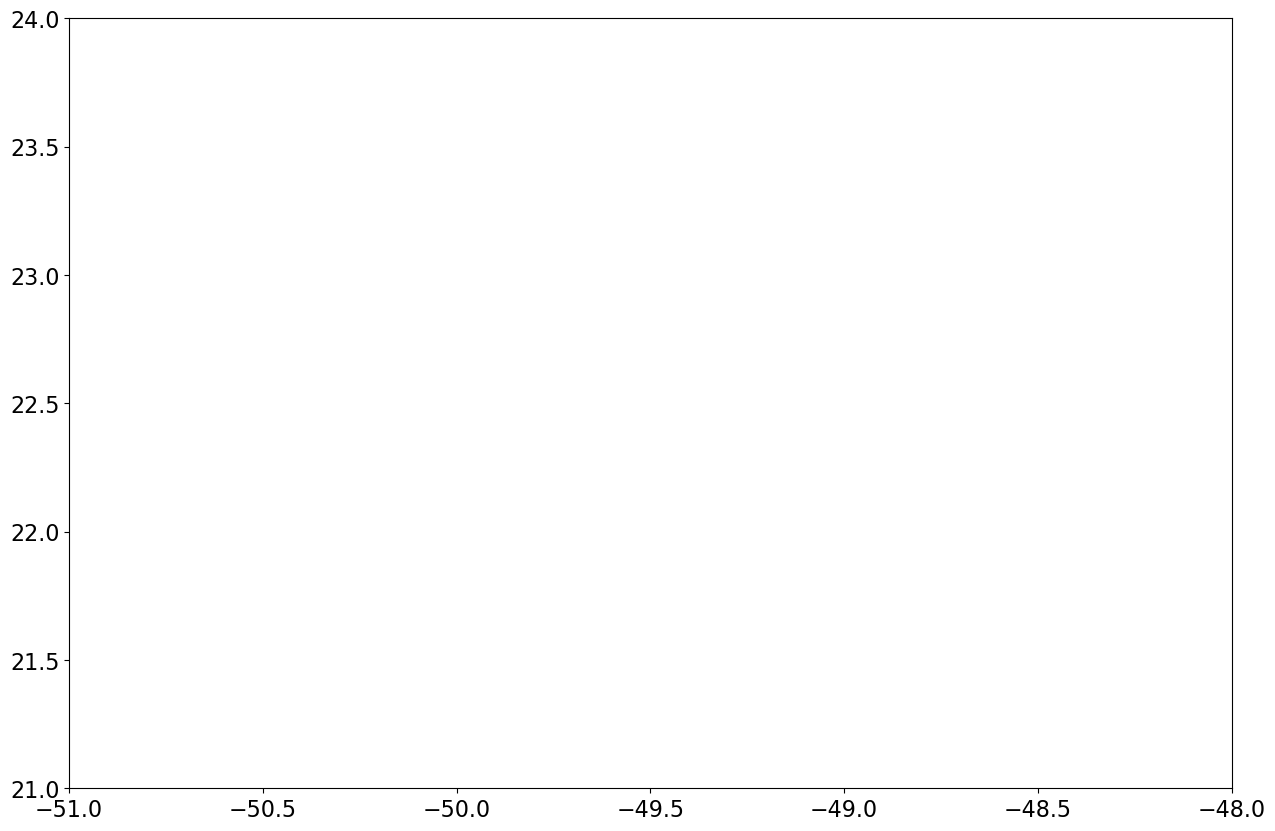

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T084805Z_20241011T010120Z_02091E/ECA_EXAA_ACM_CAP_2B_20241010T084805Z_20241011T010120Z_02091E.h5


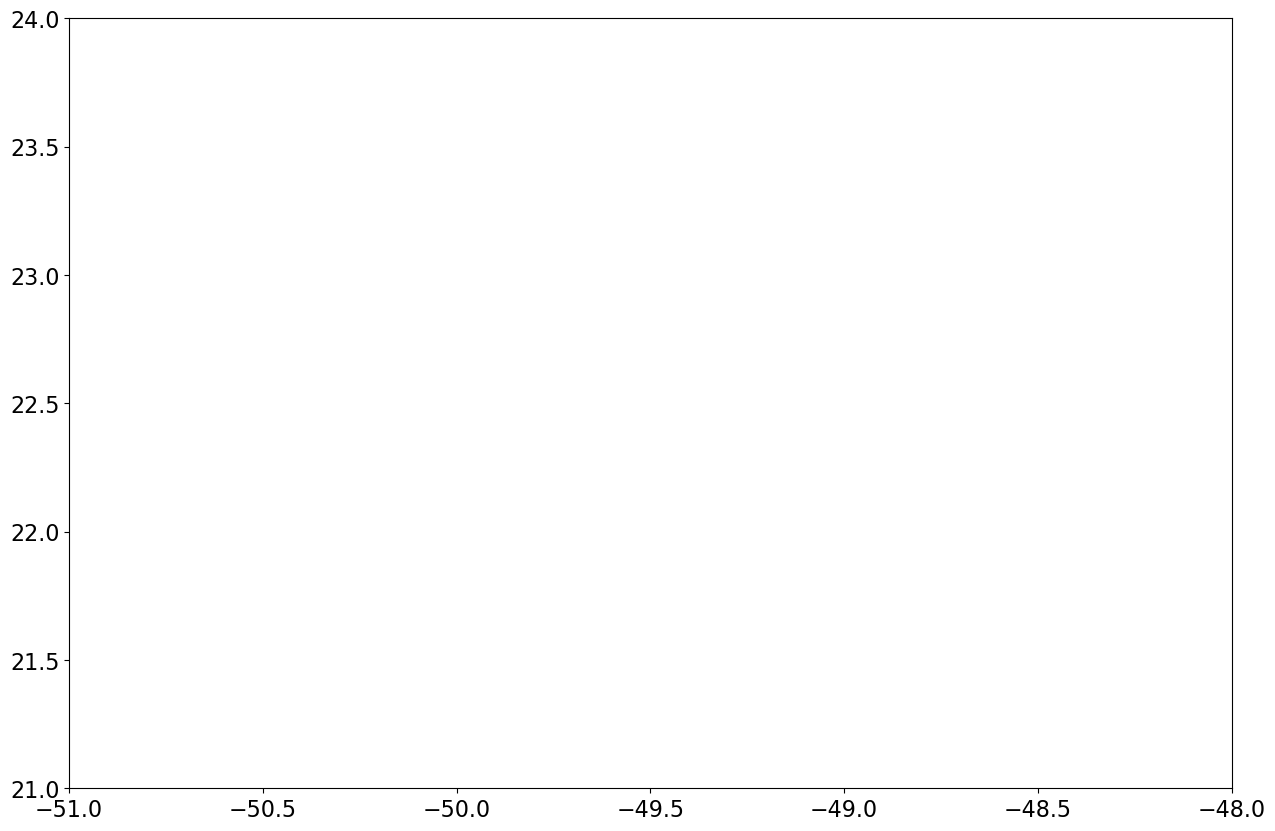

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T085940Z_20241011T005819Z_02091F/ECA_EXAA_ACM_CAP_2B_20241010T085940Z_20241011T005819Z_02091F.h5


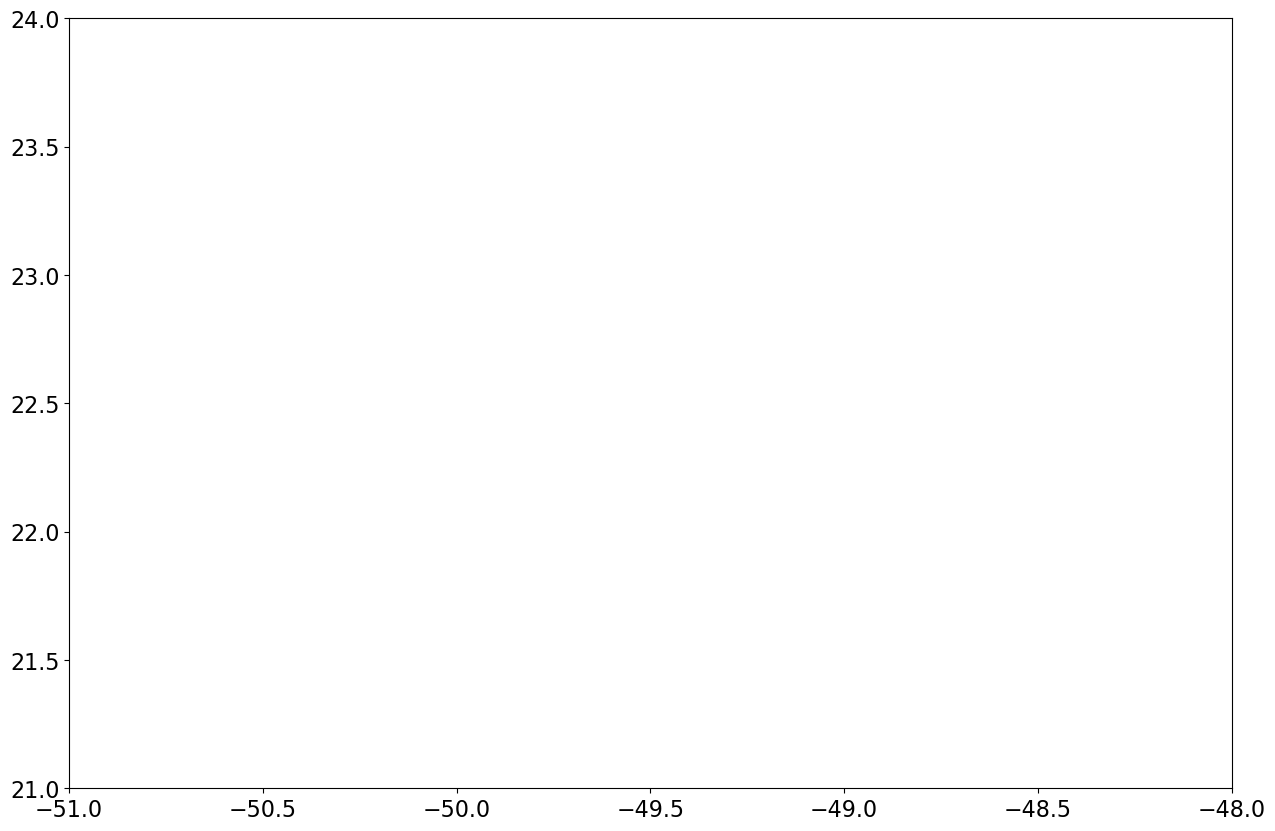

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T091130Z_20241011T010420Z_02091G/ECA_EXAA_ACM_CAP_2B_20241010T091130Z_20241011T010420Z_02091G.h5


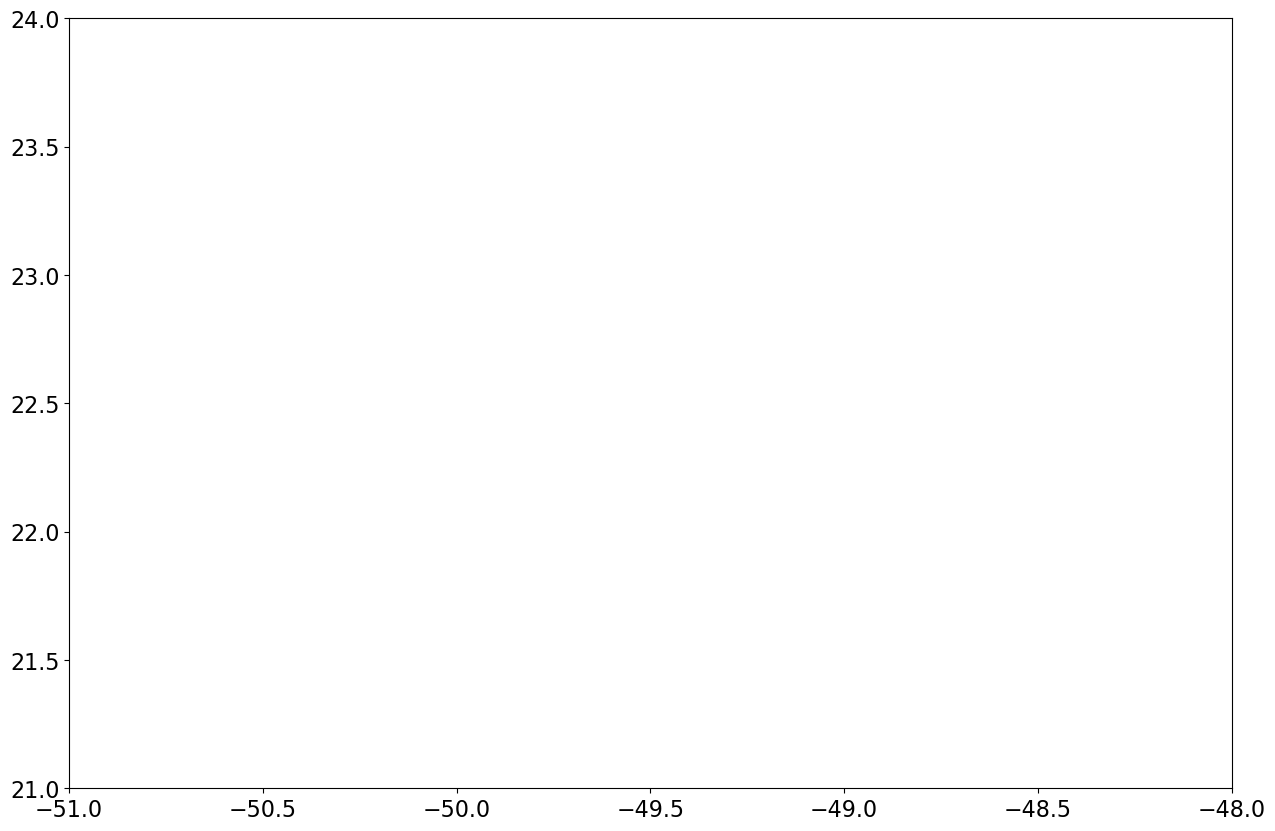

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T092237Z_20241011T010019Z_02091H/ECA_EXAA_ACM_CAP_2B_20241010T092237Z_20241011T010019Z_02091H.h5


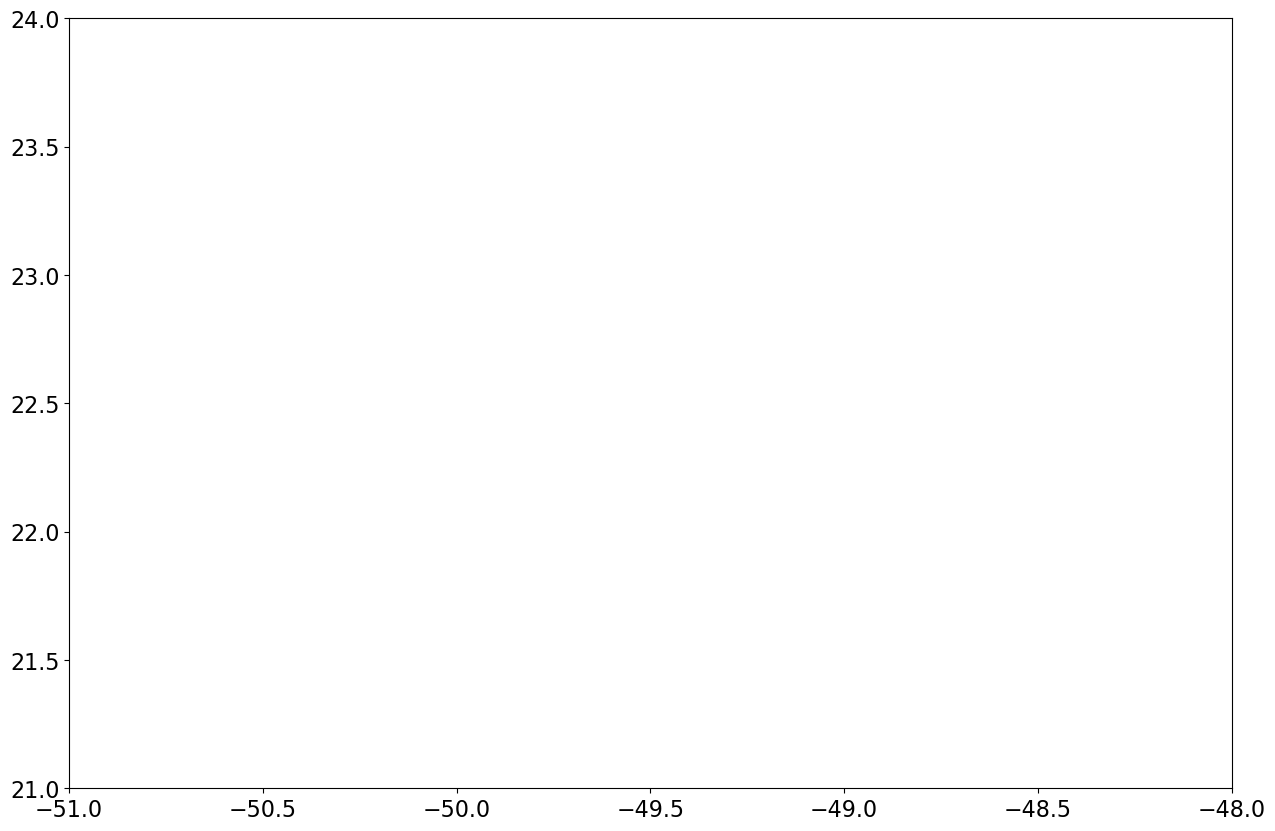

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T093426Z_20241011T005925Z_02092A/ECA_EXAA_ACM_CAP_2B_20241010T093426Z_20241011T005925Z_02092A.h5


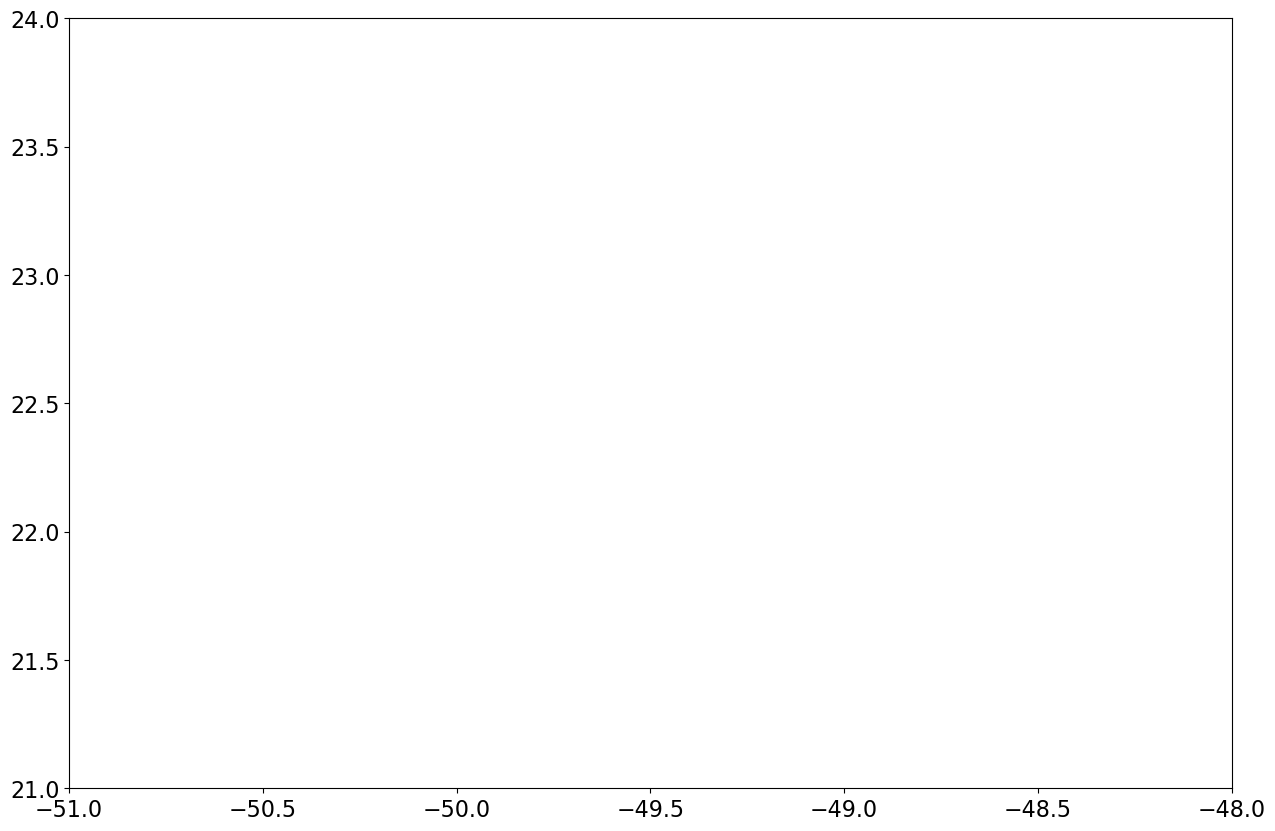

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T094601Z_20241011T005921Z_02092B/ECA_EXAA_ACM_CAP_2B_20241010T094601Z_20241011T005921Z_02092B.h5


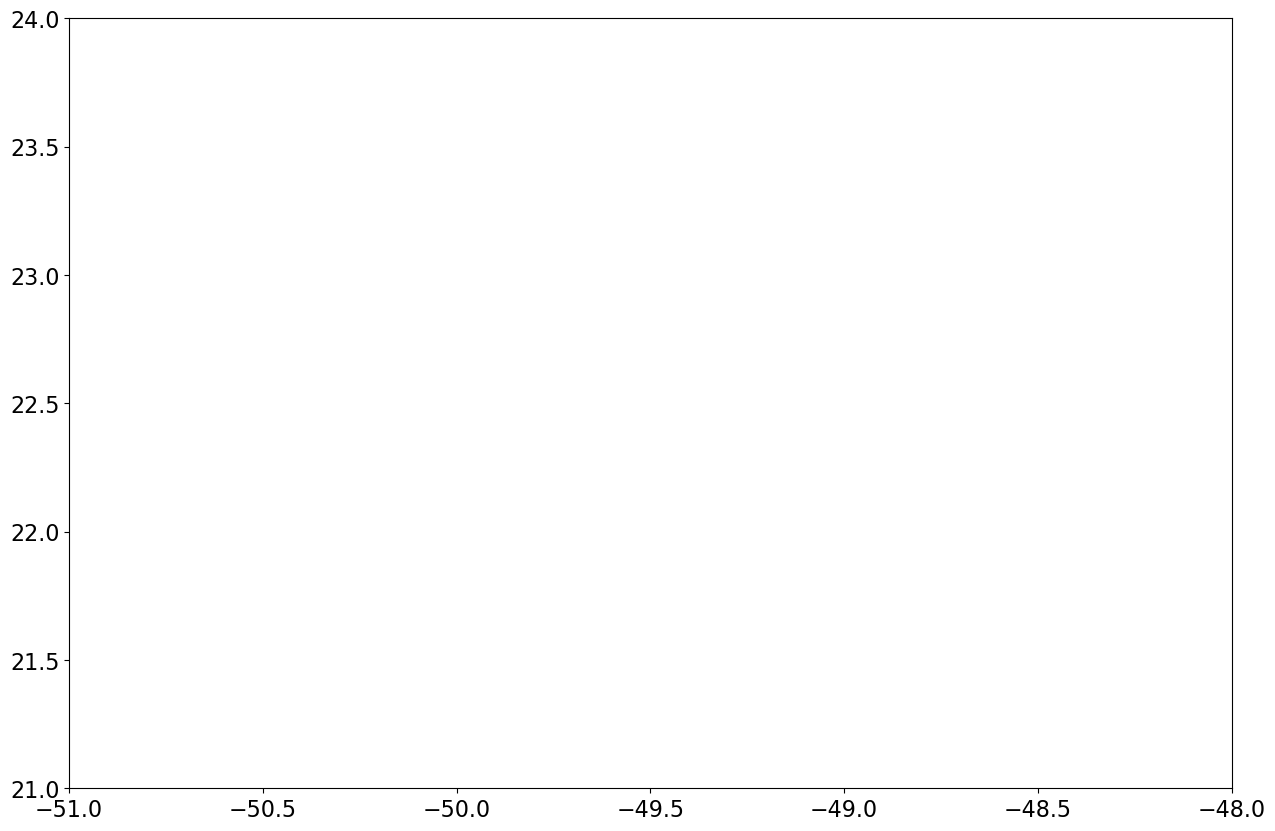

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T095747Z_20241010T131238Z_02092C/ECA_EXAA_ACM_CAP_2B_20241010T095747Z_20241010T131238Z_02092C.h5


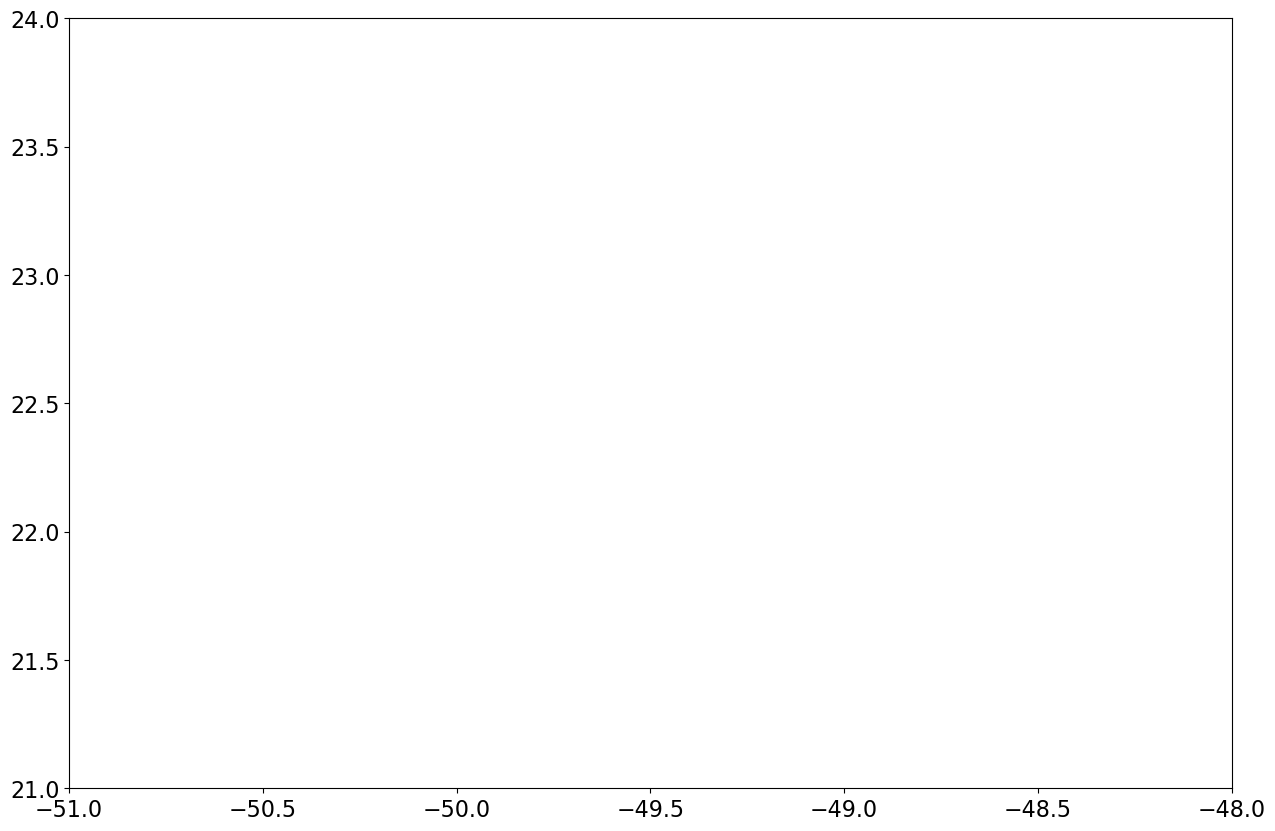

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T100851Z_20241010T131438Z_02092D/ECA_EXAA_ACM_CAP_2B_20241010T100851Z_20241010T131438Z_02092D.h5


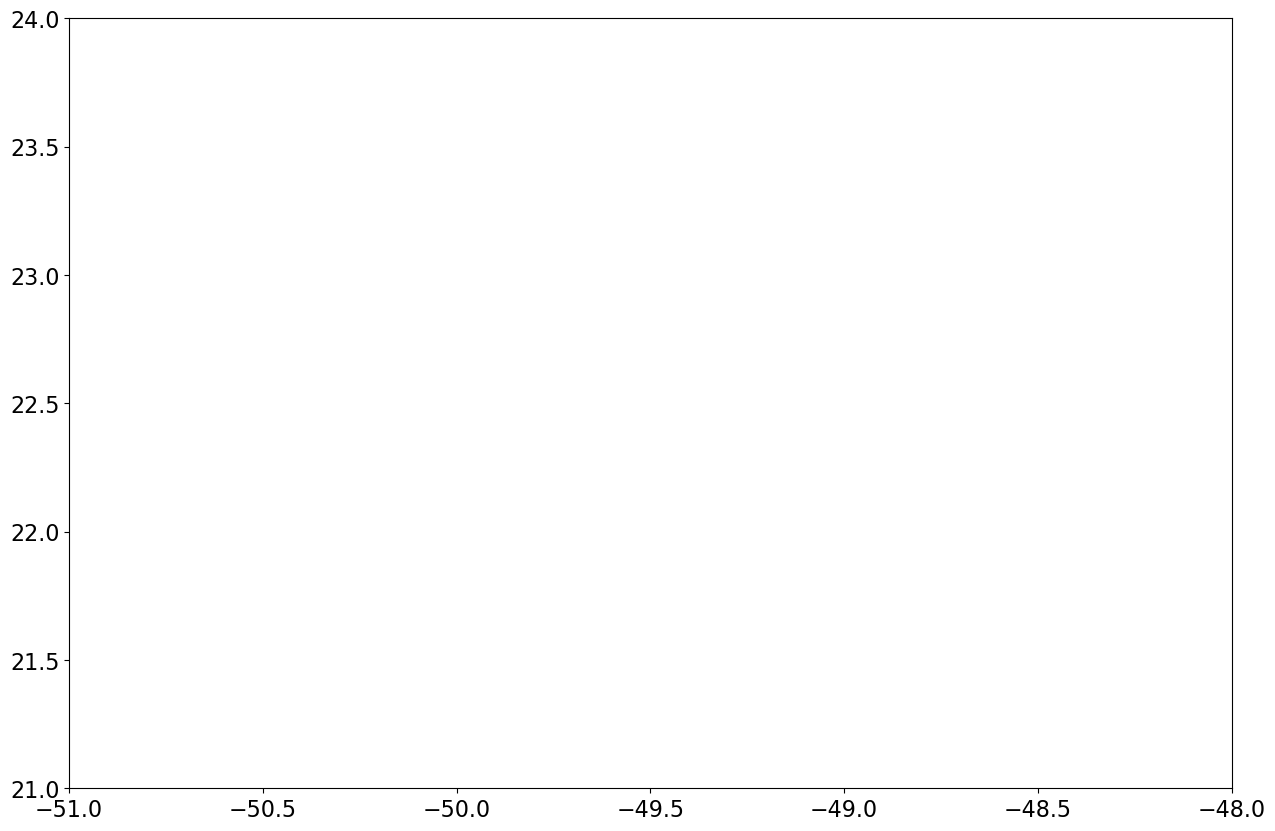

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T102038Z_20241010T131638Z_02092E/ECA_EXAA_ACM_CAP_2B_20241010T102038Z_20241010T131638Z_02092E.h5


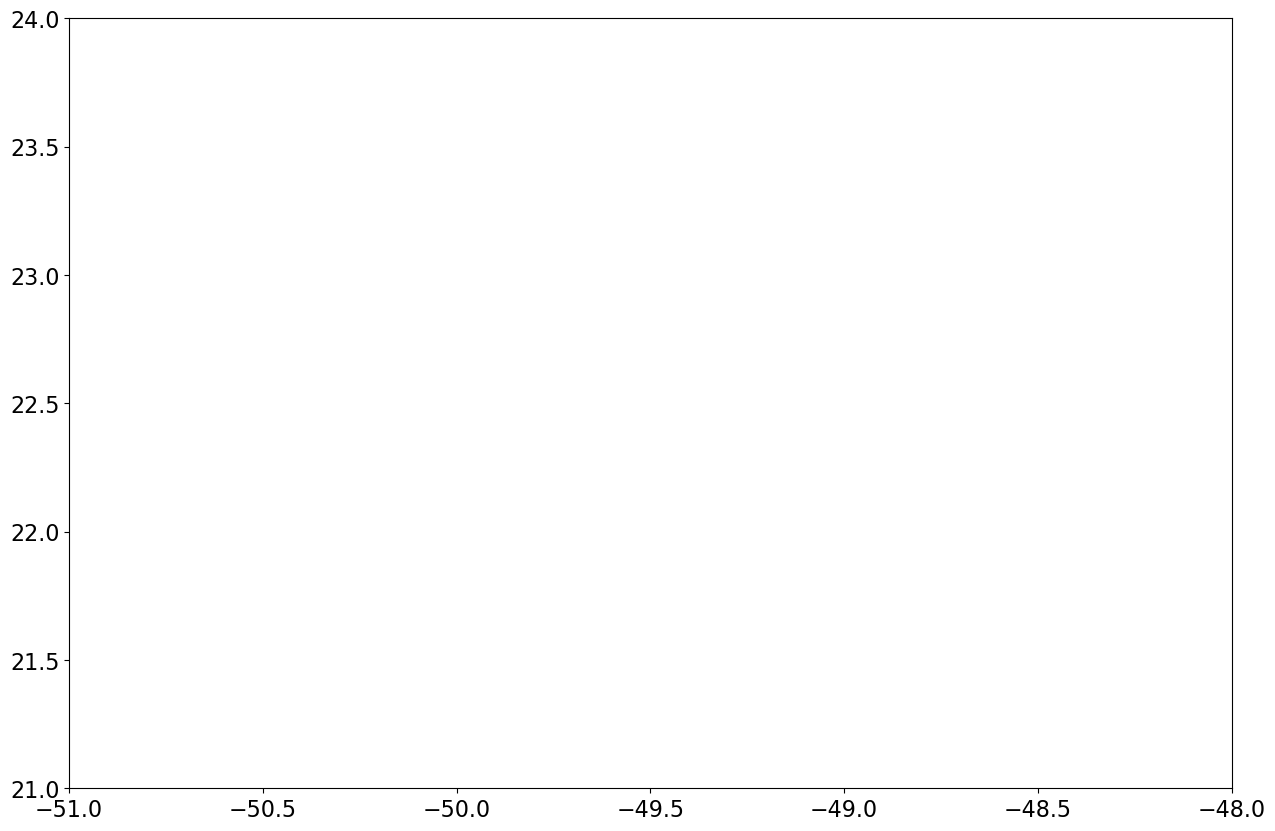

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T103213Z_20241010T131338Z_02092F/ECA_EXAA_ACM_CAP_2B_20241010T103213Z_20241010T131338Z_02092F.h5


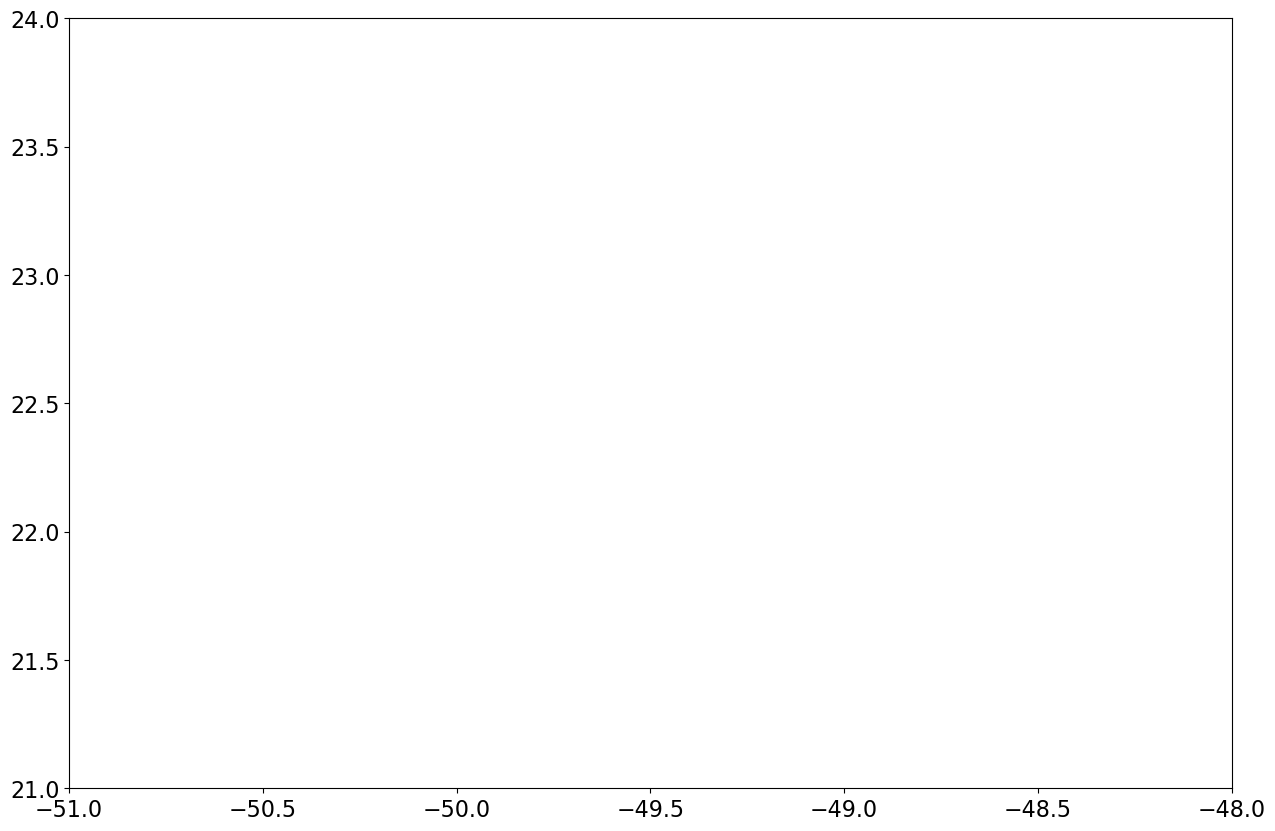

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T104402Z_20241010T131438Z_02092G/ECA_EXAA_ACM_CAP_2B_20241010T104402Z_20241010T131438Z_02092G.h5


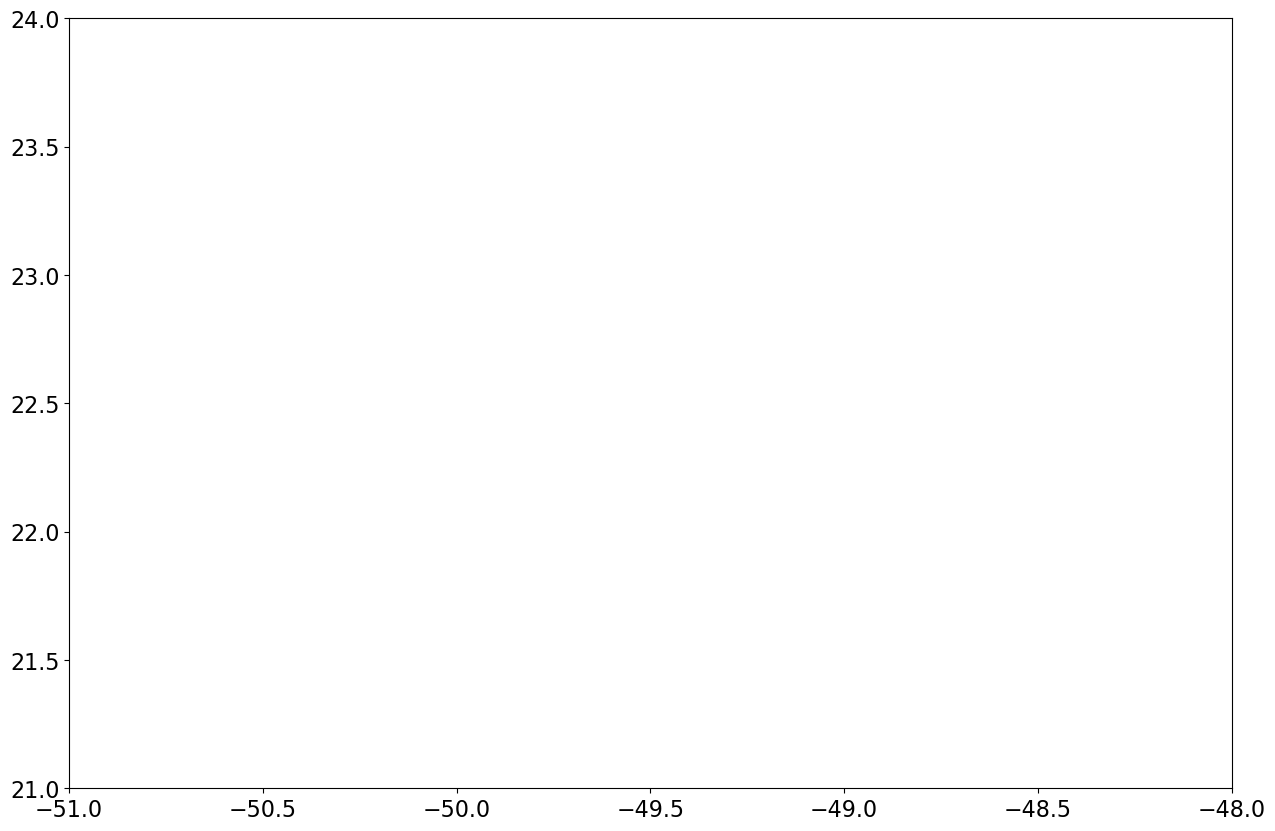

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T105510Z_20241010T131438Z_02092H/ECA_EXAA_ACM_CAP_2B_20241010T105510Z_20241010T131438Z_02092H.h5


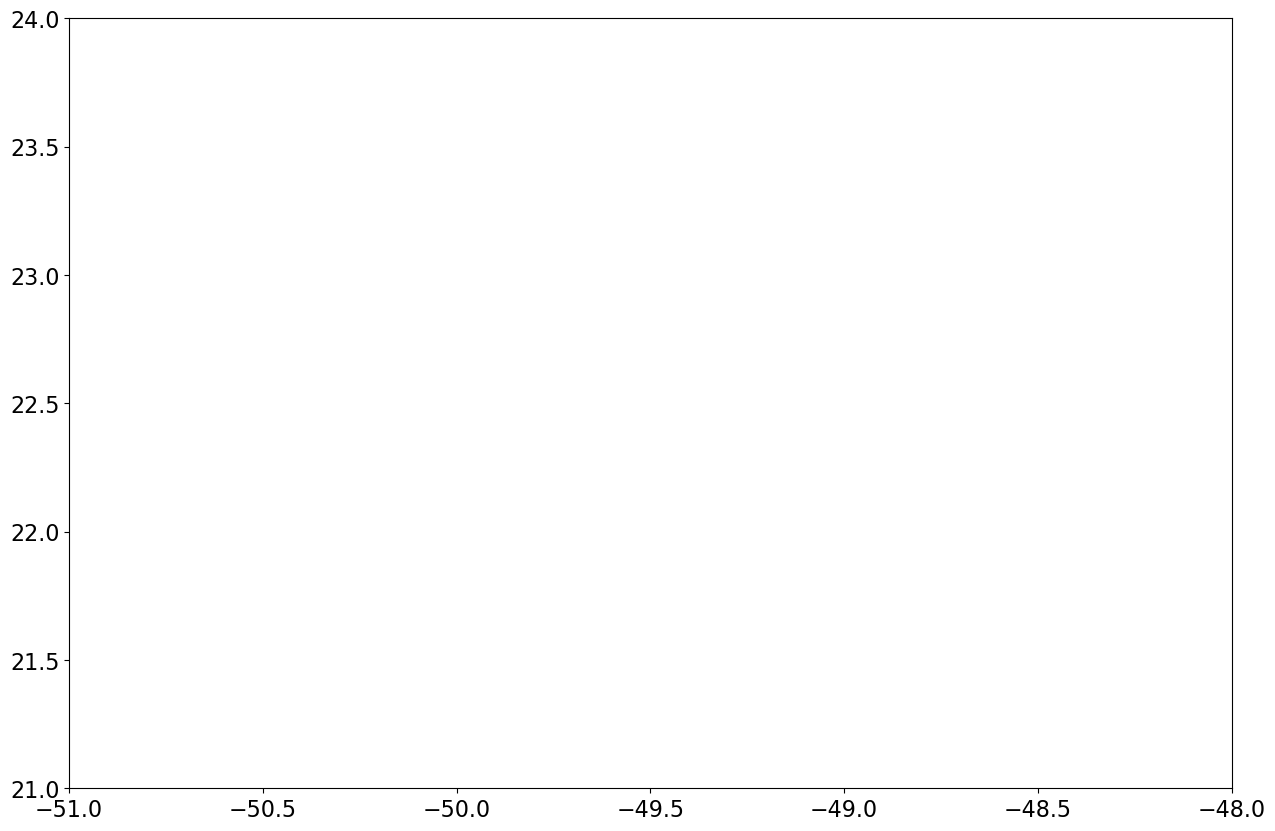

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T110659Z_20241010T131538Z_02093A/ECA_EXAA_ACM_CAP_2B_20241010T110659Z_20241010T131538Z_02093A.h5


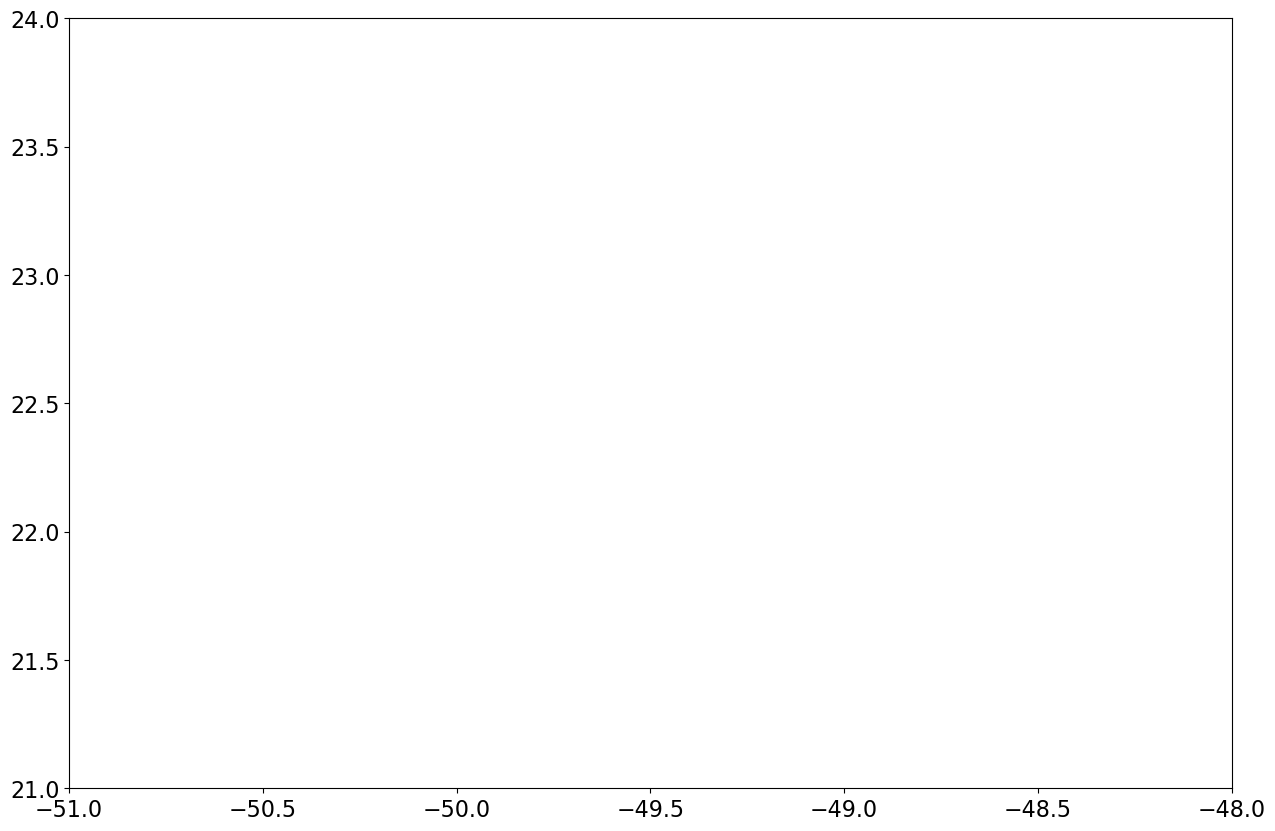

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T111834Z_20241010T133943Z_02093B/ECA_EXAA_ACM_CAP_2B_20241010T111834Z_20241010T133943Z_02093B.h5


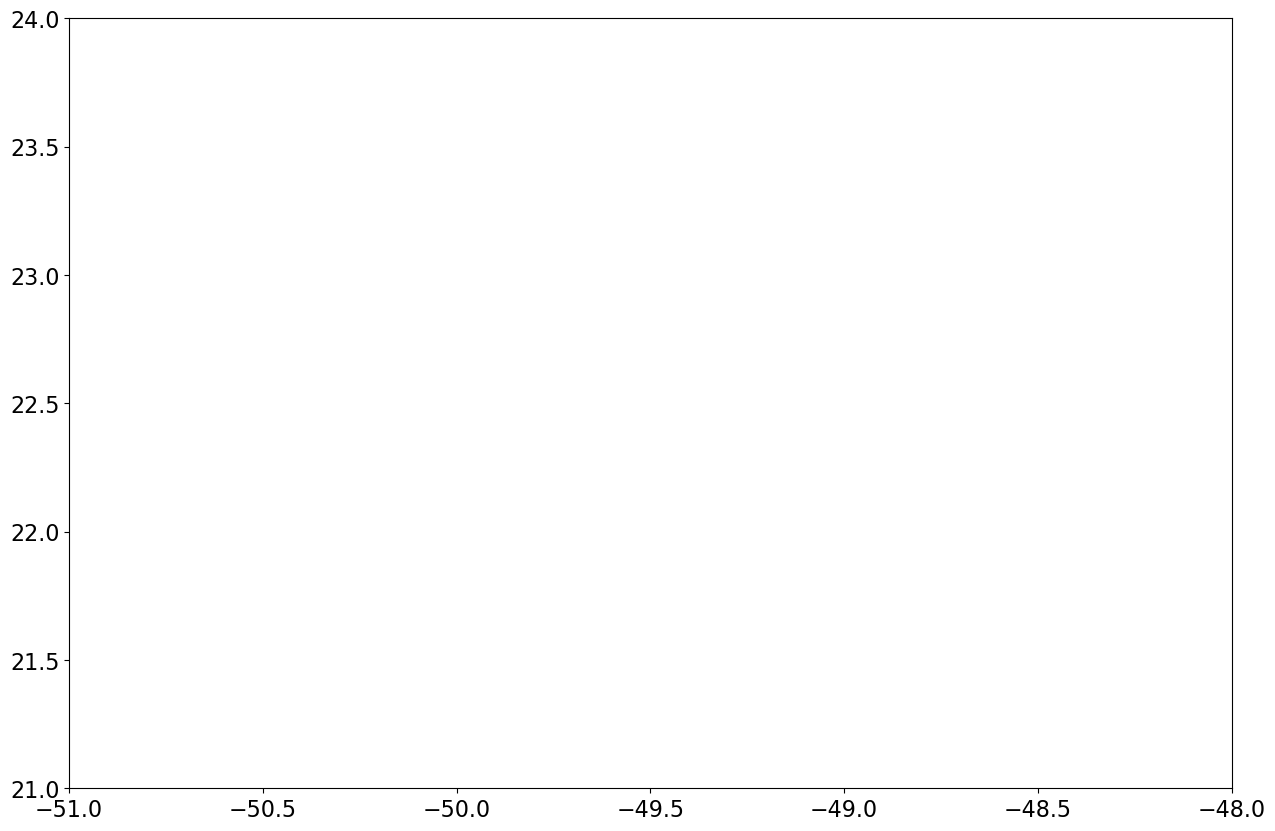

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T113020Z_20241010T134645Z_02093C/ECA_EXAA_ACM_CAP_2B_20241010T113020Z_20241010T134645Z_02093C.h5


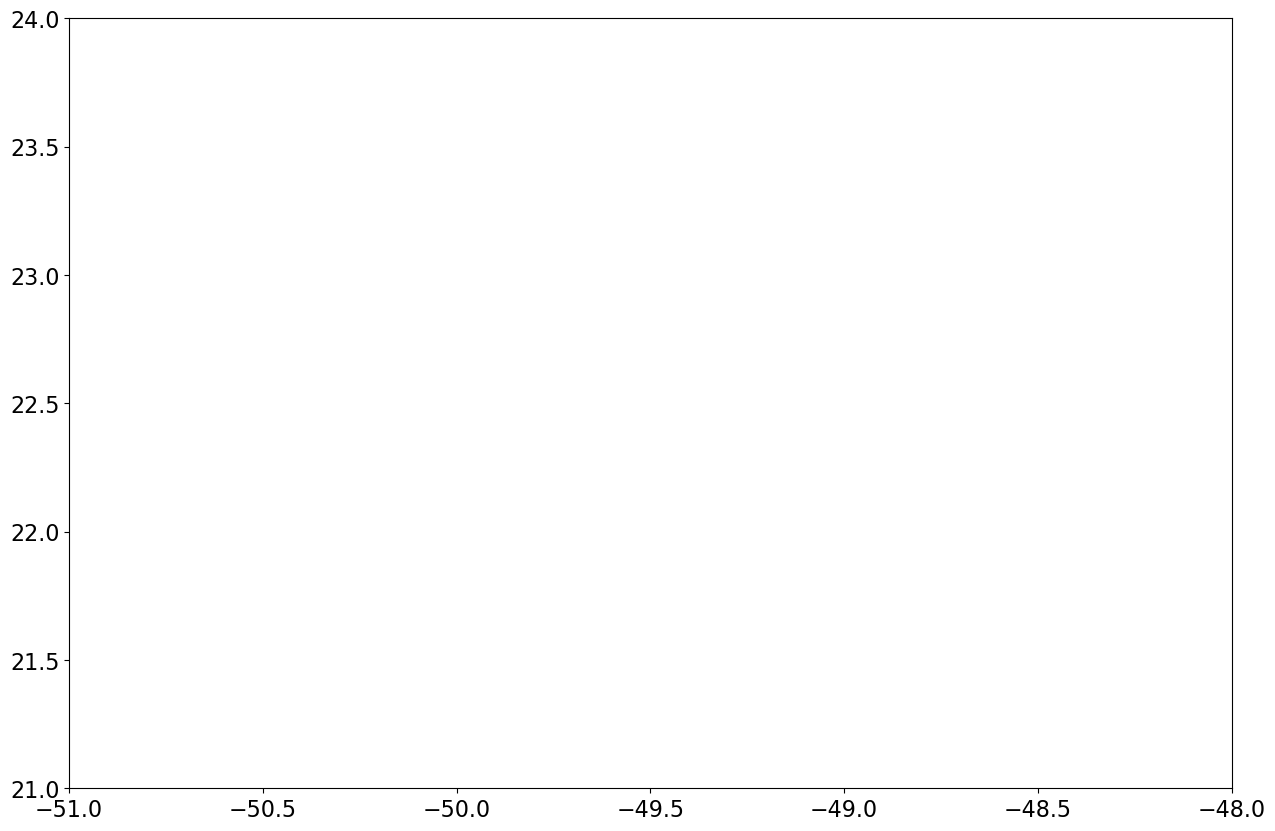

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T114124Z_20241010T134445Z_02093D/ECA_EXAA_ACM_CAP_2B_20241010T114124Z_20241010T134445Z_02093D.h5


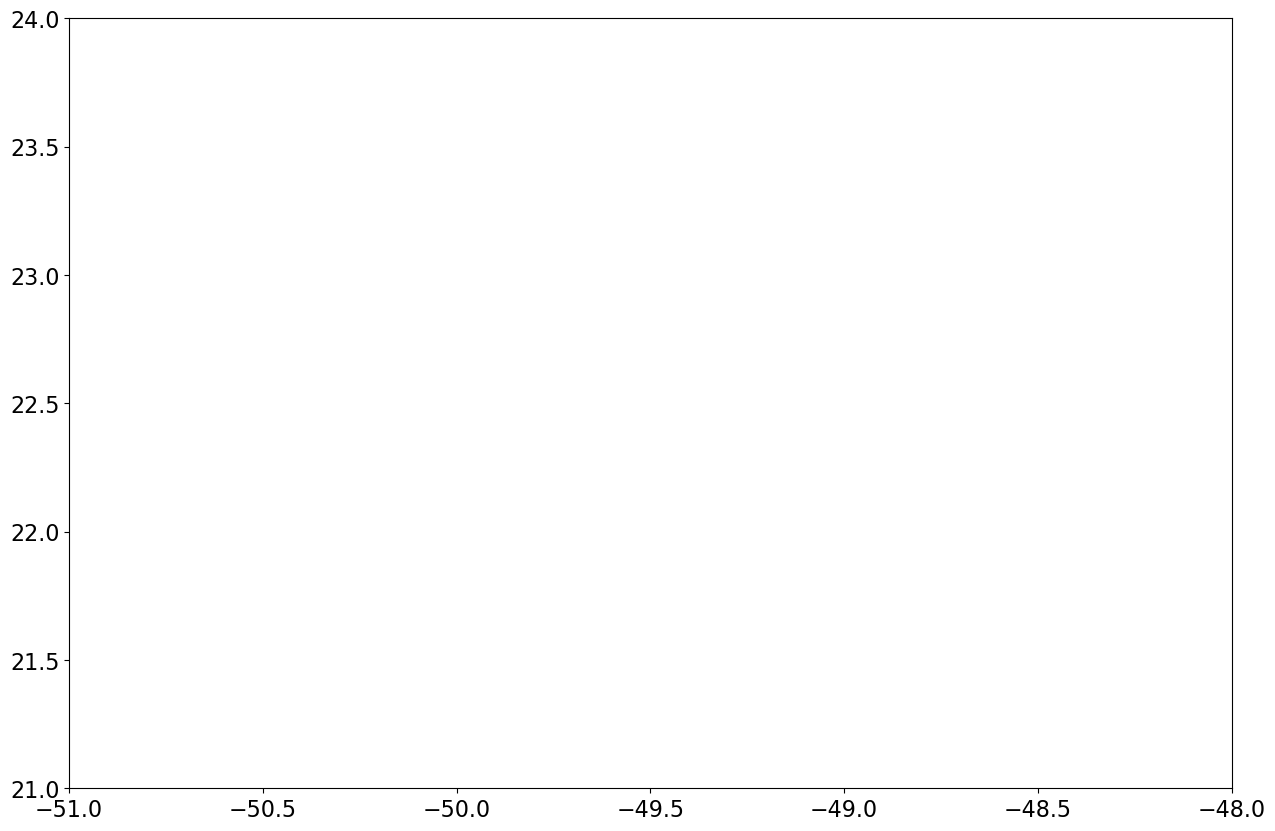

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T115311Z_20241010T134845Z_02093E/ECA_EXAA_ACM_CAP_2B_20241010T115311Z_20241010T134845Z_02093E.h5


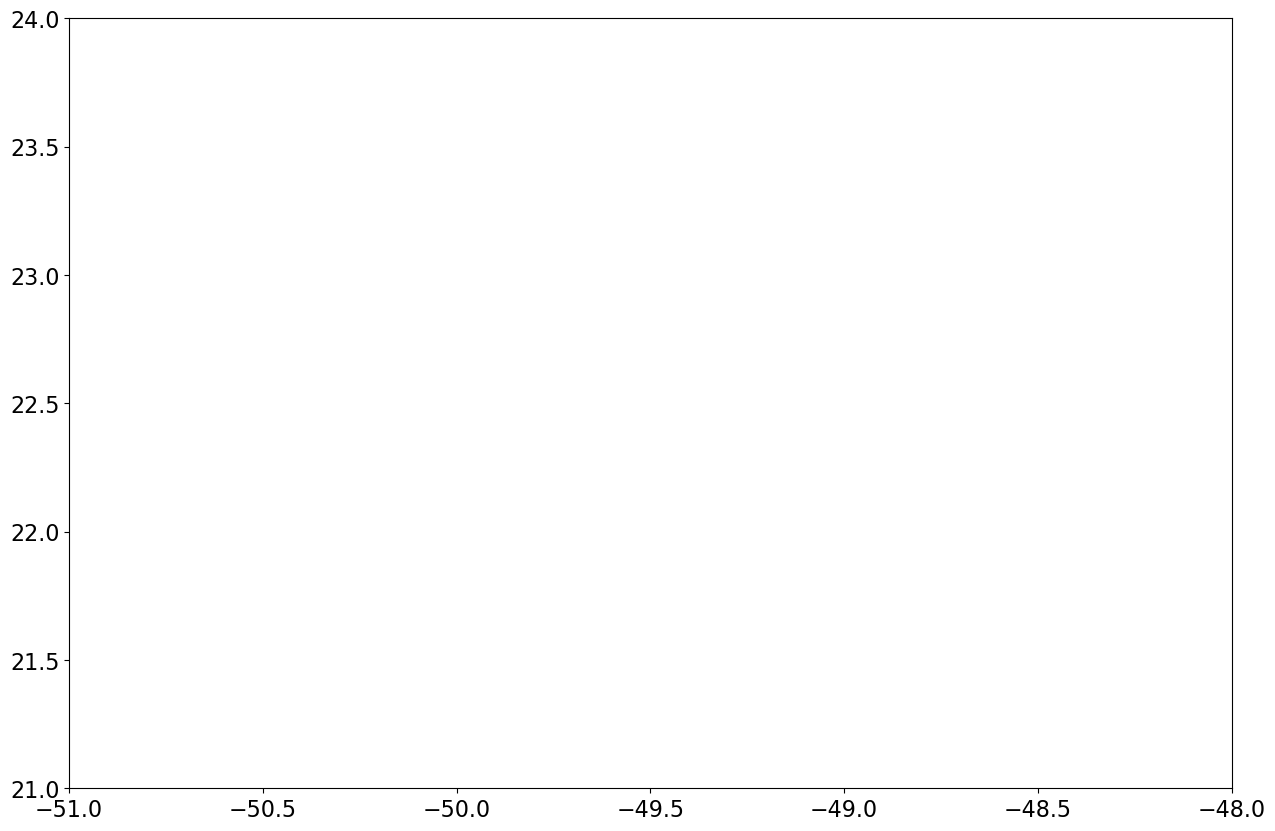

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T120446Z_20241010T134403Z_02093F/ECA_EXAA_ACM_CAP_2B_20241010T120446Z_20241010T134403Z_02093F.h5


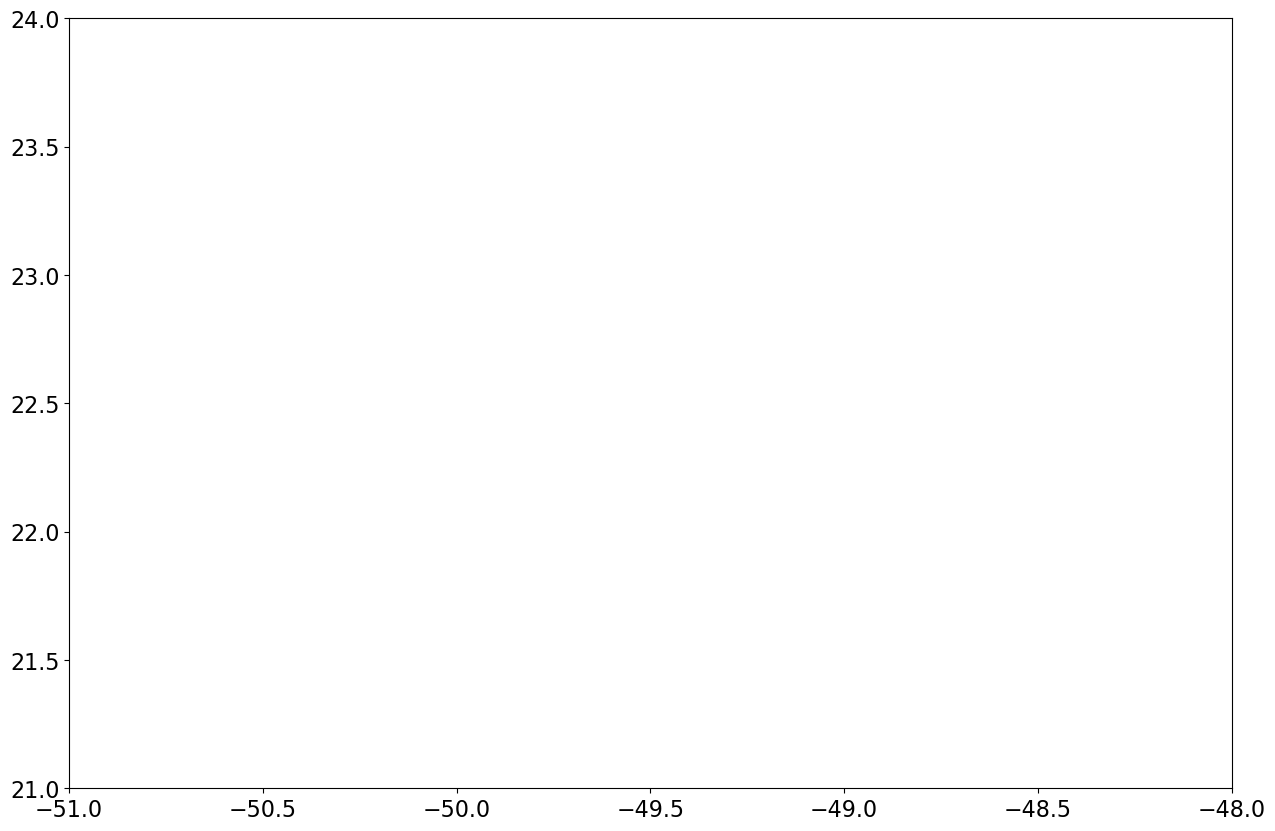

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T121635Z_20241010T134407Z_02093G/ECA_EXAA_ACM_CAP_2B_20241010T121635Z_20241010T134407Z_02093G.h5


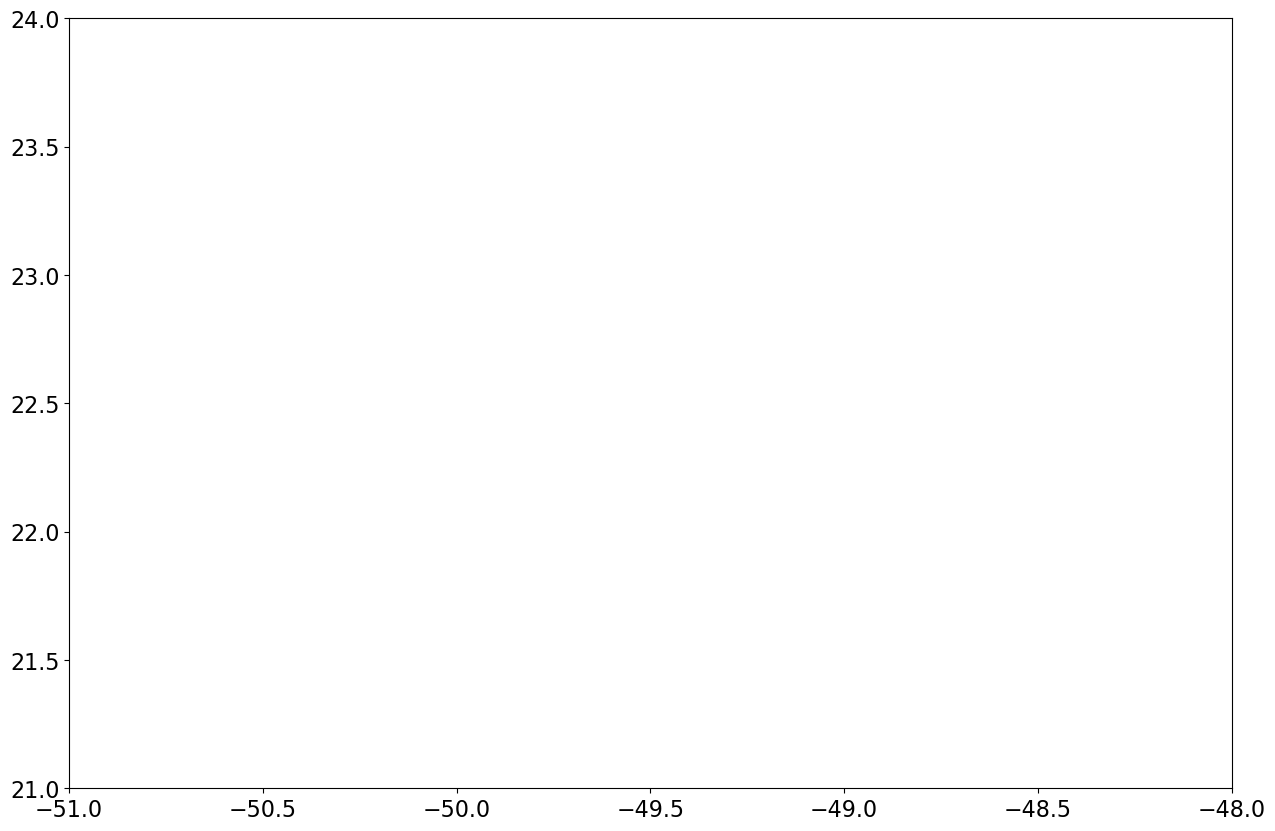

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T122743Z_20241010T134944Z_02093H/ECA_EXAA_ACM_CAP_2B_20241010T122743Z_20241010T134944Z_02093H.h5


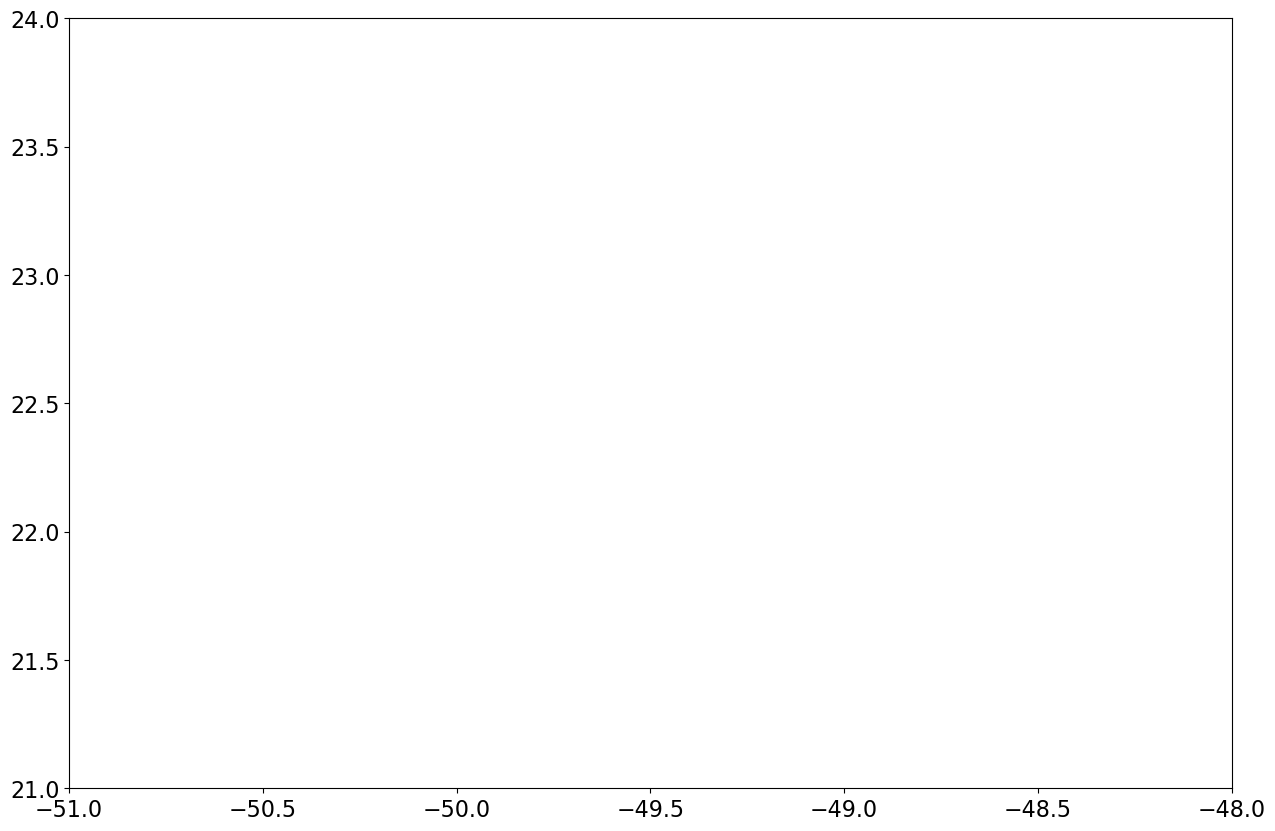

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T123931Z_20241010T134846Z_02094A/ECA_EXAA_ACM_CAP_2B_20241010T123931Z_20241010T134846Z_02094A.h5


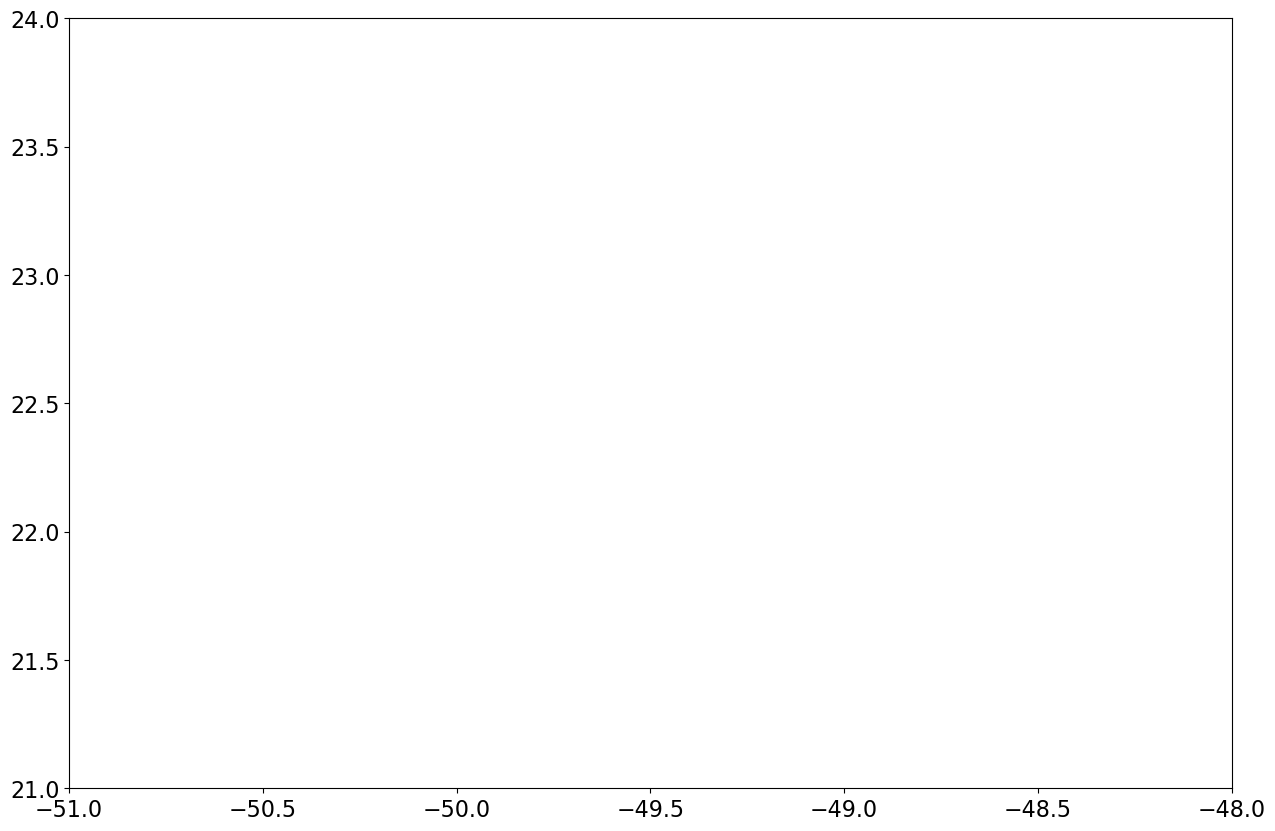

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T125107Z_20241010T134645Z_02094B/ECA_EXAA_ACM_CAP_2B_20241010T125107Z_20241010T134645Z_02094B.h5


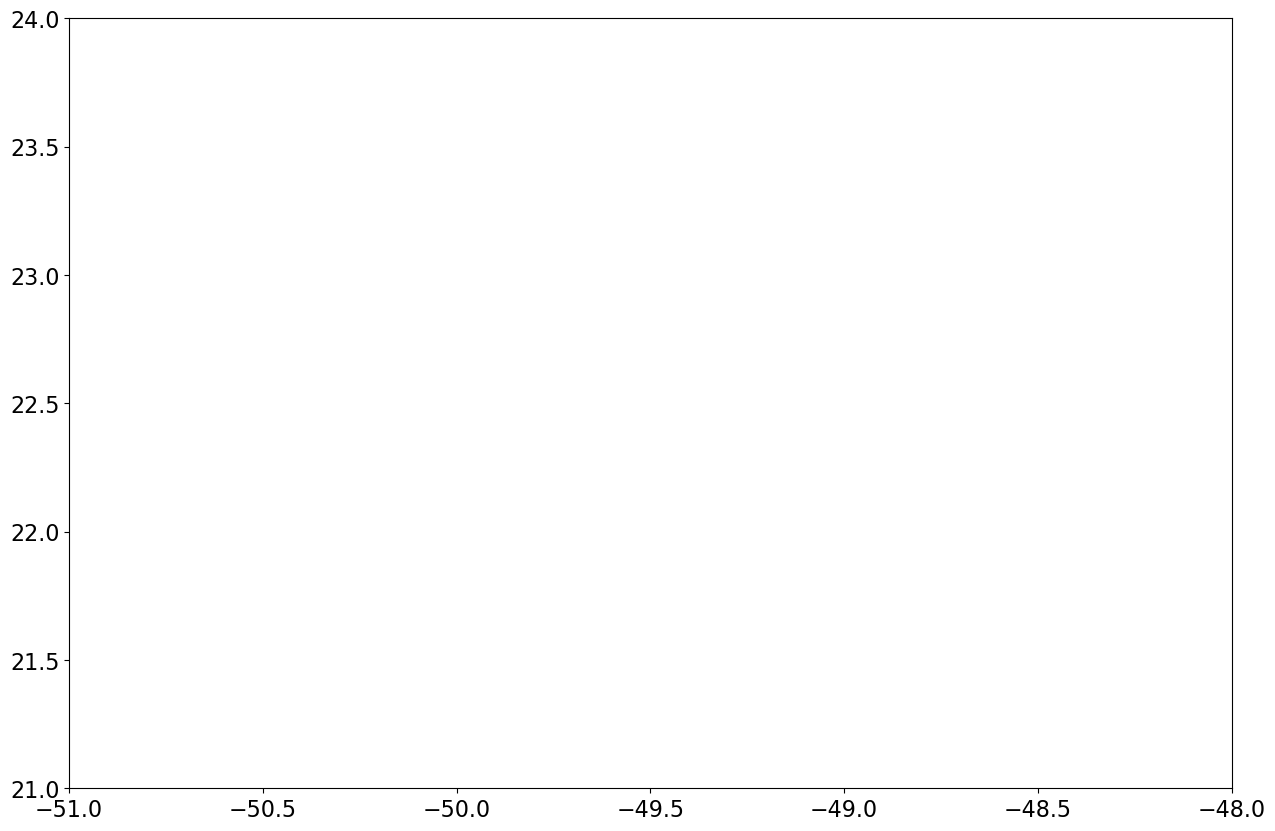

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T130253Z_20241010T150753Z_02094C/ECA_EXAA_ACM_CAP_2B_20241010T130253Z_20241010T150753Z_02094C.h5


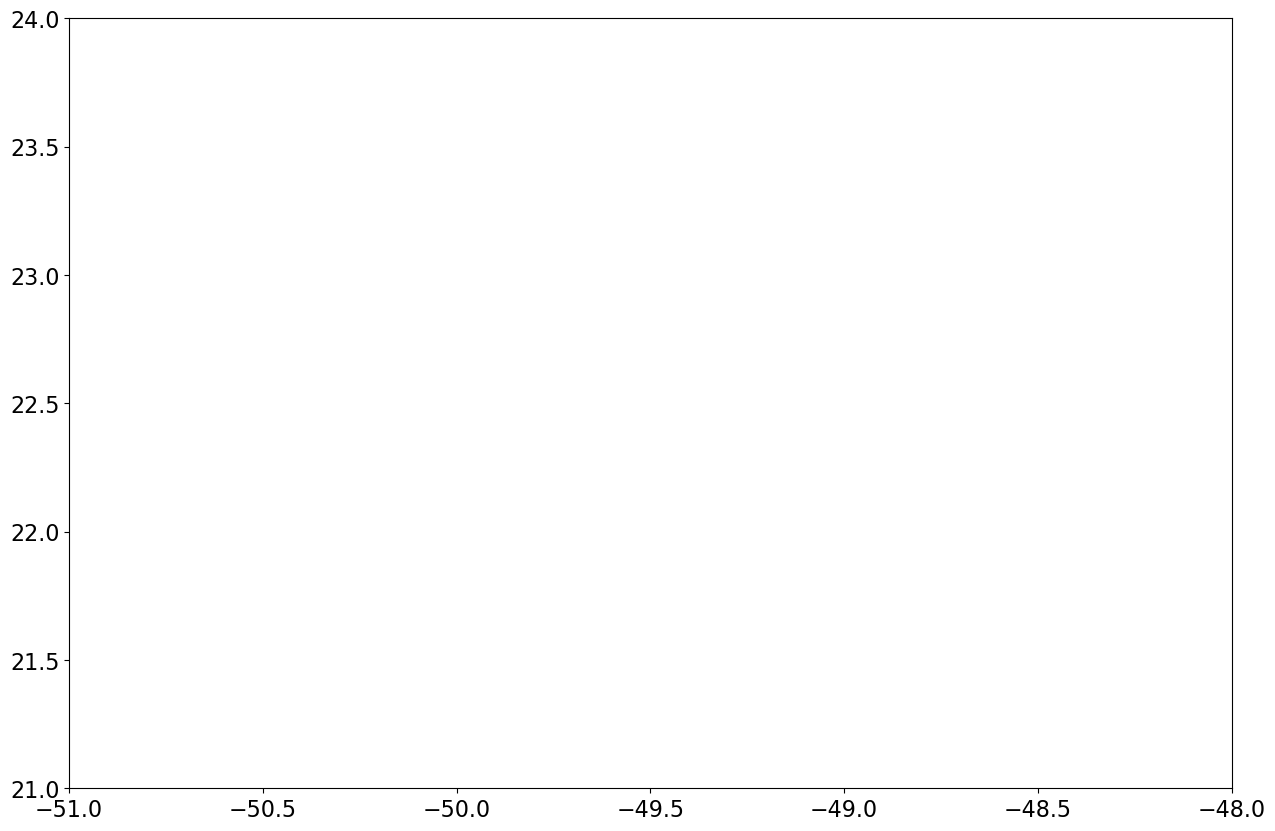

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T131357Z_20241010T151251Z_02094D/ECA_EXAA_ACM_CAP_2B_20241010T131357Z_20241010T151251Z_02094D.h5


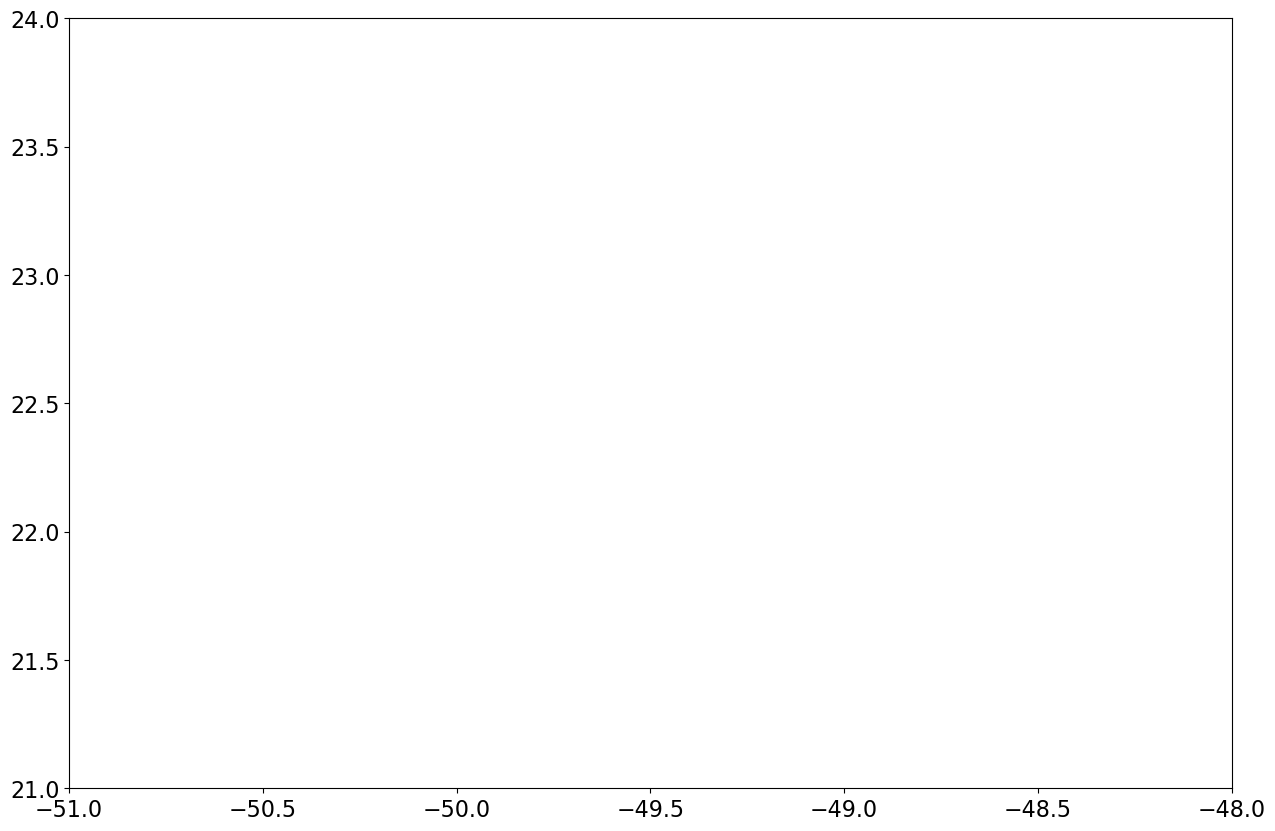

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T132543Z_20241010T151353Z_02094E/ECA_EXAA_ACM_CAP_2B_20241010T132543Z_20241010T151353Z_02094E.h5


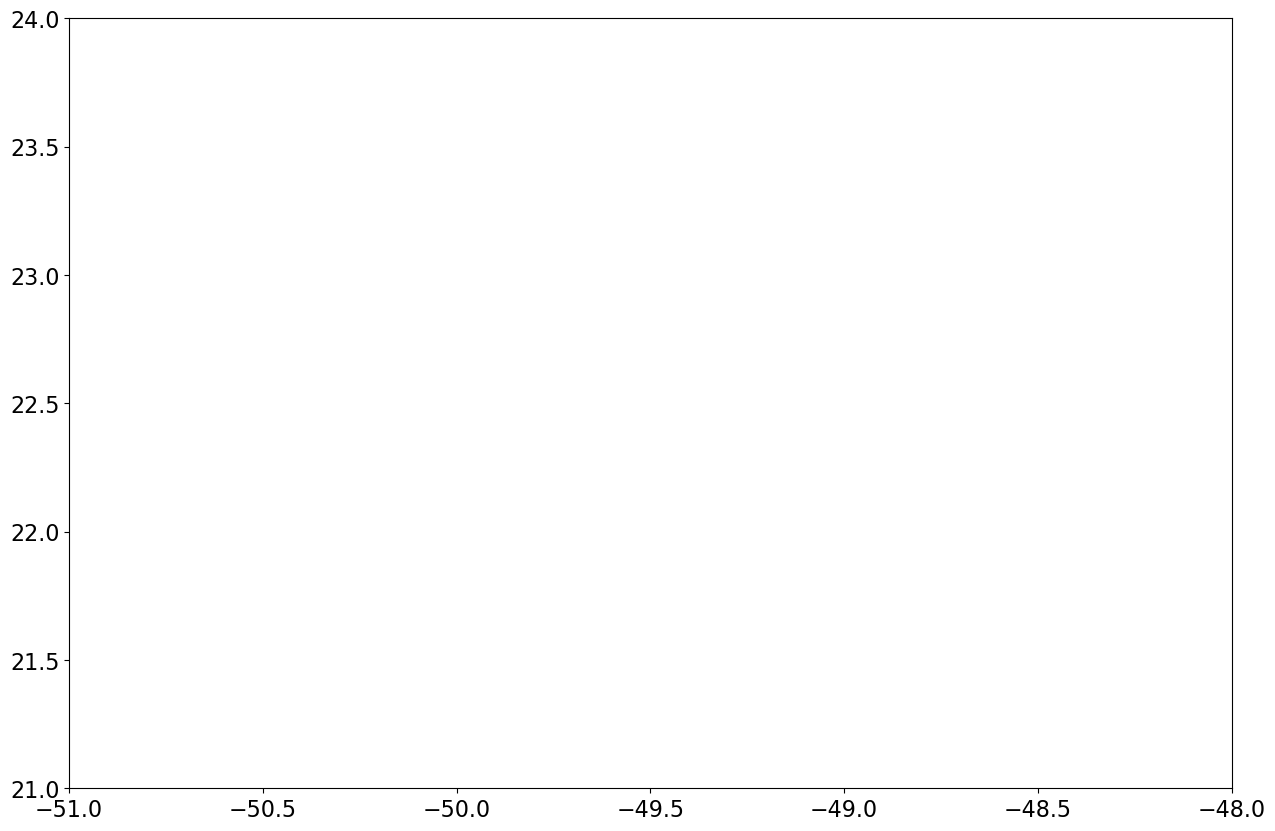

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T133719Z_20241010T151253Z_02094F/ECA_EXAA_ACM_CAP_2B_20241010T133719Z_20241010T151253Z_02094F.h5


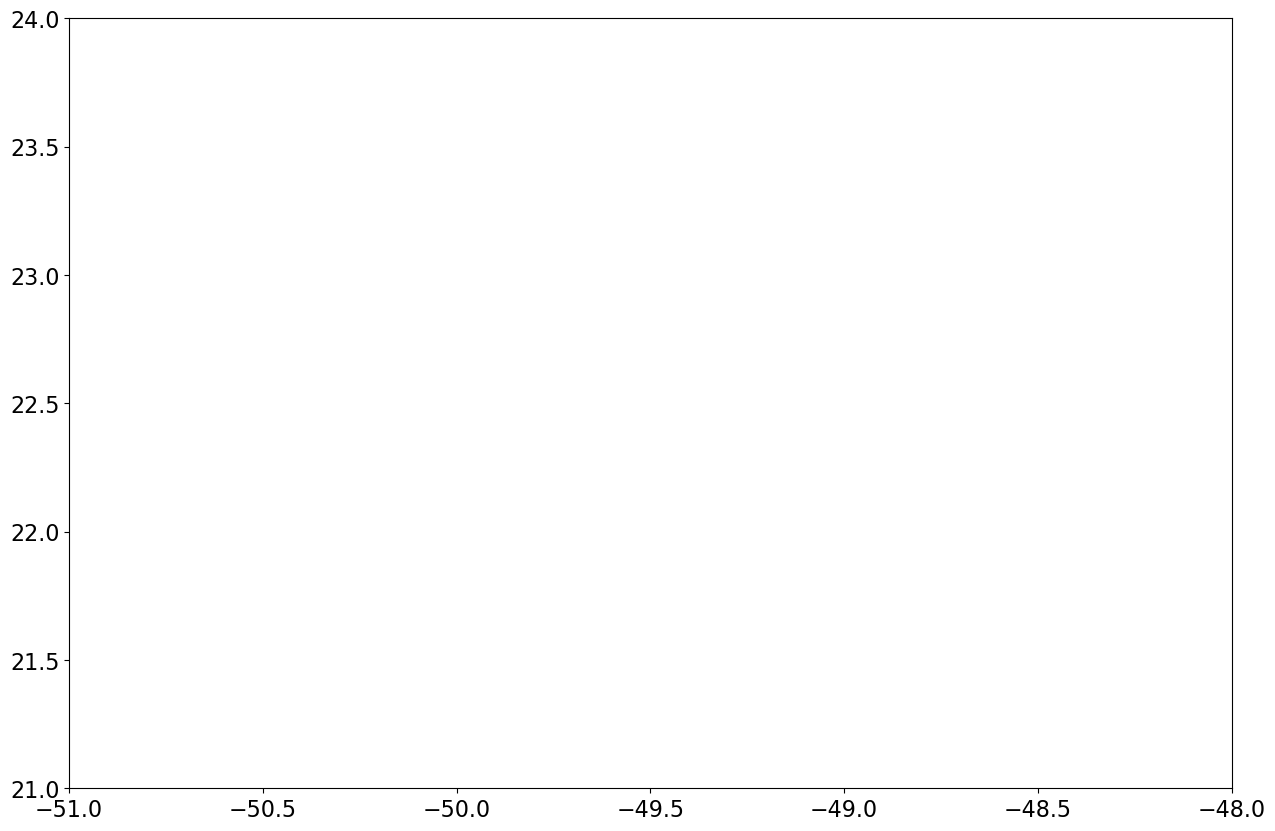

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T134908Z_20241010T151151Z_02094G/ECA_EXAA_ACM_CAP_2B_20241010T134908Z_20241010T151151Z_02094G.h5


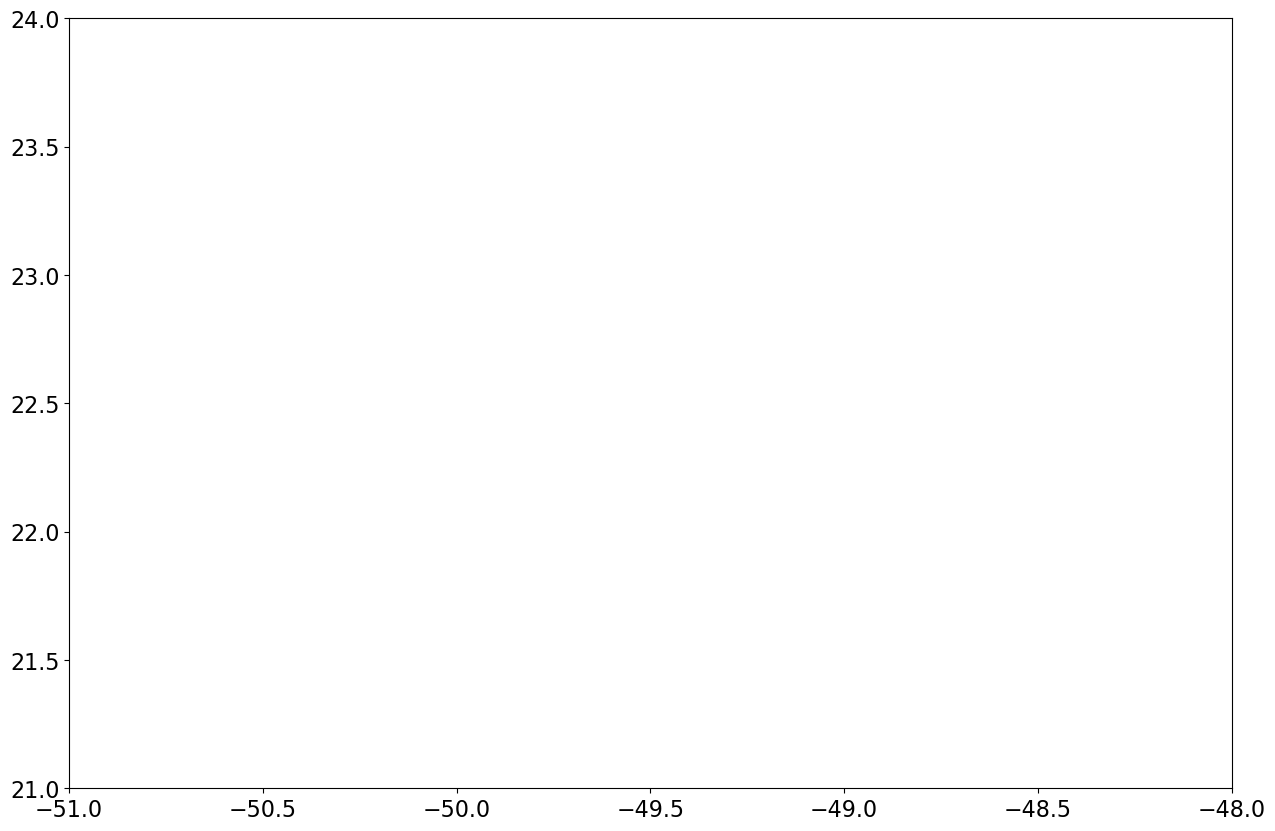

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T140015Z_20241010T151251Z_02094H/ECA_EXAA_ACM_CAP_2B_20241010T140015Z_20241010T151251Z_02094H.h5


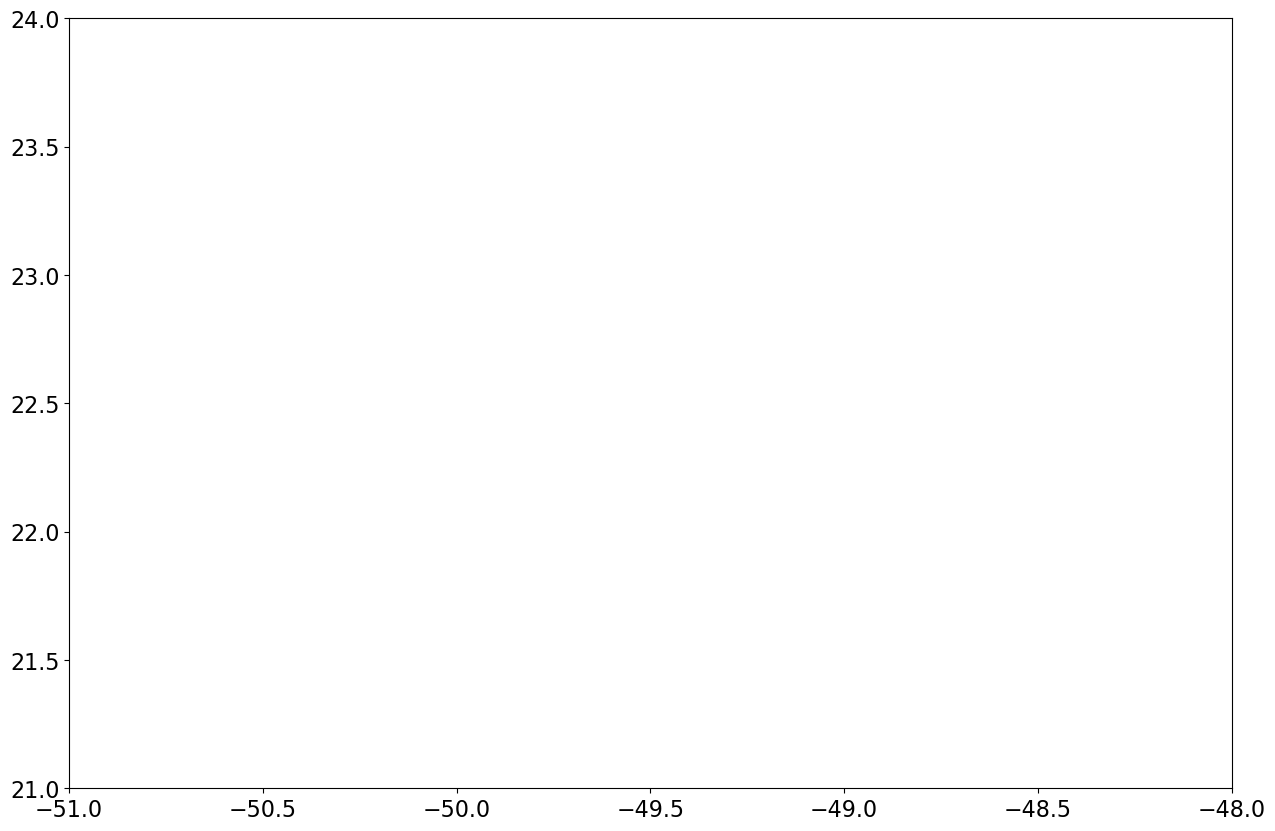

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T141204Z_20241010T151353Z_02095A/ECA_EXAA_ACM_CAP_2B_20241010T141204Z_20241010T151353Z_02095A.h5


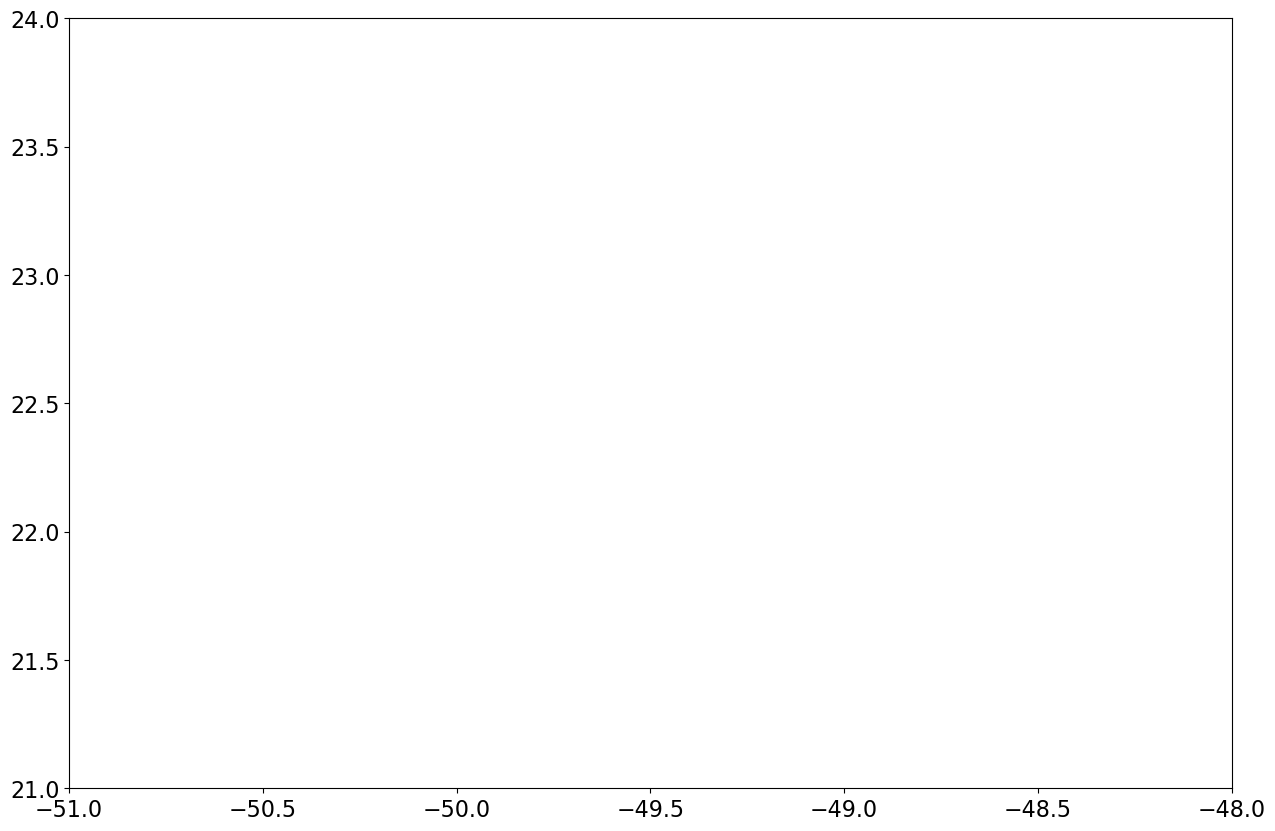

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T142339Z_20241010T151251Z_02095B/ECA_EXAA_ACM_CAP_2B_20241010T142339Z_20241010T151251Z_02095B.h5


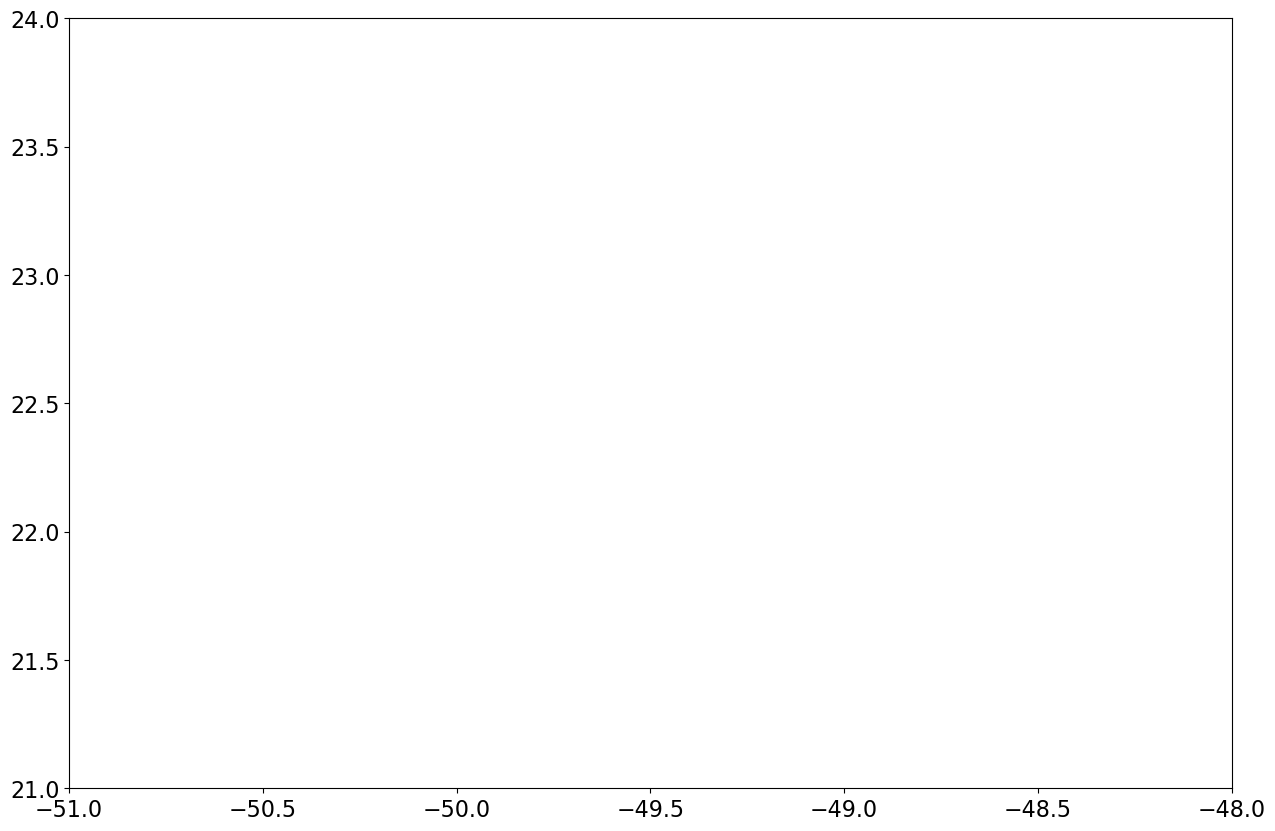

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T174031Z_20241010T230109Z_02097C/ECA_EXAA_ACM_CAP_2B_20241010T174031Z_20241010T230109Z_02097C.h5


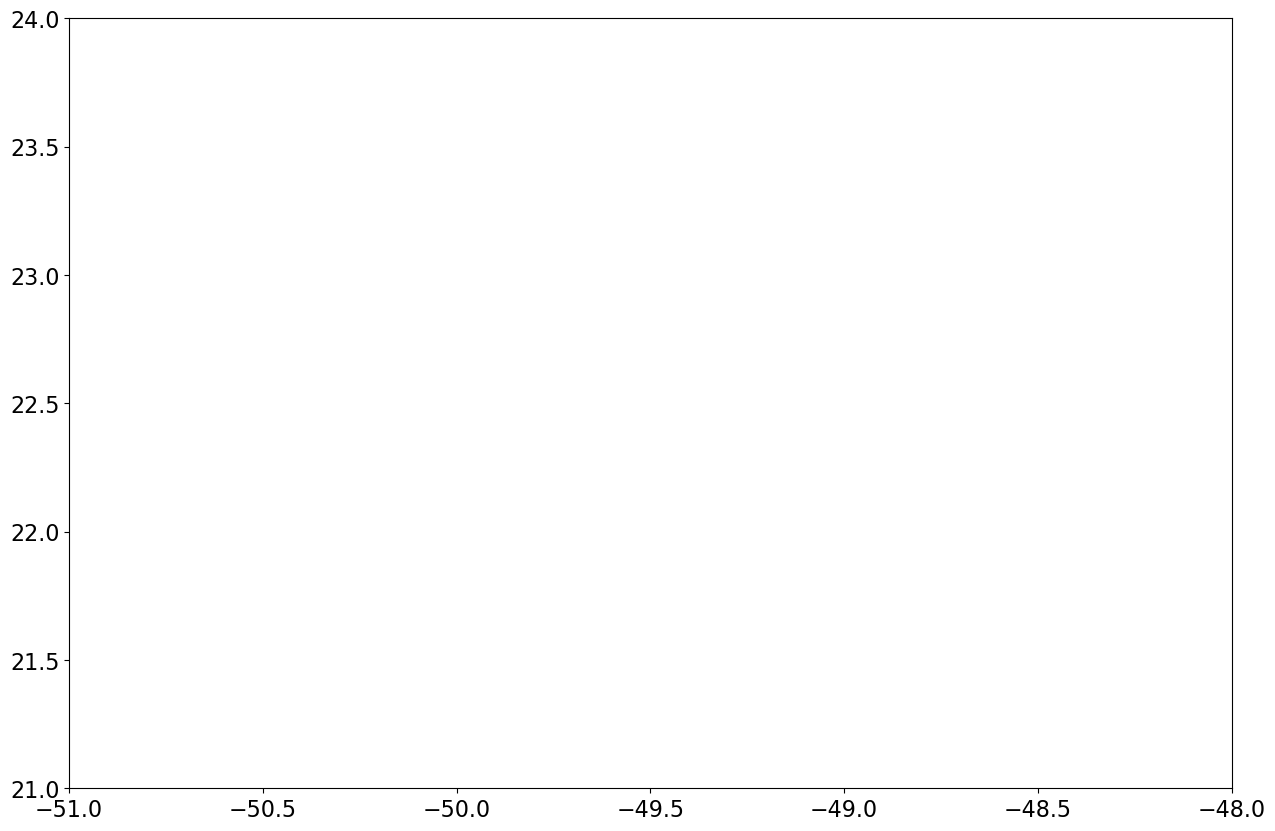

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T175135Z_20241010T225809Z_02097D/ECA_EXAA_ACM_CAP_2B_20241010T175135Z_20241010T225809Z_02097D.h5


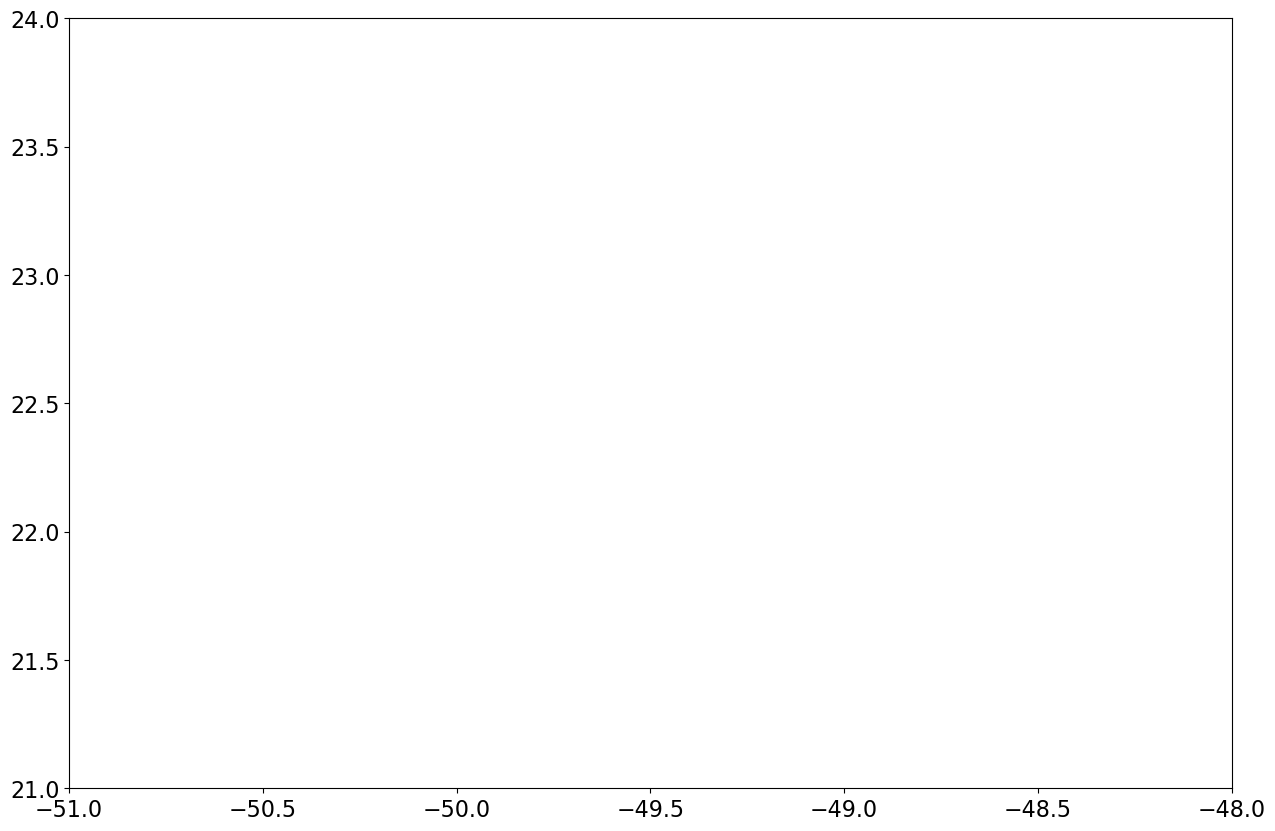

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T182646Z_20241010T225809Z_02097G/ECA_EXAA_ACM_CAP_2B_20241010T182646Z_20241010T225809Z_02097G.h5


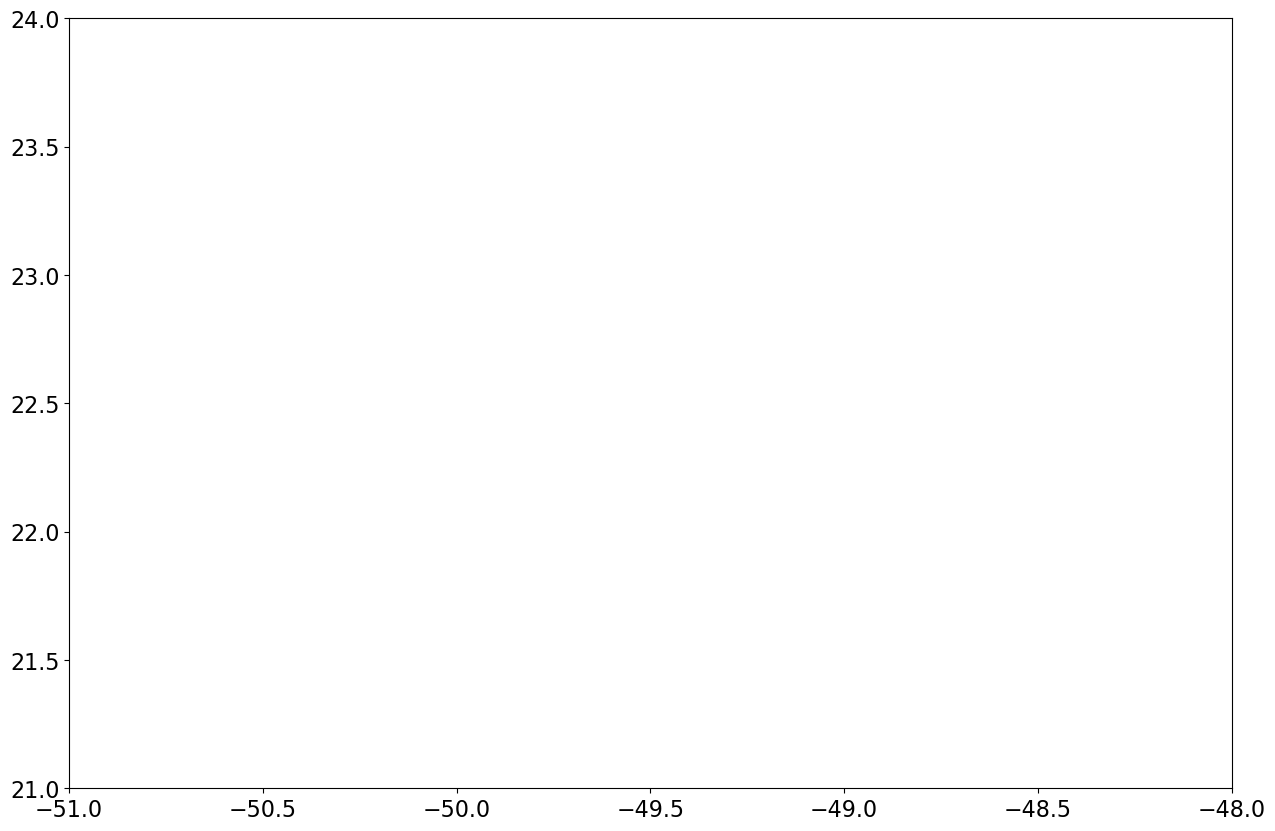

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T183753Z_20241010T230009Z_02097H/ECA_EXAA_ACM_CAP_2B_20241010T183753Z_20241010T230009Z_02097H.h5


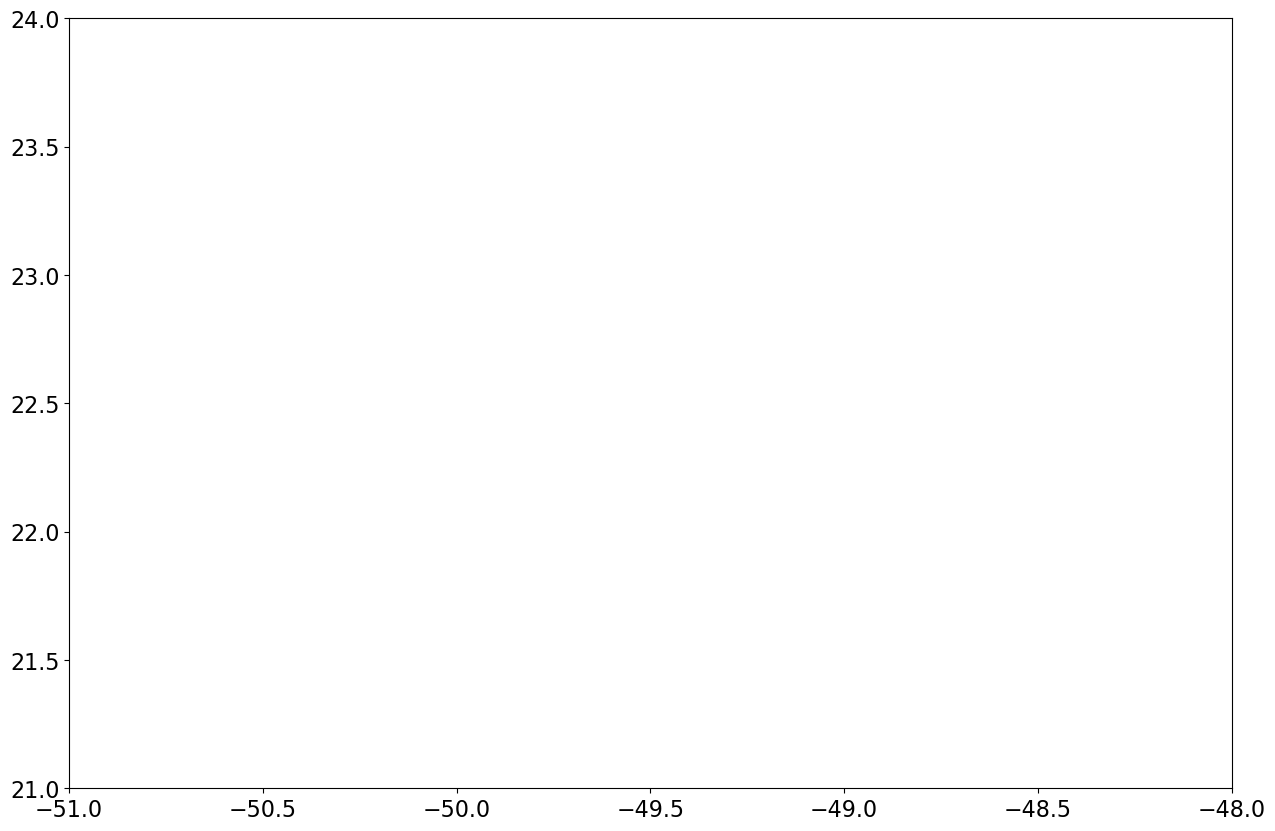

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T191304Z_20241010T230009Z_02098C/ECA_EXAA_ACM_CAP_2B_20241010T191304Z_20241010T230009Z_02098C.h5


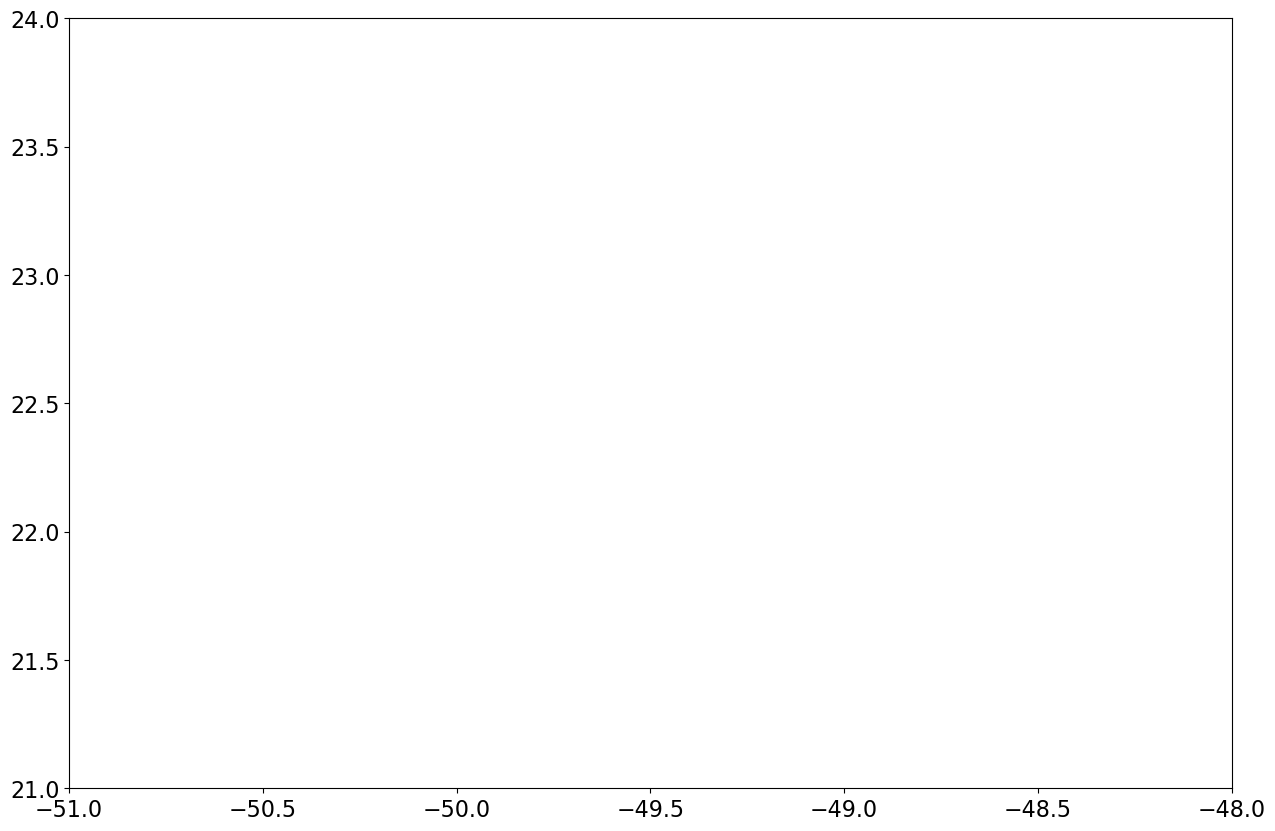

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T192408Z_20241010T225609Z_02098D/ECA_EXAA_ACM_CAP_2B_20241010T192408Z_20241010T225609Z_02098D.h5


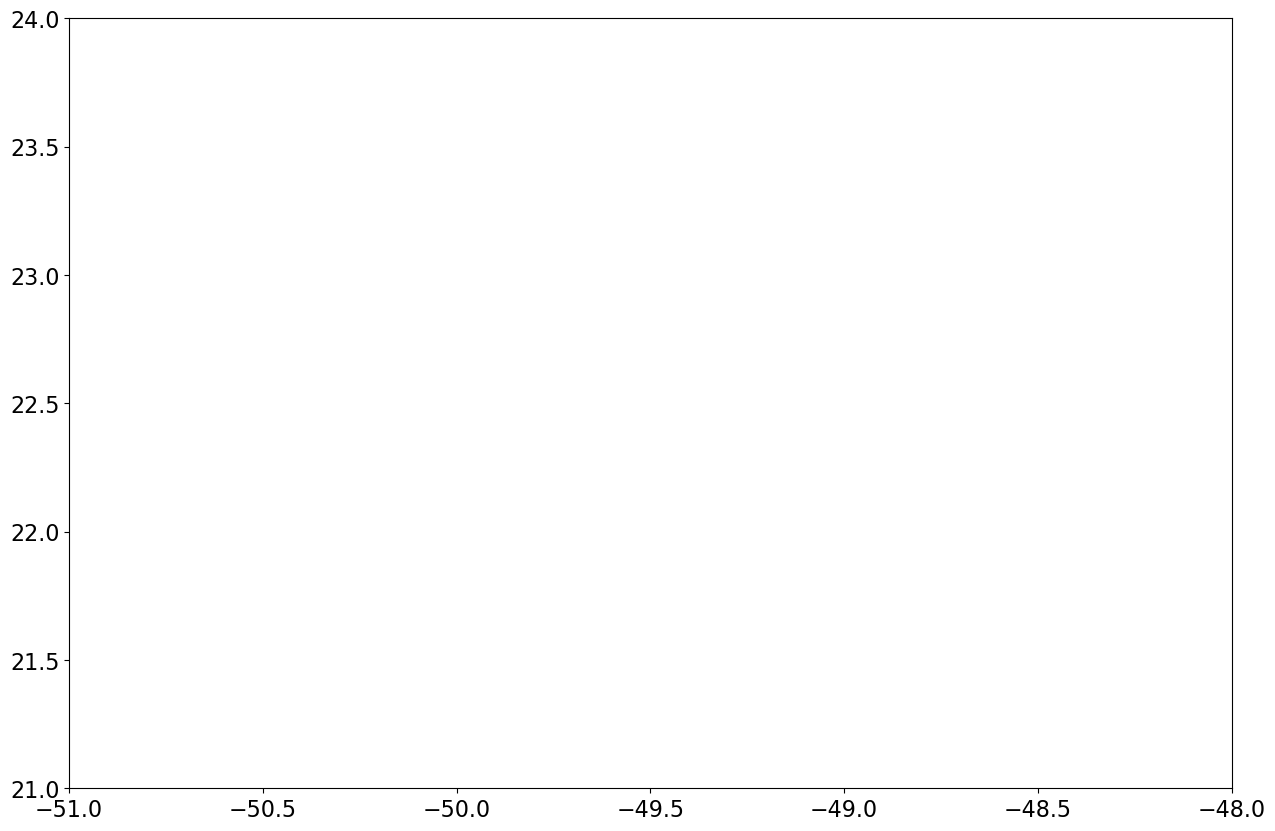

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T194730Z_20241010T230209Z_02098F/ECA_EXAA_ACM_CAP_2B_20241010T194730Z_20241010T230209Z_02098F.h5


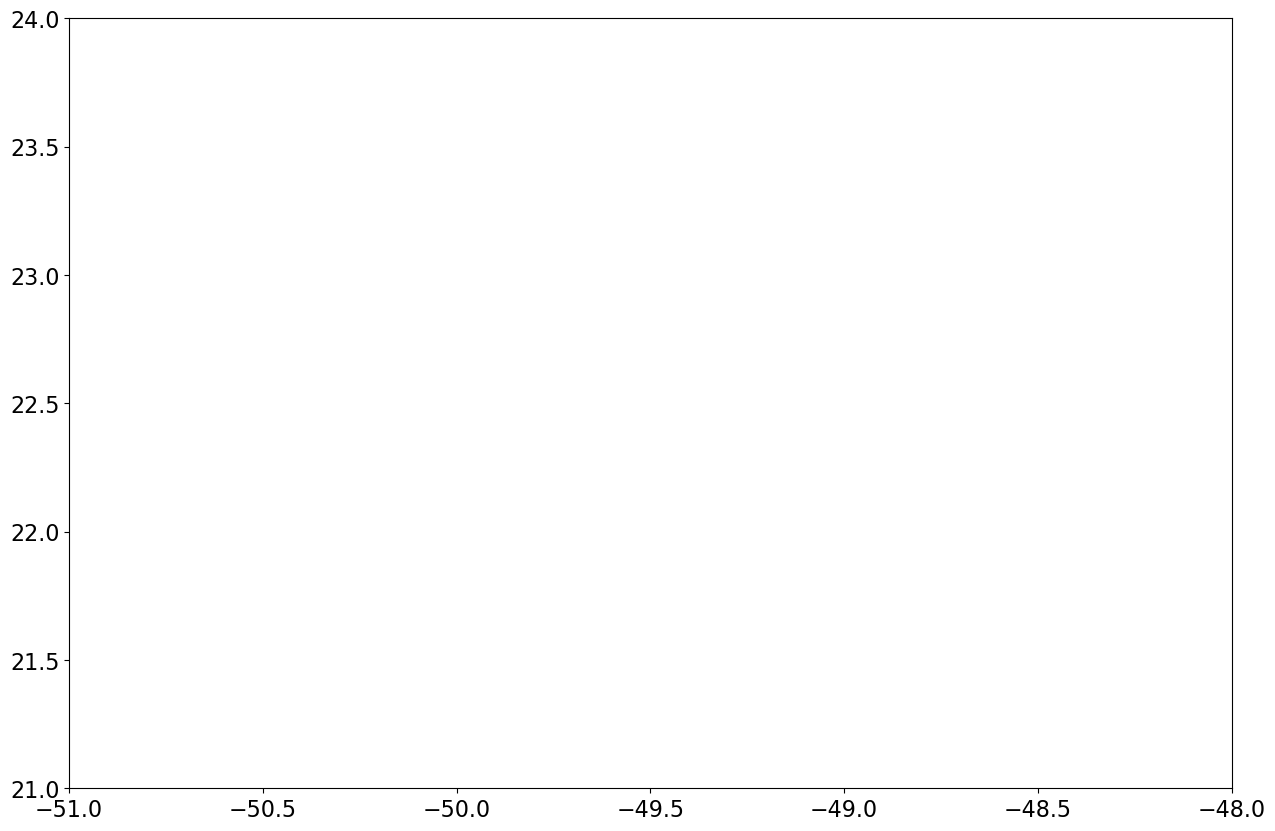

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T220625Z_20241011T002716Z_02100B/ECA_EXAA_ACM_CAP_2B_20241010T220625Z_20241011T002716Z_02100B.h5


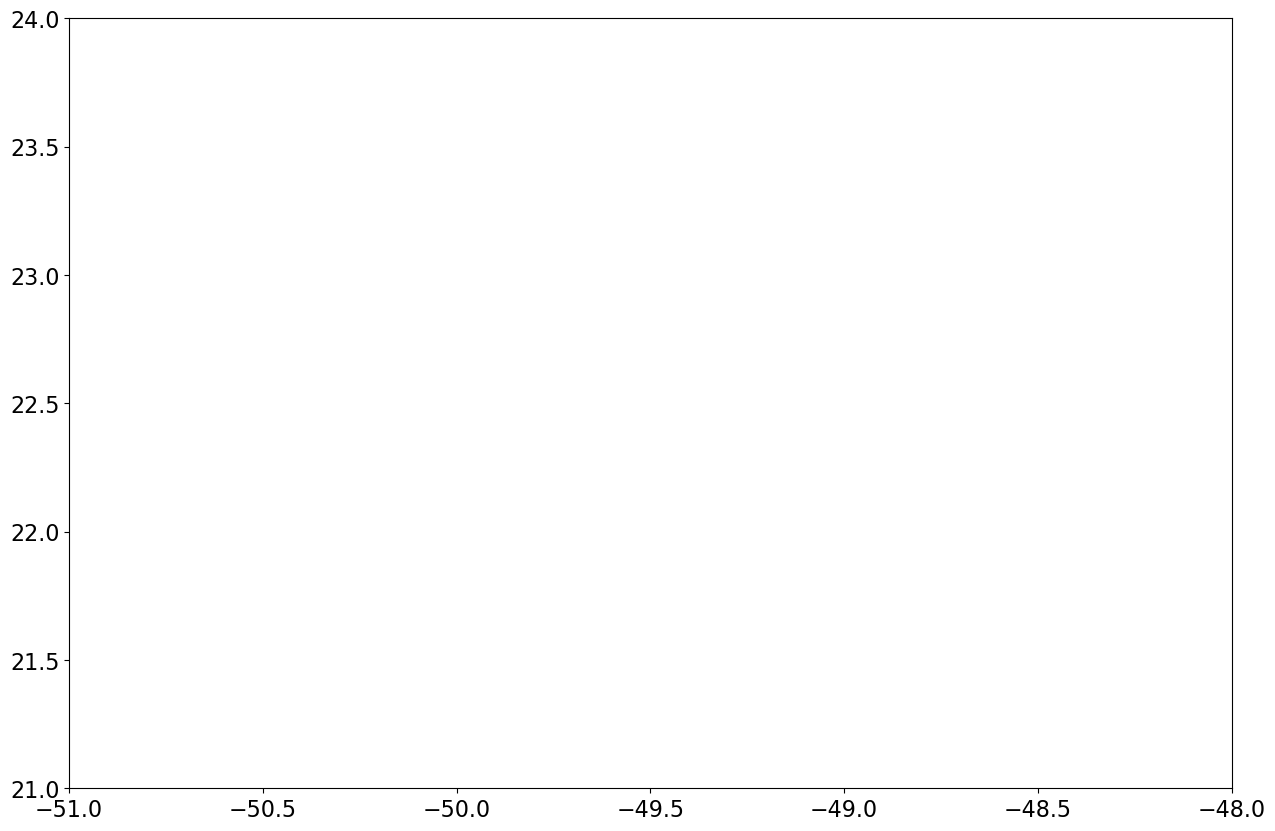

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T221811Z_20241011T002816Z_02100C/ECA_EXAA_ACM_CAP_2B_20241010T221811Z_20241011T002816Z_02100C.h5


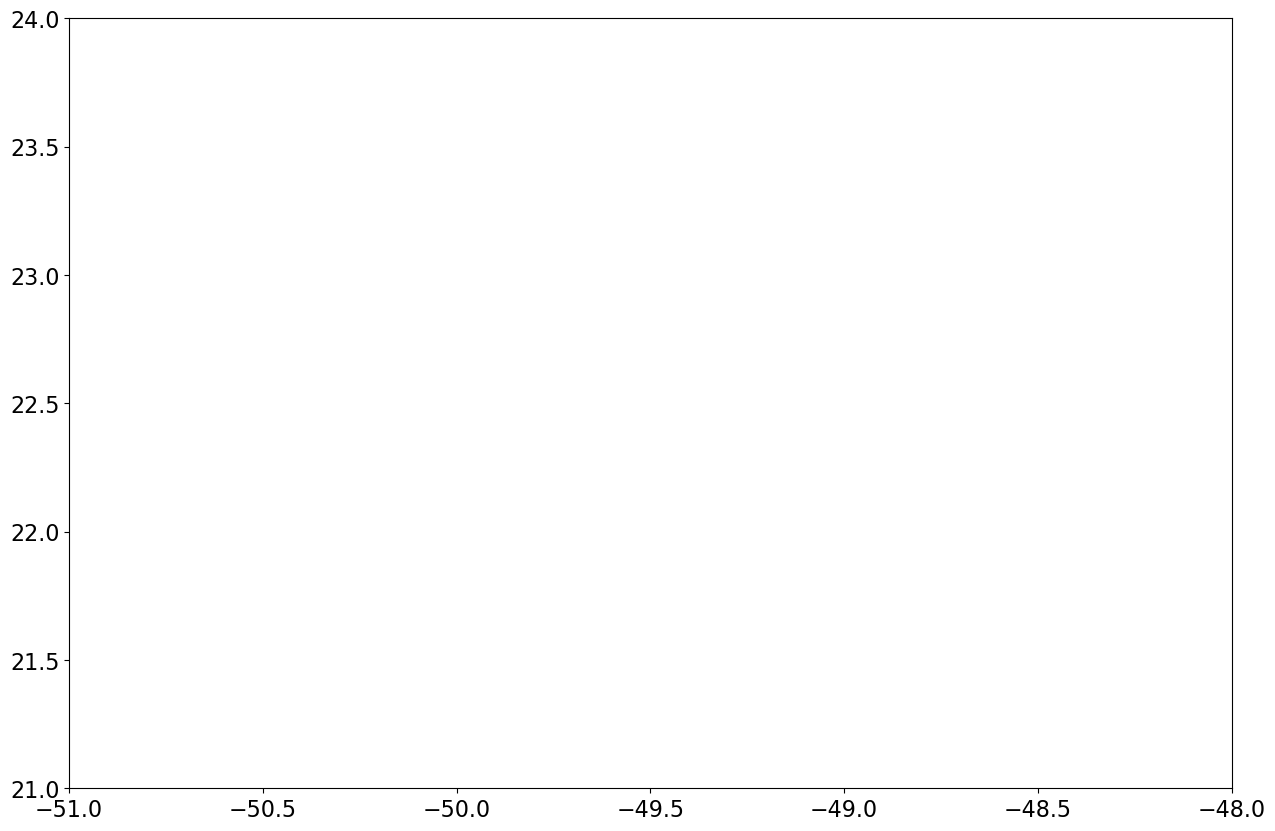

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T230426Z_20241011T003216Z_02100G/ECA_EXAA_ACM_CAP_2B_20241010T230426Z_20241011T003216Z_02100G.h5


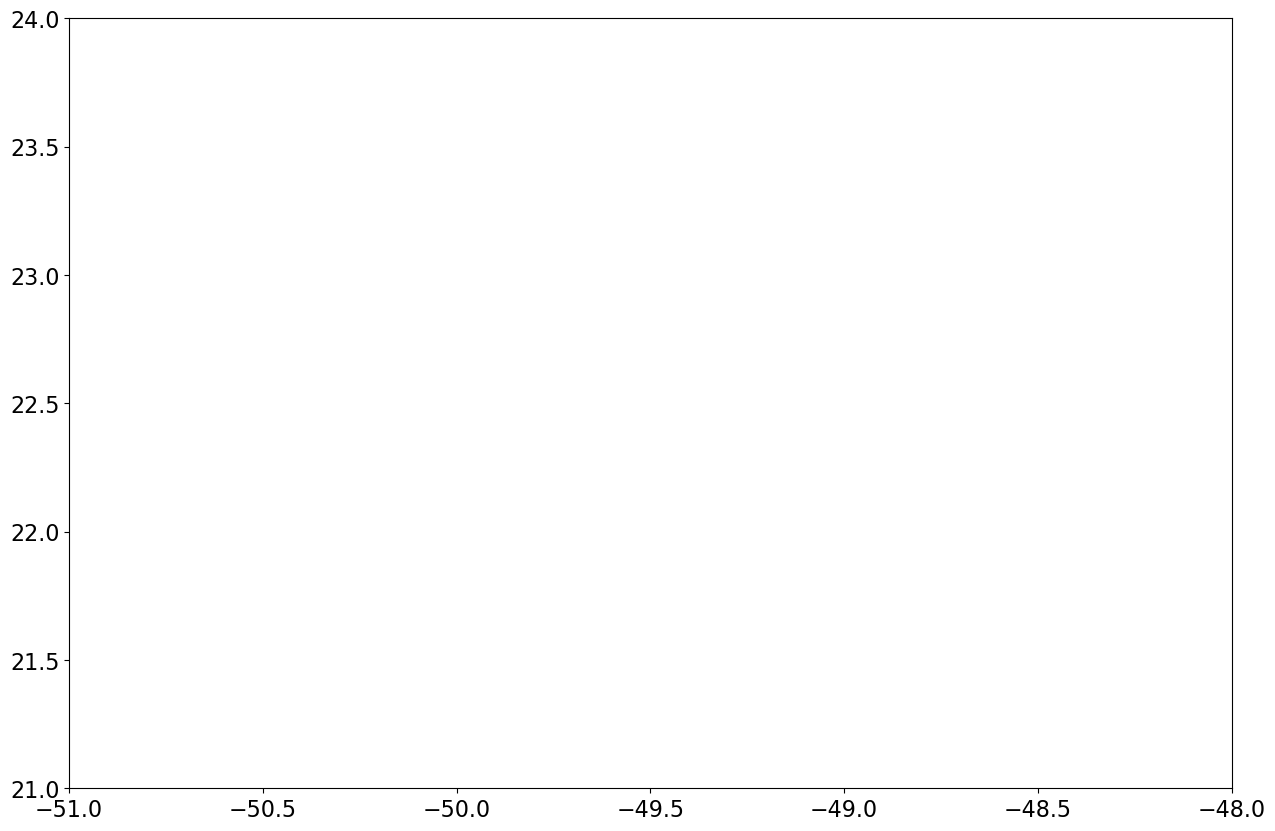

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T231534Z_20241011T002916Z_02100H/ECA_EXAA_ACM_CAP_2B_20241010T231534Z_20241011T002916Z_02100H.h5


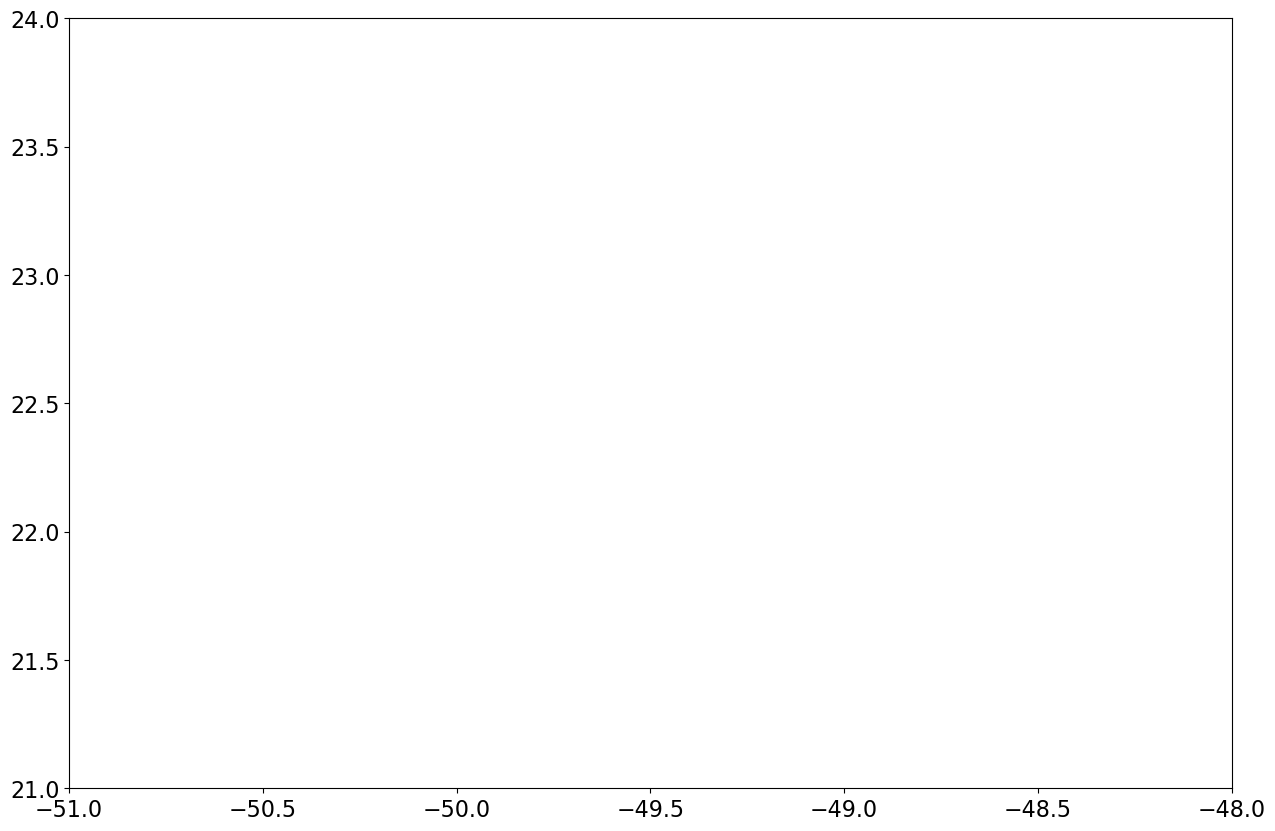

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T232722Z_20241011T002816Z_02101A/ECA_EXAA_ACM_CAP_2B_20241010T232722Z_20241011T002816Z_02101A.h5


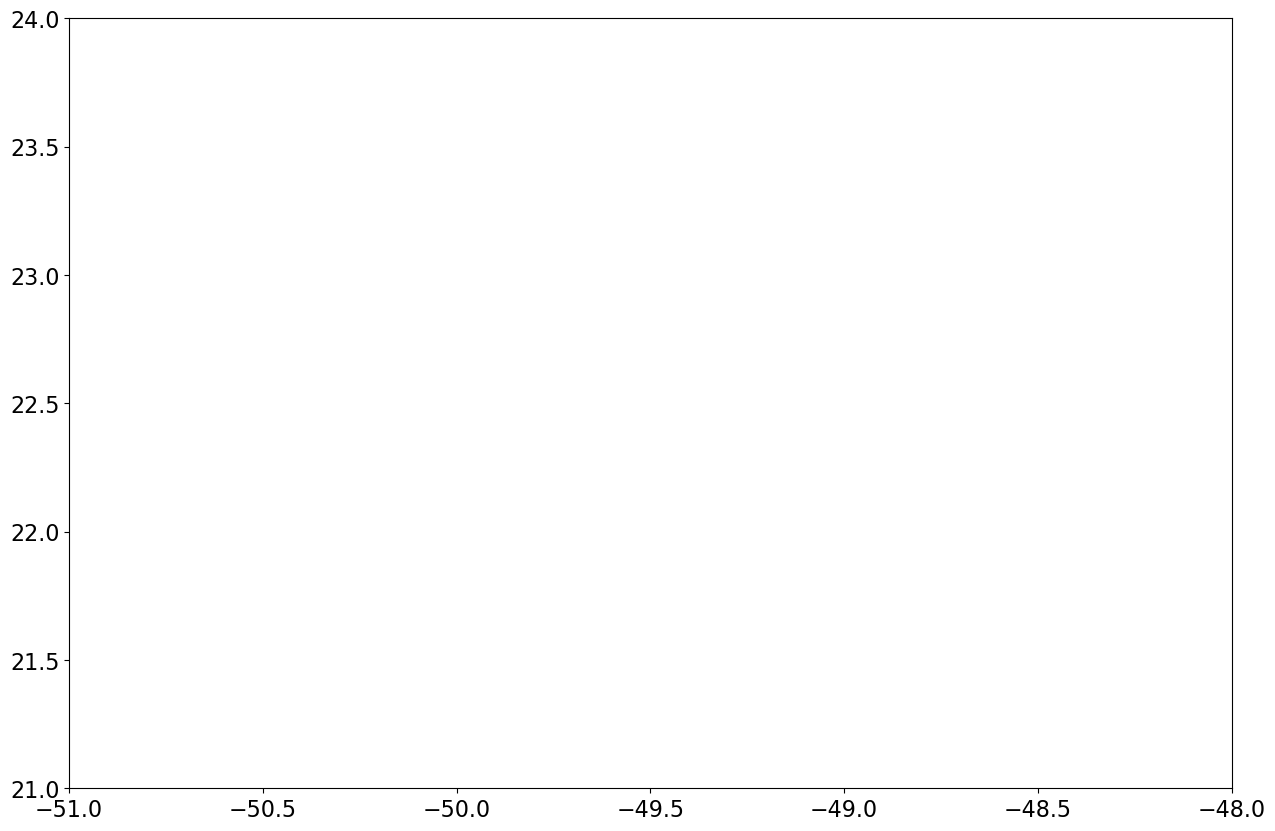

/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T235044Z_20241011T021124Z_02101C/ECA_EXAA_ACM_CAP_2B_20241010T235044Z_20241011T021124Z_02101C.h5


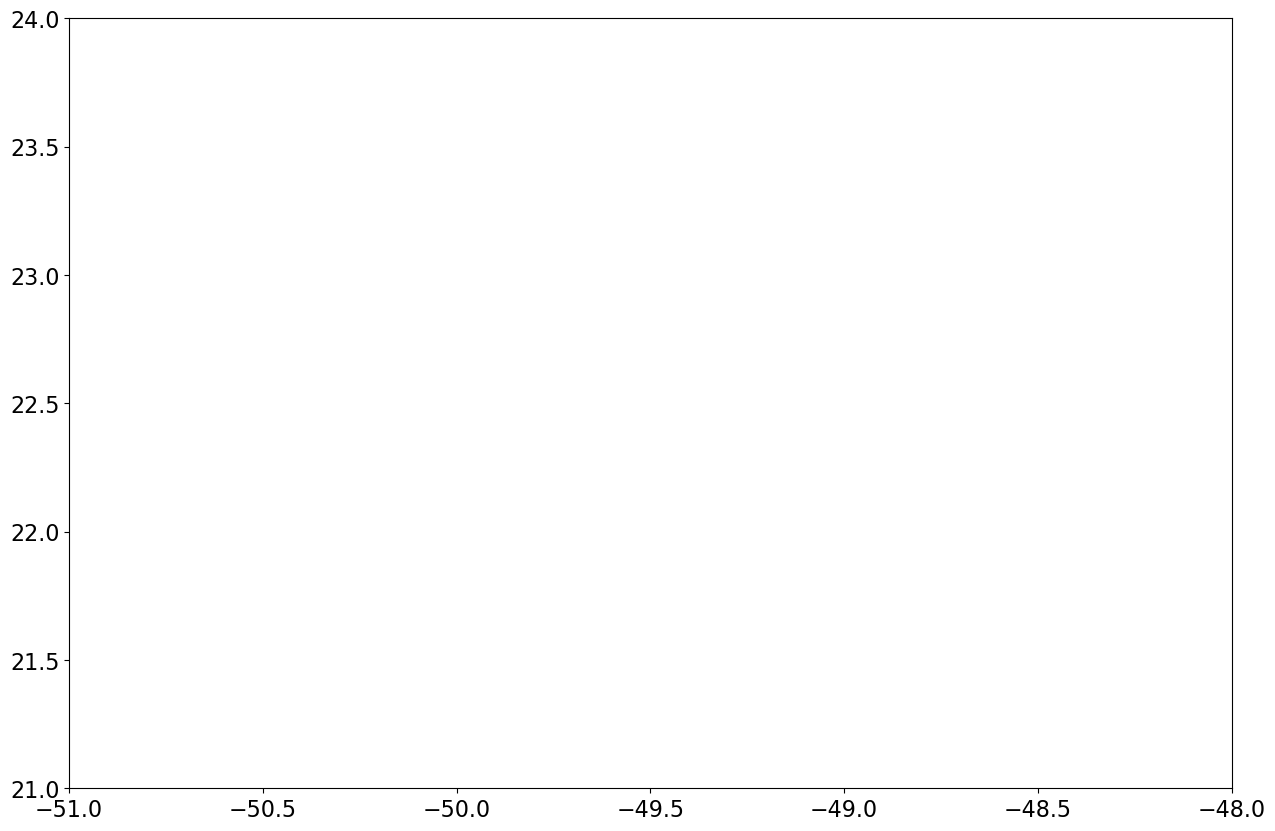

In [196]:
# dir_pth = '/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_10_10/'
dir_pth = '/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/'
l_pths  = glob.glob(dir_pth + '/*/*.h5')
l_pths.sort()

for pth in l_pths:
    print(pth)
    # dsg  = xr.open_dataset(pth, group='/ScienceData/Geo')
    dsg  = xr.open_dataset(pth, group='/ScienceData')
    plt.scatter(dsg.longitude, dsg.latitude)
    plt.xlim(-51, -48)
    plt.ylim(21, 24)
    plt.show()